In [42]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn as sk
import os

In [43]:
#loading in real estate dataset
real_estate = pd.read_csv('datasets/WakeCountyHousing.csv')
real_estate.head()


,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0


In [44]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308292 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      308292 non-null  int64  
 1   Deeded_Acreage      308292 non-null  float64
 2   Total_Sale_Price    308292 non-null  int64  
 3   Total_Sale_Date     308292 non-null  object 
 4   Month_Year_of_Sale  308292 non-null  object 
 5   Year_of_Sale        308292 non-null  int64  
 6   Year_Built          308292 non-null  int64  
 7   Year_Remodeled      308292 non-null  int64  
 8   Heated_Area         308292 non-null  int64  
 9   Num_Stories         308292 non-null  object 
 10  Design_Style        308292 non-null  object 
 11  Bath                308275 non-null  object 
 12  Utilities           306324 non-null  object 
 13  Physical_City       308183 non-null  object 
 14  Physical_Zip        308146 non-null  float64
dtypes: float64(2), int64(6), object(7)

### Cleaning the Data

In [45]:
real_estate = real_estate.dropna()
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306161 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      306161 non-null  int64  
 1   Deeded_Acreage      306161 non-null  float64
 2   Total_Sale_Price    306161 non-null  int64  
 3   Total_Sale_Date     306161 non-null  object 
 4   Month_Year_of_Sale  306161 non-null  object 
 5   Year_of_Sale        306161 non-null  int64  
 6   Year_Built          306161 non-null  int64  
 7   Year_Remodeled      306161 non-null  int64  
 8   Heated_Area         306161 non-null  int64  
 9   Num_Stories         306161 non-null  object 
 10  Design_Style        306161 non-null  object 
 11  Bath                306161 non-null  object 
 12  Utilities           306161 non-null  object 
 13  Physical_City       306161 non-null  object 
 14  Physical_Zip        306161 non-null  float64
dtypes: float64(2), int64(6), object(7)

In [46]:
#removing data that is not useful
real_estate = real_estate.drop(['Real_Estate_Id', 'Physical_City', 'Total_Sale_Date', 'Month_Year_of_Sale'], axis=1)
real_estate.head()

,Deeded_Acreage,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_Zip
0,0.21,34500,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,27610.0
1,0.46,35500,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,27610.0
2,0.46,37500,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,27591.0
3,0.96,70000,1971,1971,1971,3770,One Story,Conventional,Other,WGE,27613.0
4,0.47,380000,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,27607.0


### Creating a Test and Train Set

In [47]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(real_estate, test_size=0.2, random_state=42)

print(train_set.shape)
print(test_set.shape)

real_estate = train_set

(244928, 11)
(61233, 11)


In [8]:
real_estate_labels = real_estate['Total_Sale_Price']
real_estate = real_estate.drop(['Total_Sale_Price'], axis=1)

real_estate_num = real_estate[['Deeded_Acreage', 'Heated_Area']]
real_estate_cat = real_estate[['Year_of_Sale', 'Year_Built', 'Year_Remodeled', 'Num_Stories', 'Design_Style', 'Bath', 'Utilities', 'Physical_Zip']]

### Ordinal Encoder

In [48]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
real_estate_cat_encoded = ordinal_encoder.fit_transform(real_estate_cat)
real_estate_cat_encoded[:10]

array([[ 58., 156., 154.,   1.,   4.,   5.,   0.,  29.],
       [ 59., 160., 158.,   1.,   4.,   5.,   3.,  33.],
       [ 29., 108., 106.,   2.,   4.,   2.,  13.,  18.],
       [ 40., 124., 122.,   1.,  13.,   3.,   0.,  34.],
       [ 55., 147., 145.,   1.,  13.,   3.,   0.,  29.],
       [ 61., 135., 133.,   2.,   4.,   6.,   0.,  24.],
       [ 42., 143., 141.,   0.,   4.,   2.,   9.,  23.],
       [ 60., 106., 104.,   0.,  12.,   1.,   0.,  30.],
       [ 52., 146., 144.,   1.,  13.,   3.,   0.,  28.],
       [ 58., 110., 108.,   1.,   4.,   3.,   0.,  29.]])

In [49]:
#view corresponding categories
ordinal_encoder.categories_

[array([1956, 1958, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
        1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
        1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
        2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]),
 array([   0, 1800, 1814, 1820, 1835, 1840, 1841, 1845, 1848, 1850, 1852,
        1854, 1855, 1856, 1860, 1865, 1867, 1868, 1870, 1871, 1872, 1875,
        1876, 1877, 1879, 1880, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
        1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1898, 1899, 1900,
        1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
        1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
        1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
        1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941

### Scaling, Normalizing and Standardizing Numerical Features with StandardScaler

In [50]:
#the standard scaler package scales, normalizes and standardizes data
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
real_estate_num_scaled = std_scale.fit_transform(real_estate_num)
real_estate_num_scaled[:10]

array([[ 1.24720899e-01,  4.01266785e+00],
       [ 4.19795655e-01,  2.91792939e+00],
       [-8.07775913e-02, -2.38499420e-01],
       [-2.17776585e-01, -8.72401285e-01],
       [-2.17776585e-01, -1.07363997e+00],
       [-1.59815472e-01, -7.52664266e-01],
       [ 2.46062501e-02, -9.49878180e-01],
       [ 3.52948181e-03, -4.97091133e-01],
       [-2.23045777e-01, -6.29908667e-01],
       [-5.97008230e-02,  1.00303594e-02]])

### Preparing Data for Predictions

In [51]:
#small pipeline for numerical attributes using skcikit learns Pipeline class
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs = list(real_estate_num)
cat_attribs = list(real_estate_cat)

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])


real_estate_prep = full_pipeline.fit_transform(real_estate)
real_estate_prep

array([[ 1.24720899e-01,  4.01266785e+00,  5.80000000e+01, ...,
         5.00000000e+00,  0.00000000e+00,  2.90000000e+01],
       [ 4.19795655e-01,  2.91792939e+00,  5.90000000e+01, ...,
         5.00000000e+00,  3.00000000e+00,  3.30000000e+01],
       [-8.07775913e-02, -2.38499420e-01,  2.90000000e+01, ...,
         2.00000000e+00,  1.30000000e+01,  1.80000000e+01],
       ...,
       [-5.97008230e-02,  1.18627049e+00,  4.30000000e+01, ...,
         5.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [-2.07238201e-01, -8.39196902e-01,  6.00000000e+01, ...,
         3.00000000e+00,  0.00000000e+00,  2.40000000e+01],
       [-5.44316309e-02, -3.93453209e-01,  6.00000000e+01, ...,
         3.00000000e+00,  0.00000000e+00,  3.00000000e+00]])

### Analyzing Prices to Come up with Classes


In [52]:
real_estate_labels.describe()

count    2.449280e+05
mean     2.731229e+05
std      1.893739e+05
min      0.000000e+00
25%      1.500000e+05
50%      2.350000e+05
75%      3.500000e+05
max      6.100200e+06
Name: Total_Sale_Price, dtype: float64

I will classify with expensive vs not-expensive. If the price is within the 4th quartile, it is expensive.

In [14]:
real_estate_train_exp = (real_estate_labels >= 3.500000e+05)

### Use SGDClassifier

In [53]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(real_estate_prep, real_estate_train_exp)

SGDClassifier(random_state=42)

### Use StratifiedKFold Cross Validation

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(real_estate_prep, real_estate_train_exp):
    clone_clf = clone(sgd_clf)
    X_train_folds = real_estate_prep[train_index]
    y_train_folds = real_estate_train_exp[train_index]
    X_test_fold = real_estate_prep[test_index]
    y_test_fold = real_estate_train_exp[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))



KeyError: '[0, 6, 12, 16, 24, 26, 30, 33, 41, 50, 88, 89, 90, 97, 107, 119, 120, 121, 124, 132, 140, 143, 145, 156, 173, 175, 184, 202, 205, 232, 240, 256, 258, 262, 274, 284, 288, 290, 298, 299, 307, 316, 323, 328, 335, 353, 356, 378, 384, 386, 388, 398, 402, 403, 421, 427, 429, 440, 447, 454, 467, 468, 474, 485, 496, 503, 508, 519, 524, 525, 546, 551, 565, 591, 592, 595, 598, 615, 637, 647, 655, 661, 663, 669, 670, 694, 699, 707, 708, 714, 716, 718, 721, 733, 749, 754, 761, 775, 785, 791, 793, 794, 806, 834, 862, 864, 871, 872, 874, 878, 880, 881, 887, 892, 922, 923, 931, 934, 939, 942, 943, 946, 967, 978, 979, 986, 1010, 1017, 1035, 1043, 1048, 1056, 1057, 1062, 1072, 1093, 1099, 1102, 1104, 1108, 1112, 1113, 1114, 1131, 1134, 1136, 1139, 1152, 1154, 1177, 1180, 1186, 1187, 1189, 1193, 1205, 1228, 1234, 1253, 1257, 1258, 1275, 1281, 1282, 1299, 1301, 1307, 1322, 1328, 1332, 1338, 1347, 1348, 1350, 1352, 1366, 1373, 1375, 1404, 1407, 1408, 1412, 1416, 1426, 1434, 1440, 1448, 1466, 1467, 1472, 1475, 1485, 1488, 1491, 1495, 1499, 1511, 1515, 1544, 1549, 1563, 1564, 1570, 1587, 1588, 1596, 1598, 1602, 1609, 1614, 1623, 1625, 1626, 1636, 1637, 1642, 1644, 1650, 1651, 1653, 1655, 1656, 1664, 1689, 1690, 1691, 1695, 1697, 1705, 1716, 1723, 1734, 1736, 1738, 1752, 1756, 1766, 1771, 1772, 1776, 1778, 1784, 1809, 1811, 1836, 1837, 1840, 1859, 1862, 1879, 1886, 1894, 1910, 1918, 1923, 1931, 1938, 1950, 1952, 1958, 1973, 1979, 1981, 1983, 1985, 1986, 1992, 2000, 2004, 2008, 2015, 2027, 2041, 2047, 2054, 2077, 2097, 2098, 2099, 2104, 2111, 2114, 2115, 2120, 2149, 2150, 2155, 2157, 2161, 2162, 2190, 2191, 2193, 2197, 2202, 2203, 2234, 2239, 2247, 2249, 2251, 2268, 2273, 2277, 2278, 2280, 2296, 2312, 2316, 2325, 2333, 2334, 2337, 2344, 2345, 2349, 2350, 2351, 2352, 2360, 2363, 2374, 2376, 2381, 2383, 2441, 2466, 2473, 2491, 2492, 2494, 2503, 2511, 2514, 2520, 2524, 2543, 2546, 2547, 2583, 2585, 2613, 2621, 2624, 2629, 2653, 2676, 2689, 2690, 2693, 2695, 2704, 2716, 2723, 2724, 2726, 2744, 2746, 2750, 2775, 2783, 2793, 2797, 2809, 2811, 2812, 2826, 2829, 2838, 2840, 2857, 2858, 2863, 2867, 2874, 2884, 2891, 2893, 2899, 2902, 2905, 2913, 2924, 2929, 2933, 2951, 2954, 2956, 2958, 2963, 2966, 2967, 2978, 2985, 2988, 2991, 3008, 3010, 3012, 3053, 3061, 3062, 3066, 3069, 3075, 3094, 3099, 3111, 3124, 3129, 3141, 3189, 3204, 3208, 3212, 3219, 3221, 3223, 3224, 3228, 3233, 3248, 3251, 3255, 3267, 3271, 3276, 3281, 3289, 3295, 3301, 3305, 3308, 3324, 3325, 3326, 3330, 3343, 3349, 3350, 3354, 3362, 3364, 3370, 3372, 3380, 3383, 3404, 3408, 3410, 3412, 3419, 3422, 3427, 3454, 3460, 3469, 3475, 3484, 3487, 3493, 3494, 3495, 3496, 3506, 3511, 3522, 3538, 3540, 3563, 3564, 3568, 3580, 3607, 3626, 3630, 3632, 3646, 3654, 3659, 3660, 3662, 3674, 3677, 3681, 3685, 3689, 3705, 3706, 3710, 3711, 3717, 3730, 3734, 3742, 3744, 3755, 3759, 3761, 3762, 3764, 3766, 3769, 3778, 3790, 3791, 3804, 3806, 3809, 3813, 3817, 3821, 3833, 3851, 3854, 3877, 3879, 3884, 3887, 3904, 3905, 3906, 3910, 3911, 3915, 3920, 3925, 3931, 3932, 3941, 3950, 3952, 3964, 3969, 3971, 3972, 3973, 3978, 3982, 3986, 3991, 3994, 4001, 4003, 4014, 4016, 4017, 4026, 4032, 4038, 4040, 4041, 4042, 4049, 4053, 4059, 4068, 4069, 4070, 4088, 4090, 4099, 4103, 4106, 4107, 4113, 4115, 4121, 4126, 4130, 4147, 4149, 4166, 4170, 4174, 4177, 4188, 4189, 4195, 4201, 4202, 4204, 4219, 4224, 4225, 4230, 4238, 4249, 4251, 4252, 4254, 4259, 4263, 4264, 4268, 4270, 4276, 4305, 4309, 4315, 4321, 4334, 4368, 4374, 4376, 4380, 4383, 4384, 4400, 4407, 4408, 4414, 4418, 4424, 4432, 4439, 4447, 4468, 4474, 4481, 4487, 4499, 4502, 4507, 4513, 4523, 4549, 4558, 4571, 4573, 4588, 4604, 4620, 4624, 4628, 4645, 4648, 4655, 4675, 4683, 4688, 4712, 4714, 4737, 4740, 4757, 4777, 4790, 4793, 4807, 4817, 4820, 4824, 4836, 4847, 4853, 4857, 4871, 4891, 4910, 4920, 4923, 4933, 4934, 4969, 4970, 4987, 5003, 5004, 5024, 5036, 5045, 5050, 5051, 5069, 5070, 5077, 5082, 5083, 5103, 5104, 5115, 5119, 5128, 5131, 5139, 5141, 5147, 5152, 5154, 5157, 5160, 5162, 5171, 5179, 5188, 5189, 5205, 5206, 5225, 5226, 5235, 5236, 5238, 5241, 5248, 5269, 5288, 5291, 5317, 5322, 5323, 5325, 5328, 5333, 5334, 5336, 5339, 5345, 5348, 5349, 5351, 5365, 5369, 5382, 5383, 5386, 5391, 5405, 5413, 5418, 5427, 5428, 5431, 5440, 5450, 5457, 5470, 5475, 5479, 5486, 5487, 5496, 5503, 5505, 5531, 5562, 5563, 5566, 5577, 5592, 5607, 5613, 5625, 5629, 5635, 5639, 5649, 5655, 5656, 5671, 5695, 5696, 5702, 5710, 5711, 5718, 5735, 5747, 5760, 5778, 5781, 5782, 5786, 5810, 5814, 5815, 5817, 5818, 5829, 5845, 5852, 5856, 5857, 5862, 5866, 5870, 5871, 5872, 5912, 5918, 5927, 5935, 5947, 5955, 5967, 5969, 5979, 5980, 5985, 5988, 5989, 6002, 6004, 6010, 6016, 6027, 6030, 6034, 6045, 6056, 6060, 6079, 6083, 6092, 6097, 6099, 6105, 6109, 6110, 6116, 6117, 6123, 6138, 6139, 6142, 6146, 6149, 6161, 6162, 6163, 6168, 6176, 6185, 6197, 6209, 6213, 6232, 6233, 6237, 6243, 6249, 6251, 6253, 6265, 6279, 6299, 6300, 6306, 6312, 6313, 6315, 6321, 6327, 6331, 6338, 6341, 6353, 6373, 6374, 6375, 6389, 6396, 6401, 6405, 6408, 6412, 6438, 6462, 6463, 6468, 6474, 6477, 6478, 6493, 6495, 6505, 6511, 6517, 6522, 6532, 6539, 6546, 6552, 6556, 6564, 6568, 6572, 6603, 6609, 6611, 6620, 6624, 6641, 6649, 6655, 6660, 6666, 6689, 6701, 6722, 6723, 6725, 6727, 6735, 6751, 6756, 6758, 6765, 6777, 6780, 6786, 6798, 6807, 6810, 6811, 6815, 6824, 6833, 6848, 6859, 6878, 6881, 6896, 6908, 6910, 6920, 6924, 6930, 6932, 6939, 6942, 6945, 6948, 6949, 6958, 6963, 6983, 6987, 6992, 7007, 7043, 7045, 7085, 7097, 7107, 7120, 7132, 7140, 7145, 7151, 7157, 7165, 7168, 7169, 7173, 7190, 7196, 7214, 7215, 7221, 7224, 7259, 7279, 7290, 7291, 7315, 7320, 7322, 7327, 7347, 7349, 7351, 7353, 7355, 7357, 7358, 7379, 7389, 7395, 7402, 7410, 7445, 7457, 7463, 7466, 7477, 7478, 7479, 7495, 7497, 7511, 7514, 7515, 7520, 7532, 7533, 7534, 7537, 7538, 7544, 7550, 7554, 7567, 7580, 7597, 7600, 7605, 7610, 7614, 7618, 7622, 7624, 7633, 7638, 7646, 7650, 7651, 7659, 7665, 7669, 7672, 7680, 7696, 7697, 7717, 7721, 7737, 7739, 7760, 7762, 7765, 7771, 7772, 7778, 7804, 7809, 7823, 7834, 7844, 7847, 7850, 7861, 7864, 7877, 7883, 7892, 7894, 7898, 7904, 7907, 7908, 7913, 7941, 7948, 7949, 7953, 7954, 7955, 7971, 7985, 7990, 7998, 8011, 8016, 8024, 8030, 8031, 8033, 8037, 8038, 8042, 8050, 8053, 8054, 8063, 8073, 8076, 8121, 8122, 8139, 8147, 8155, 8156, 8158, 8168, 8183, 8202, 8204, 8219, 8224, 8231, 8234, 8246, 8248, 8252, 8264, 8267, 8272, 8285, 8315, 8324, 8326, 8339, 8355, 8358, 8375, 8381, 8388, 8392, 8394, 8420, 8421, 8431, 8454, 8466, 8470, 8475, 8479, 8490, 8501, 8513, 8521, 8525, 8537, 8542, 8548, 8557, 8561, 8575, 8579, 8581, 8584, 8607, 8612, 8613, 8614, 8617, 8623, 8631, 8634, 8647, 8649, 8661, 8663, 8670, 8673, 8675, 8689, 8694, 8696, 8699, 8715, 8717, 8724, 8727, 8730, 8733, 8736, 8741, 8743, 8746, 8749, 8770, 8773, 8781, 8786, 8825, 8851, 8854, 8855, 8856, 8857, 8872, 8874, 8886, 8892, 8895, 8900, 8903, 8904, 8907, 8908, 8912, 8918, 8928, 8931, 8939, 8948, 8958, 8960, 8961, 8964, 8972, 8977, 8980, 8983, 8992, 8994, 8997, 9008, 9024, 9039, 9045, 9065, 9067, 9076, 9095, 9097, 9098, 9106, 9129, 9158, 9177, 9191, 9192, 9197, 9203, 9212, 9218, 9225, 9230, 9234, 9236, 9237, 9262, 9274, 9276, 9289, 9290, 9291, 9293, 9296, 9306, 9314, 9315, 9316, 9326, 9346, 9348, 9350, 9360, 9363, 9364, 9368, 9388, 9398, 9411, 9416, 9419, 9422, 9457, 9472, 9475, 9477, 9492, 9497, 9500, 9511, 9514, 9519, 9527, 9540, 9544, 9546, 9548, 9554, 9560, 9561, 9590, 9597, 9600, 9607, 9612, 9616, 9629, 9642, 9647, 9658, 9697, 9698, 9735, 9748, 9750, 9751, 9760, 9770, 9776, 9797, 9799, 9823, 9837, 9846, 9848, 9852, 9853, 9854, 9877, 9879, 9882, 9892, 9896, 9904, 9932, 9937, 9954, 9957, 9958, 9961, 9968, 9974, 9977, 9981, 9993, 9996, 10000, 10008, 10014, 10017, 10019, 10033, 10034, 10055, 10060, 10063, 10069, 10075, 10084, 10094, 10095, 10096, 10098, 10102, 10118, 10127, 10134, 10141, 10145, 10146, 10157, 10161, 10183, 10186, 10190, 10202, 10208, 10210, 10214, 10219, 10221, 10227, 10235, 10240, 10245, 10253, 10260, 10264, 10268, 10274, 10278, 10284, 10293, 10295, 10297, 10319, 10327, 10330, 10332, 10334, 10337, 10341, 10342, 10348, 10351, 10360, 10364, 10394, 10408, 10413, 10432, 10438, 10453, 10456, 10464, 10471, 10478, 10488, 10491, 10500, 10502, 10517, 10520, 10521, 10526, 10527, 10529, 10531, 10533, 10548, 10552, 10560, 10570, 10597, 10603, 10616, 10634, 10641, 10643, 10645, 10652, 10653, 10665, 10667, 10675, 10680, 10685, 10689, 10690, 10707, 10709, 10711, 10714, 10721, 10759, 10763, 10773, 10792, 10805, 10806, 10807, 10809, 10822, 10825, 10829, 10830, 10839, 10866, 10869, 10883, 10889, 10890, 10911, 10925, 10933, 10944, 10955, 10958, 10965, 10975, 10986, 11004, 11010, 11014, 11020, 11031, 11036, 11037, 11065, 11074, 11082, 11087, 11088, 11090, 11093, 11094, 11105, 11109, 11114, 11124, 11125, 11130, 11141, 11148, 11156, 11162, 11167, 11172, 11194, 11210, 11219, 11228, 11242, 11276, 11288, 11290, 11299, 11302, 11310, 11311, 11318, 11327, 11354, 11393, 11403, 11413, 11423, 11446, 11457, 11461, 11500, 11506, 11519, 11534, 11562, 11566, 11569, 11577, 11580, 11581, 11585, 11589, 11590, 11602, 11628, 11642, 11652, 11655, 11681, 11683, 11693, 11694, 11711, 11713, 11714, 11717, 11722, 11726, 11731, 11734, 11739, 11741, 11749, 11772, 11791, 11796, 11804, 11810, 11816, 11837, 11839, 11848, 11850, 11851, 11872, 11877, 11878, 11879, 11880, 11887, 11891, 11909, 11914, 11918, 11924, 11925, 11929, 11951, 11952, 11959, 11971, 11976, 11977, 11981, 11986, 11987, 11988, 11998, 12006, 12009, 12020, 12023, 12032, 12039, 12053, 12060, 12074, 12075, 12079, 12081, 12090, 12099, 12105, 12114, 12116, 12118, 12121, 12123, 12125, 12135, 12139, 12150, 12162, 12164, 12170, 12171, 12184, 12192, 12200, 12204, 12213, 12217, 12222, 12225, 12238, 12246, 12263, 12265, 12282, 12304, 12306, 12307, 12319, 12326, 12331, 12339, 12343, 12346, 12364, 12376, 12377, 12378, 12379, 12383, 12394, 12404, 12406, 12408, 12420, 12424, 12428, 12434, 12441, 12445, 12457, 12464, 12465, 12489, 12513, 12515, 12527, 12530, 12533, 12542, 12546, 12549, 12556, 12560, 12565, 12570, 12582, 12587, 12591, 12598, 12600, 12609, 12613, 12614, 12621, 12628, 12632, 12636, 12643, 12650, 12658, 12659, 12660, 12666, 12683, 12685, 12690, 12696, 12701, 12714, 12719, 12721, 12726, 12743, 12754, 12755, 12757, 12758, 12762, 12771, 12773, 12777, 12785, 12788, 12790, 12794, 12801, 12802, 12811, 12812, 12816, 12817, 12819, 12825, 12843, 12845, 12865, 12870, 12871, 12882, 12887, 12891, 12894, 12906, 12933, 12947, 12953, 12954, 12956, 12962, 12964, 12967, 12969, 12982, 12985, 12996, 12999, 13003, 13011, 13012, 13018, 13044, 13045, 13047, 13054, 13061, 13076, 13082, 13089, 13091, 13095, 13118, 13120, 13121, 13147, 13160, 13162, 13172, 13177, 13182, 13188, 13189, 13195, 13206, 13218, 13222, 13246, 13251, 13253, 13256, 13265, 13267, 13268, 13277, 13278, 13286, 13287, 13294, 13304, 13309, 13311, 13331, 13333, 13335, 13338, 13341, 13345, 13355, 13356, 13358, 13364, 13379, 13397, 13420, 13424, 13425, 13450, 13497, 13504, 13509, 13520, 13523, 13534, 13535, 13543, 13554, 13557, 13558, 13563, 13574, 13575, 13584, 13594, 13599, 13603, 13615, 13623, 13624, 13628, 13644, 13656, 13664, 13674, 13675, 13682, 13685, 13692, 13698, 13699, 13701, 13714, 13716, 13718, 13729, 13732, 13740, 13746, 13748, 13754, 13758, 13768, 13769, 13771, 13793, 13799, 13805, 13807, 13810, 13813, 13823, 13835, 13840, 13847, 13858, 13863, 13865, 13866, 13867, 13868, 13869, 13871, 13873, 13876, 13886, 13889, 13893, 13898, 13900, 13906, 13920, 13923, 13924, 13928, 13937, 13943, 13949, 13956, 13958, 13973, 13984, 13989, 14000, 14001, 14002, 14008, 14017, 14022, 14037, 14041, 14073, 14083, 14085, 14092, 14096, 14099, 14106, 14108, 14117, 14129, 14130, 14132, 14140, 14145, 14149, 14156, 14159, 14165, 14182, 14192, 14196, 14201, 14208, 14213, 14215, 14232, 14233, 14237, 14241, 14271, 14275, 14285, 14291, 14292, 14297, 14310, 14316, 14321, 14322, 14327, 14333, 14338, 14340, 14346, 14353, 14366, 14390, 14397, 14406, 14410, 14422, 14432, 14433, 14435, 14436, 14455, 14457, 14460, 14475, 14480, 14486, 14493, 14495, 14515, 14519, 14578, 14580, 14583, 14600, 14601, 14606, 14611, 14613, 14614, 14619, 14625, 14627, 14635, 14639, 14641, 14642, 14655, 14676, 14689, 14695, 14700, 14702, 14709, 14718, 14720, 14721, 14722, 14729, 14740, 14745, 14754, 14759, 14766, 14780, 14788, 14801, 14803, 14810, 14816, 14832, 14834, 14835, 14844, 14852, 14855, 14863, 14866, 14870, 14872, 14873, 14879, 14880, 14881, 14883, 14886, 14890, 14891, 14902, 14916, 14917, 14922, 14934, 14936, 14938, 14943, 14948, 14954, 14955, 14957, 14961, 14965, 14966, 14972, 14989, 14993, 14996, 15008, 15021, 15022, 15028, 15032, 15034, 15043, 15044, 15050, 15061, 15085, 15086, 15089, 15092, 15104, 15105, 15109, 15128, 15131, 15141, 15144, 15151, 15160, 15199, 15209, 15225, 15239, 15241, 15250, 15255, 15258, 15259, 15262, 15267, 15271, 15274, 15282, 15290, 15297, 15301, 15303, 15310, 15318, 15329, 15334, 15337, 15338, 15340, 15341, 15345, 15348, 15358, 15361, 15368, 15402, 15407, 15416, 15421, 15439, 15444, 15455, 15465, 15476, 15477, 15487, 15498, 15502, 15503, 15507, 15515, 15521, 15526, 15539, 15541, 15548, 15567, 15578, 15591, 15608, 15611, 15621, 15628, 15634, 15635, 15643, 15648, 15658, 15660, 15661, 15664, 15666, 15678, 15682, 15684, 15685, 15686, 15703, 15734, 15765, 15790, 15792, 15815, 15839, 15843, 15846, 15854, 15859, 15863, 15867, 15868, 15869, 15875, 15882, 15892, 15897, 15902, 15904, 15910, 15915, 15920, 15933, 15947, 15950, 15972, 15991, 16004, 16006, 16009, 16015, 16017, 16023, 16033, 16037, 16052, 16057, 16064, 16079, 16088, 16095, 16100, 16113, 16129, 16131, 16142, 16147, 16151, 16152, 16156, 16170, 16186, 16189, 16193, 16203, 16211, 16213, 16214, 16218, 16225, 16234, 16252, 16253, 16254, 16262, 16263, 16278, 16290, 16302, 16308, 16309, 16311, 16313, 16317, 16318, 16336, 16363, 16369, 16382, 16384, 16387, 16390, 16402, 16431, 16437, 16445, 16456, 16471, 16472, 16477, 16480, 16487, 16490, 16497, 16498, 16508, 16509, 16512, 16530, 16531, 16538, 16544, 16547, 16550, 16555, 16571, 16573, 16575, 16579, 16598, 16621, 16627, 16631, 16640, 16660, 16661, 16668, 16670, 16674, 16685, 16694, 16696, 16704, 16705, 16706, 16709, 16714, 16721, 16732, 16735, 16753, 16768, 16773, 16776, 16779, 16792, 16799, 16801, 16814, 16823, 16824, 16839, 16851, 16855, 16868, 16870, 16879, 16890, 16910, 16917, 16918, 16924, 16944, 16950, 16954, 16955, 16956, 16965, 16971, 16972, 16977, 16987, 16997, 17001, 17008, 17009, 17028, 17030, 17033, 17046, 17060, 17063, 17079, 17083, 17085, 17086, 17092, 17096, 17099, 17101, 17103, 17108, 17109, 17114, 17117, 17120, 17121, 17126, 17142, 17153, 17155, 17163, 17168, 17192, 17228, 17246, 17254, 17259, 17265, 17268, 17273, 17277, 17279, 17281, 17286, 17288, 17305, 17314, 17327, 17357, 17378, 17382, 17386, 17388, 17389, 17392, 17396, 17407, 17411, 17450, 17454, 17457, 17460, 17463, 17466, 17481, 17482, 17489, 17494, 17508, 17510, 17512, 17517, 17533, 17539, 17542, 17543, 17544, 17545, 17550, 17552, 17555, 17560, 17570, 17571, 17574, 17586, 17592, 17593, 17599, 17607, 17617, 17630, 17634, 17637, 17664, 17678, 17682, 17683, 17706, 17711, 17712, 17715, 17716, 17720, 17722, 17726, 17730, 17735, 17738, 17749, 17765, 17780, 17783, 17786, 17793, 17794, 17806, 17809, 17813, 17815, 17821, 17829, 17831, 17839, 17854, 17867, 17871, 17879, 17897, 17900, 17902, 17906, 17917, 17921, 17923, 17924, 17928, 17932, 17944, 17958, 17985, 17991, 18001, 18005, 18021, 18032, 18042, 18053, 18063, 18064, 18065, 18070, 18092, 18115, 18124, 18129, 18147, 18185, 18188, 18193, 18199, 18204, 18206, 18208, 18219, 18222, 18225, 18247, 18250, 18273, 18281, 18283, 18290, 18333, 18335, 18343, 18366, 18376, 18378, 18398, 18410, 18416, 18426, 18433, 18440, 18452, 18457, 18461, 18466, 18468, 18475, 18482, 18483, 18507, 18518, 18525, 18528, 18533, 18534, 18550, 18558, 18572, 18573, 18578, 18579, 18592, 18593, 18597, 18599, 18601, 18604, 18611, 18612, 18617, 18620, 18627, 18647, 18649, 18650, 18655, 18658, 18660, 18664, 18666, 18680, 18691, 18699, 18709, 18711, 18714, 18716, 18725, 18754, 18759, 18769, 18788, 18789, 18795, 18804, 18820, 18836, 18838, 18848, 18854, 18866, 18869, 18871, 18873, 18880, 18889, 18891, 18897, 18903, 18914, 18947, 18990, 18994, 19004, 19014, 19023, 19041, 19044, 19068, 19074, 19079, 19080, 19096, 19100, 19101, 19107, 19112, 19113, 19116, 19123, 19124, 19127, 19144, 19146, 19161, 19169, 19170, 19174, 19177, 19184, 19185, 19188, 19205, 19211, 19215, 19239, 19241, 19242, 19252, 19259, 19278, 19281, 19286, 19293, 19294, 19296, 19307, 19316, 19326, 19327, 19332, 19349, 19367, 19368, 19377, 19378, 19386, 19388, 19391, 19410, 19414, 19430, 19445, 19448, 19451, 19460, 19468, 19471, 19474, 19475, 19486, 19507, 19520, 19531, 19532, 19534, 19535, 19537, 19545, 19556, 19560, 19564, 19565, 19572, 19573, 19576, 19583, 19591, 19592, 19594, 19601, 19604, 19610, 19620, 19629, 19640, 19641, 19645, 19658, 19660, 19697, 19698, 19710, 19723, 19727, 19732, 19735, 19765, 19771, 19776, 19780, 19793, 19795, 19797, 19806, 19815, 19818, 19832, 19843, 19847, 19853, 19868, 19876, 19901, 19917, 19918, 19919, 19920, 19922, 19930, 19932, 19939, 19957, 19960, 19966, 19981, 19984, 19998, 20000, 20006, 20013, 20017, 20030, 20032, 20033, 20048, 20060, 20061, 20066, 20077, 20082, 20086, 20087, 20092, 20093, 20097, 20107, 20116, 20126, 20132, 20141, 20145, 20148, 20153, 20164, 20165, 20170, 20182, 20193, 20198, 20200, 20204, 20208, 20209, 20216, 20230, 20238, 20246, 20248, 20250, 20286, 20287, 20298, 20300, 20312, 20318, 20324, 20326, 20331, 20332, 20336, 20339, 20340, 20346, 20361, 20374, 20382, 20397, 20399, 20402, 20416, 20418, 20435, 20444, 20450, 20463, 20466, 20467, 20468, 20471, 20476, 20504, 20510, 20534, 20539, 20547, 20548, 20549, 20556, 20558, 20566, 20570, 20572, 20593, 20600, 20605, 20619, 20631, 20653, 20658, 20700, 20704, 20710, 20720, 20728, 20742, 20746, 20752, 20759, 20763, 20771, 20781, 20783, 20797, 20799, 20821, 20823, 20827, 20828, 20831, 20836, 20838, 20840, 20845, 20848, 20852, 20856, 20858, 20864, 20865, 20867, 20870, 20872, 20876, 20881, 20884, 20889, 20900, 20901, 20903, 20906, 20907, 20908, 20917, 20929, 20932, 20941, 20945, 20963, 20967, 20974, 20981, 20982, 20984, 20985, 21000, 21017, 21021, 21039, 21043, 21044, 21047, 21057, 21059, 21064, 21072, 21080, 21086, 21089, 21090, 21115, 21116, 21123, 21131, 21159, 21167, 21180, 21197, 21199, 21201, 21204, 21216, 21217, 21221, 21224, 21237, 21242, 21245, 21248, 21249, 21277, 21289, 21299, 21307, 21308, 21309, 21310, 21314, 21322, 21329, 21364, 21375, 21380, 21400, 21413, 21427, 21433, 21437, 21448, 21450, 21452, 21458, 21462, 21472, 21474, 21478, 21491, 21496, 21531, 21534, 21544, 21550, 21563, 21565, 21576, 21589, 21590, 21597, 21610, 21623, 21628, 21631, 21650, 21673, 21677, 21680, 21681, 21682, 21683, 21684, 21695, 21701, 21702, 21703, 21705, 21718, 21720, 21740, 21741, 21761, 21774, 21783, 21785, 21786, 21789, 21801, 21803, 21810, 21811, 21817, 21819, 21837, 21843, 21845, 21868, 21878, 21879, 21884, 21887, 21891, 21894, 21896, 21904, 21906, 21923, 21924, 21934, 21935, 21936, 21938, 21946, 21962, 21981, 21988, 21992, 21998, 22002, 22004, 22007, 22012, 22014, 22021, 22025, 22028, 22035, 22037, 22050, 22054, 22062, 22064, 22067, 22085, 22105, 22115, 22120, 22121, 22125, 22133, 22137, 22157, 22190, 22201, 22211, 22224, 22226, 22231, 22236, 22246, 22250, 22252, 22258, 22274, 22282, 22286, 22298, 22310, 22321, 22326, 22329, 22330, 22338, 22341, 22357, 22364, 22370, 22373, 22374, 22378, 22383, 22385, 22390, 22417, 22419, 22421, 22422, 22429, 22437, 22438, 22440, 22443, 22456, 22469, 22476, 22479, 22487, 22494, 22499, 22517, 22521, 22539, 22563, 22570, 22574, 22578, 22583, 22584, 22595, 22599, 22601, 22602, 22604, 22606, 22617, 22625, 22630, 22632, 22633, 22638, 22645, 22647, 22652, 22656, 22658, 22661, 22663, 22671, 22676, 22680, 22689, 22690, 22692, 22704, 22708, 22709, 22716, 22718, 22730, 22733, 22743, 22751, 22753, 22759, 22773, 22774, 22775, 22792, 22797, 22809, 22815, 22823, 22837, 22854, 22870, 22876, 22877, 22888, 22890, 22891, 22906, 22911, 22922, 22923, 22925, 22927, 22933, 22938, 22960, 22966, 22967, 22983, 22984, 23016, 23017, 23048, 23054, 23056, 23073, 23074, 23077, 23088, 23097, 23127, 23143, 23145, 23153, 23163, 23167, 23172, 23179, 23184, 23185, 23198, 23219, 23224, 23228, 23230, 23236, 23241, 23249, 23252, 23255, 23263, 23279, 23282, 23285, 23287, 23291, 23294, 23297, 23299, 23300, 23303, 23324, 23325, 23336, 23356, 23371, 23377, 23382, 23387, 23434, 23445, 23450, 23451, 23455, 23456, 23459, 23463, 23464, 23481, 23483, 23497, 23511, 23516, 23532, 23534, 23540, 23545, 23560, 23561, 23570, 23574, 23576, 23581, 23594, 23601, 23616, 23620, 23628, 23630, 23636, 23642, 23661, 23672, 23680, 23685, 23687, 23688, 23699, 23702, 23720, 23727, 23729, 23732, 23734, 23740, 23746, 23759, 23767, 23768, 23772, 23777, 23778, 23785, 23790, 23802, 23806, 23833, 23840, 23844, 23865, 23881, 23890, 23893, 23896, 23899, 23907, 23912, 23922, 23923, 23947, 23954, 23974, 23984, 23990, 24003, 24005, 24006, 24008, 24011, 24014, 24017, 24025, 24047, 24056, 24058, 24064, 24069, 24084, 24102, 24109, 24112, 24118, 24119, 24121, 24131, 24140, 24142, 24157, 24169, 24172, 24177, 24180, 24186, 24189, 24192, 24194, 24196, 24197, 24201, 24202, 24208, 24209, 24213, 24216, 24217, 24218, 24231, 24235, 24236, 24237, 24243, 24246, 24260, 24270, 24272, 24278, 24287, 24317, 24321, 24322, 24324, 24326, 24328, 24330, 24334, 24361, 24366, 24368, 24369, 24371, 24377, 24388, 24393, 24410, 24415, 24418, 24423, 24429, 24443, 24450, 24455, 24459, 24484, 24488, 24491, 24498, 24506, 24527, 24534, 24543, 24545, 24560, 24561, 24568, 24576, 24578, 24581, 24585, 24596, 24601, 24602, 24606, 24607, 24612, 24624, 24625, 24631, 24633, 24637, 24642, 24648, 24651, 24654, 24662, 24667, 24672, 24674, 24676, 24680, 24682, 24691, 24700, 24707, 24725, 24726, 24737, 24744, 24749, 24753, 24757, 24760, 24762, 24765, 24768, 24769, 24770, 24772, 24792, 24800, 24803, 24817, 24829, 24831, 24833, 24841, 24853, 24855, 24866, 24869, 24874, 24876, 24877, 24880, 24890, 24894, 24902, 24938, 24943, 24950, 24952, 24959, 24961, 24968, 24977, 24991, 24997, 24999, 25005, 25011, 25019, 25030, 25040, 25045, 25049, 25050, 25077, 25094, 25102, 25103, 25105, 25119, 25134, 25140, 25152, 25156, 25165, 25167, 25177, 25189, 25192, 25199, 25203, 25205, 25208, 25211, 25214, 25220, 25224, 25233, 25243, 25244, 25281, 25287, 25288, 25308, 25315, 25318, 25324, 25330, 25337, 25342, 25362, 25381, 25384, 25385, 25391, 25412, 25426, 25430, 25431, 25435, 25443, 25456, 25474, 25477, 25479, 25508, 25511, 25548, 25549, 25575, 25582, 25586, 25591, 25595, 25599, 25605, 25612, 25617, 25621, 25631, 25633, 25634, 25640, 25643, 25644, 25647, 25648, 25655, 25667, 25677, 25682, 25691, 25701, 25720, 25726, 25727, 25728, 25737, 25754, 25761, 25763, 25766, 25772, 25778, 25781, 25784, 25789, 25791, 25800, 25801, 25809, 25811, 25816, 25819, 25822, 25827, 25843, 25846, 25853, 25871, 25875, 25879, 25894, 25899, 25910, 25917, 25920, 25924, 25927, 25946, 25960, 25962, 25964, 25985, 26002, 26028, 26049, 26051, 26052, 26055, 26059, 26068, 26075, 26079, 26080, 26103, 26114, 26136, 26140, 26148, 26149, 26155, 26157, 26180, 26184, 26192, 26197, 26203, 26205, 26226, 26227, 26231, 26248, 26265, 26266, 26270, 26275, 26287, 26289, 26293, 26302, 26309, 26325, 26327, 26334, 26340, 26343, 26350, 26351, 26352, 26353, 26378, 26393, 26399, 26405, 26412, 26413, 26414, 26420, 26421, 26427, 26428, 26431, 26432, 26433, 26435, 26454, 26464, 26468, 26469, 26472, 26479, 26480, 26482, 26492, 26518, 26522, 26536, 26541, 26543, 26545, 26548, 26549, 26556, 26561, 26564, 26570, 26572, 26575, 26576, 26585, 26593, 26596, 26602, 26608, 26611, 26616, 26618, 26626, 26627, 26637, 26640, 26648, 26656, 26657, 26671, 26672, 26684, 26688, 26690, 26692, 26706, 26712, 26725, 26731, 26738, 26742, 26746, 26752, 26755, 26758, 26771, 26782, 26784, 26793, 26804, 26805, 26809, 26815, 26819, 26821, 26826, 26834, 26842, 26855, 26856, 26861, 26875, 26886, 26888, 26905, 26906, 26912, 26927, 26931, 26949, 26959, 26971, 26981, 26991, 26995, 26997, 26998, 26999, 27000, 27011, 27015, 27035, 27043, 27046, 27059, 27060, 27065, 27066, 27070, 27088, 27097, 27104, 27114, 27115, 27140, 27151, 27157, 27169, 27177, 27179, 27180, 27184, 27200, 27201, 27207, 27214, 27230, 27232, 27233, 27237, 27243, 27245, 27253, 27254, 27262, 27289, 27307, 27318, 27333, 27335, 27336, 27341, 27342, 27349, 27353, 27354, 27358, 27366, 27369, 27378, 27382, 27387, 27388, 27389, 27394, 27395, 27396, 27417, 27448, 27449, 27455, 27458, 27466, 27470, 27471, 27472, 27476, 27484, 27490, 27494, 27508, 27514, 27516, 27520, 27537, 27542, 27547, 27548, 27574, 27583, 27587, 27590, 27597, 27599, 27608, 27617, 27620, 27627, 27628, 27634, 27635, 27640, 27652, 27653, 27693, 27697, 27704, 27706, 27718, 27719, 27720, 27735, 27736, 27742, 27750, 27751, 27768, 27773, 27803, 27809, 27814, 27821, 27823, 27824, 27825, 27837, 27848, 27856, 27865, 27867, 27877, 27889, 27893, 27901, 27905, 27915, 27917, 27921, 27928, 27929, 27938, 27941, 27945, 27958, 27959, 27960, 27966, 27968, 27980, 27981, 27982, 27985, 27986, 27995, 28001, 28002, 28006, 28019, 28029, 28042, 28046, 28062, 28094, 28113, 28119, 28122, 28138, 28144, 28149, 28150, 28152, 28153, 28155, 28189, 28191, 28206, 28210, 28211, 28215, 28217, 28219, 28225, 28227, 28234, 28248, 28256, 28273, 28275, 28279, 28280, 28281, 28283, 28289, 28300, 28301, 28307, 28309, 28315, 28330, 28361, 28369, 28370, 28373, 28380, 28392, 28393, 28395, 28397, 28409, 28424, 28432, 28436, 28442, 28460, 28490, 28492, 28493, 28498, 28503, 28515, 28516, 28521, 28526, 28533, 28540, 28542, 28551, 28553, 28566, 28580, 28581, 28589, 28592, 28600, 28603, 28607, 28614, 28616, 28630, 28633, 28646, 28657, 28679, 28687, 28697, 28702, 28703, 28724, 28728, 28734, 28743, 28745, 28750, 28755, 28758, 28760, 28761, 28763, 28768, 28772, 28774, 28796, 28797, 28804, 28809, 28810, 28814, 28834, 28838, 28847, 28848, 28861, 28865, 28872, 28873, 28875, 28887, 28889, 28892, 28900, 28930, 28935, 28959, 28964, 28970, 28973, 28990, 29005, 29011, 29014, 29019, 29022, 29028, 29031, 29035, 29036, 29052, 29066, 29069, 29077, 29084, 29102, 29109, 29110, 29112, 29113, 29131, 29149, 29154, 29161, 29169, 29174, 29175, 29181, 29191, 29206, 29207, 29219, 29220, 29233, 29236, 29241, 29243, 29250, 29252, 29254, 29266, 29267, 29268, 29288, 29298, 29302, 29305, 29311, 29321, 29322, 29331, 29348, 29354, 29362, 29367, 29385, 29388, 29389, 29392, 29393, 29405, 29414, 29418, 29426, 29460, 29463, 29489, 29492, 29498, 29522, 29532, 29534, 29543, 29560, 29567, 29568, 29571, 29577, 29581, 29587, 29588, 29593, 29594, 29605, 29621, 29628, 29631, 29634, 29640, 29647, 29658, 29675, 29681, 29693, 29699, 29708, 29712, 29727, 29728, 29735, 29737, 29739, 29766, 29777, 29778, 29785, 29800, 29803, 29832, 29834, 29839, 29866, 29870, 29876, 29909, 29926, 29927, 29931, 29934, 29942, 29946, 29950, 29960, 29970, 29975, 29988, 29991, 29997, 30002, 30005, 30009, 30012, 30018, 30043, 30056, 30073, 30079, 30080, 30090, 30100, 30113, 30115, 30120, 30127, 30129, 30132, 30133, 30134, 30135, 30189, 30215, 30238, 30240, 30243, 30245, 30246, 30254, 30269, 30286, 30289, 30310, 30333, 30338, 30340, 30341, 30345, 30347, 30349, 30354, 30368, 30370, 30374, 30387, 30388, 30397, 30403, 30411, 30413, 30415, 30430, 30432, 30440, 30442, 30447, 30458, 30464, 30466, 30467, 30477, 30489, 30494, 30503, 30508, 30515, 30523, 30527, 30529, 30562, 30569, 30572, 30573, 30575, 30577, 30592, 30597, 30598, 30608, 30615, 30619, 30628, 30630, 30633, 30635, 30636, 30645, 30647, 30655, 30659, 30669, 30670, 30676, 30689, 30691, 30710, 30724, 30725, 30733, 30740, 30743, 30755, 30769, 30773, 30778, 30784, 30786, 30790, 30793, 30797, 30799, 30800, 30801, 30814, 30820, 30827, 30836, 30844, 30849, 30853, 30866, 30867, 30869, 30870, 30877, 30879, 30894, 30902, 30906, 30917, 30919, 30923, 30929, 30941, 30942, 30944, 30968, 30971, 30975, 30977, 30981, 30988, 30992, 31001, 31007, 31009, 31014, 31026, 31028, 31029, 31057, 31066, 31075, 31078, 31080, 31093, 31113, 31132, 31135, 31138, 31145, 31149, 31151, 31154, 31180, 31186, 31194, 31200, 31203, 31214, 31215, 31237, 31246, 31259, 31268, 31271, 31282, 31283, 31287, 31290, 31292, 31293, 31296, 31299, 31300, 31307, 31309, 31310, 31311, 31319, 31326, 31356, 31360, 31365, 31366, 31373, 31375, 31378, 31398, 31399, 31400, 31407, 31420, 31434, 31450, 31452, 31457, 31472, 31478, 31482, 31501, 31506, 31514, 31516, 31532, 31542, 31546, 31575, 31577, 31578, 31580, 31583, 31584, 31587, 31590, 31605, 31625, 31627, 31629, 31631, 31634, 31639, 31649, 31659, 31662, 31663, 31667, 31668, 31680, 31681, 31684, 31688, 31693, 31695, 31713, 31717, 31720, 31722, 31735, 31737, 31740, 31741, 31757, 31761, 31768, 31781, 31792, 31800, 31818, 31821, 31827, 31828, 31837, 31843, 31844, 31850, 31854, 31858, 31861, 31867, 31881, 31893, 31896, 31904, 31907, 31911, 31913, 31924, 31925, 31940, 31953, 31958, 31961, 31977, 31984, 31985, 31991, 31995, 32006, 32011, 32020, 32022, 32023, 32026, 32029, 32037, 32040, 32051, 32053, 32059, 32060, 32075, 32078, 32082, 32084, 32088, 32094, 32105, 32121, 32129, 32139, 32166, 32169, 32183, 32187, 32193, 32195, 32199, 32201, 32205, 32210, 32226, 32243, 32251, 32264, 32265, 32277, 32278, 32331, 32334, 32341, 32342, 32360, 32361, 32367, 32368, 32383, 32392, 32393, 32396, 32399, 32408, 32409, 32417, 32420, 32423, 32429, 32433, 32434, 32435, 32440, 32441, 32442, 32443, 32448, 32450, 32451, 32453, 32459, 32460, 32462, 32464, 32465, 32472, 32473, 32478, 32488, 32489, 32495, 32500, 32508, 32515, 32518, 32522, 32524, 32540, 32548, 32557, 32558, 32563, 32565, 32572, 32574, 32599, 32606, 32609, 32619, 32629, 32637, 32640, 32646, 32651, 32653, 32656, 32657, 32660, 32664, 32673, 32687, 32689, 32701, 32722, 32731, 32737, 32740, 32755, 32757, 32760, 32774, 32796, 32798, 32801, 32806, 32826, 32830, 32832, 32837, 32842, 32860, 32865, 32877, 32879, 32882, 32883, 32886, 32888, 32894, 32897, 32899, 32900, 32916, 32921, 32934, 32945, 32956, 32963, 32970, 32981, 33008, 33011, 33017, 33022, 33029, 33032, 33048, 33057, 33061, 33068, 33070, 33083, 33089, 33099, 33103, 33115, 33116, 33129, 33140, 33141, 33160, 33165, 33167, 33170, 33171, 33172, 33179, 33195, 33208, 33211, 33214, 33223, 33225, 33227, 33235, 33255, 33256, 33261, 33265, 33268, 33269, 33276, 33287, 33291, 33293, 33294, 33309, 33321, 33328, 33329, 33335, 33341, 33344, 33346, 33348, 33350, 33353, 33356, 33365, 33376, 33393, 33395, 33399, 33402, 33408, 33411, 33416, 33417, 33419, 33429, 33443, 33459, 33467, 33476, 33477, 33484, 33490, 33499, 33506, 33517, 33526, 33533, 33542, 33549, 33551, 33557, 33559, 33573, 33581, 33584, 33592, 33594, 33595, 33611, 33612, 33631, 33664, 33677, 33683, 33686, 33688, 33692, 33697, 33701, 33705, 33707, 33712, 33721, 33723, 33732, 33742, 33754, 33768, 33771, 33775, 33783, 33785, 33788, 33792, 33793, 33796, 33797, 33809, 33816, 33823, 33830, 33838, 33851, 33852, 33864, 33874, 33885, 33892, 33895, 33897, 33899, 33900, 33906, 33910, 33914, 33926, 33938, 33954, 33960, 33967, 33990, 33991, 34002, 34012, 34016, 34022, 34033, 34036, 34038, 34051, 34061, 34076, 34085, 34087, 34109, 34115, 34118, 34119, 34121, 34124, 34127, 34131, 34140, 34144, 34145, 34148, 34156, 34157, 34164, 34165, 34177, 34178, 34179, 34197, 34200, 34209, 34210, 34214, 34219, 34221, 34227, 34231, 34244, 34254, 34255, 34272, 34273, 34276, 34282, 34285, 34287, 34293, 34295, 34297, 34306, 34312, 34324, 34329, 34331, 34337, 34341, 34353, 34368, 34371, 34372, 34374, 34376, 34379, 34380, 34387, 34388, 34393, 34401, 34414, 34420, 34435, 34436, 34445, 34449, 34454, 34462, 34466, 34468, 34470, 34490, 34507, 34517, 34521, 34529, 34532, 34542, 34547, 34557, 34560, 34561, 34562, 34563, 34569, 34571, 34573, 34578, 34580, 34591, 34604, 34609, 34614, 34617, 34627, 34628, 34640, 34658, 34662, 34667, 34668, 34669, 34681, 34684, 34687, 34695, 34703, 34719, 34734, 34737, 34738, 34739, 34740, 34742, 34753, 34760, 34772, 34789, 34794, 34806, 34812, 34829, 34837, 34855, 34863, 34875, 34882, 34886, 34892, 34896, 34897, 34906, 34909, 34915, 34930, 34934, 34937, 34947, 34949, 34953, 34955, 34961, 34971, 34972, 34973, 34975, 35016, 35027, 35039, 35040, 35053, 35077, 35084, 35088, 35100, 35112, 35119, 35127, 35131, 35132, 35145, 35149, 35156, 35160, 35161, 35192, 35201, 35203, 35209, 35216, 35236, 35270, 35293, 35296, 35313, 35317, 35331, 35333, 35336, 35344, 35353, 35359, 35361, 35364, 35375, 35389, 35391, 35406, 35408, 35426, 35429, 35439, 35448, 35457, 35461, 35479, 35514, 35526, 35529, 35531, 35544, 35554, 35559, 35561, 35562, 35567, 35575, 35579, 35592, 35594, 35601, 35624, 35627, 35643, 35658, 35670, 35673, 35674, 35690, 35694, 35703, 35719, 35726, 35730, 35733, 35738, 35741, 35750, 35751, 35762, 35767, 35768, 35772, 35775, 35781, 35785, 35794, 35806, 35812, 35814, 35815, 35818, 35822, 35829, 35835, 35858, 35859, 35867, 35871, 35883, 35889, 35897, 35900, 35906, 35921, 35924, 35931, 35936, 35941, 35948, 35966, 35988, 35992, 36000, 36005, 36008, 36009, 36015, 36039, 36051, 36062, 36065, 36068, 36069, 36076, 36086, 36100, 36101, 36105, 36112, 36119, 36127, 36128, 36130, 36143, 36146, 36148, 36152, 36155, 36175, 36182, 36203, 36204, 36209, 36210, 36224, 36231, 36235, 36238, 36253, 36259, 36271, 36272, 36273, 36278, 36286, 36289, 36291, 36312, 36337, 36341, 36345, 36354, 36363, 36370, 36378, 36384, 36394, 36397, 36402, 36413, 36418, 36422, 36424, 36473, 36478, 36480, 36487, 36498, 36499, 36500, 36504, 36509, 36510, 36524, 36533, 36561, 36577, 36602, 36613, 36614, 36624, 36627, 36629, 36639, 36648, 36654, 36655, 36659, 36665, 36681, 36683, 36718, 36728, 36730, 36735, 36736, 36737, 36748, 36751, 36753, 36775, 36785, 36788, 36797, 36804, 36832, 36837, 36845, 36855, 36856, 36857, 36863, 36872, 36886, 36888, 36896, 36897, 36911, 36913, 36916, 36921, 36922, 36934, 36942, 36945, 36956, 36967, 36975, 36977, 36998, 37000, 37012, 37016, 37026, 37030, 37072, 37086, 37091, 37093, 37098, 37105, 37111, 37115, 37117, 37132, 37134, 37185, 37187, 37189, 37191, 37194, 37198, 37201, 37213, 37224, 37255, 37260, 37264, 37274, 37284, 37296, 37304, 37310, 37325, 37327, 37328, 37329, 37331, 37332, 37343, 37346, 37350, 37358, 37364, 37380, 37382, 37394, 37399, 37407, 37408, 37415, 37418, 37425, 37426, 37439, 37457, 37458, 37467, 37468, 37492, 37494, 37495, 37507, 37512, 37515, 37537, 37540, 37548, 37557, 37576, 37578, 37583, 37591, 37594, 37597, 37601, 37605, 37612, 37633, 37653, 37658, 37659, 37661, 37667, 37678, 37706, 37713, 37720, 37735, 37740, 37743, 37752, 37768, 37782, 37790, 37794, 37810, 37828, 37833, 37839, 37845, 37857, 37874, 37877, 37886, 37888, 37891, 37892, 37894, 37900, 37910, 37916, 37918, 37927, 37932, 37933, 37938, 37943, 37949, 37953, 37955, 37964, 37972, 37989, 38026, 38027, 38032, 38037, 38040, 38060, 38062, 38063, 38082, 38085, 38098, 38110, 38112, 38115, 38116, 38119, 38121, 38123, 38131, 38149, 38159, 38168, 38172, 38174, 38214, 38220, 38241, 38255, 38263, 38264, 38265, 38269, 38279, 38287, 38297, 38303, 38314, 38315, 38318, 38338, 38341, 38346, 38347, 38357, 38359, 38363, 38366, 38372, 38388, 38389, 38398, 38401, 38412, 38428, 38432, 38435, 38443, 38449, 38461, 38467, 38474, 38475, 38491, 38493, 38503, 38506, 38520, 38531, 38542, 38543, 38549, 38569, 38585, 38587, 38606, 38613, 38615, 38618, 38620, 38632, 38639, 38640, 38658, 38659, 38661, 38666, 38667, 38673, 38679, 38692, 38701, 38702, 38712, 38714, 38716, 38722, 38727, 38750, 38752, 38765, 38767, 38769, 38776, 38812, 38814, 38820, 38840, 38843, 38848, 38850, 38890, 38907, 38915, 38918, 38933, 38937, 38939, 38955, 38958, 38959, 38967, 38972, 38979, 38983, 38984, 38988, 39002, 39006, 39031, 39038, 39042, 39047, 39048, 39061, 39064, 39075, 39091, 39101, 39102, 39111, 39120, 39125, 39128, 39134, 39148, 39149, 39150, 39153, 39165, 39167, 39174, 39179, 39185, 39186, 39192, 39198, 39203, 39222, 39223, 39229, 39238, 39240, 39246, 39254, 39259, 39271, 39276, 39281, 39290, 39291, 39298, 39307, 39315, 39321, 39326, 39330, 39333, 39336, 39343, 39344, 39347, 39370, 39381, 39386, 39405, 39407, 39415, 39423, 39425, 39429, 39432, 39437, 39439, 39440, 39443, 39445, 39448, 39464, 39472, 39474, 39477, 39482, 39483, 39488, 39497, 39499, 39503, 39507, 39509, 39539, 39541, 39542, 39550, 39564, 39571, 39573, 39578, 39582, 39605, 39617, 39622, 39623, 39625, 39639, 39646, 39655, 39657, 39660, 39663, 39667, 39672, 39676, 39678, 39680, 39683, 39686, 39698, 39700, 39712, 39733, 39737, 39743, 39749, 39760, 39774, 39792, 39796, 39798, 39800, 39817, 39821, 39835, 39838, 39845, 39849, 39850, 39856, 39866, 39886, 39891, 39892, 39893, 39897, 39901, 39902, 39919, 39924, 39927, 39932, 39934, 39935, 39937, 39954, 39959, 39964, 39973, 39974, 39992, 39995, 40000, 40006, 40029, 40046, 40047, 40080, 40082, 40086, 40089, 40096, 40101, 40115, 40121, 40128, 40130, 40143, 40155, 40161, 40163, 40170, 40181, 40206, 40207, 40212, 40213, 40219, 40238, 40243, 40249, 40250, 40251, 40277, 40284, 40296, 40298, 40300, 40318, 40322, 40326, 40328, 40330, 40333, 40336, 40347, 40359, 40361, 40366, 40367, 40391, 40392, 40401, 40409, 40412, 40417, 40419, 40422, 40423, 40424, 40431, 40432, 40439, 40444, 40455, 40465, 40476, 40484, 40489, 40498, 40499, 40502, 40514, 40523, 40532, 40533, 40536, 40538, 40540, 40541, 40550, 40562, 40572, 40584, 40587, 40590, 40592, 40615, 40618, 40623, 40635, 40638, 40642, 40673, 40679, 40684, 40686, 40692, 40703, 40706, 40709, 40722, 40724, 40741, 40742, 40747, 40750, 40752, 40770, 40784, 40786, 40797, 40798, 40806, 40819, 40821, 40840, 40859, 40865, 40871, 40879, 40882, 40889, 40896, 40898, 40902, 40923, 40925, 40929, 40930, 40933, 40936, 40939, 40942, 40945, 40947, 40948, 40956, 40962, 40965, 40967, 40969, 40972, 40978, 40990, 40991, 40993, 41013, 41024, 41031, 41042, 41043, 41049, 41053, 41063, 41073, 41092, 41095, 41102, 41114, 41121, 41122, 41125, 41126, 41140, 41143, 41151, 41154, 41155, 41162, 41172, 41173, 41176, 41180, 41193, 41216, 41218, 41220, 41224, 41237, 41245, 41246, 41263, 41299, 41301, 41319, 41322, 41323, 41326, 41328, 41330, 41339, 41350, 41352, 41353, 41355, 41367, 41383, 41384, 41386, 41404, 41435, 41453, 41470, 41472, 41475, 41485, 41491, 41503, 41509, 41513, 41526, 41540, 41550, 41563, 41572, 41581, 41583, 41585, 41586, 41601, 41607, 41611, 41619, 41626, 41631, 41637, 41642, 41645, 41646, 41647, 41649, 41659, 41670, 41671, 41682, 41702, 41712, 41715, 41721, 41733, 41738, 41746, 41757, 41763, 41768, 41770, 41773, 41781, 41789, 41794, 41799, 41801, 41822, 41860, 41861, 41882, 41885, 41892, 41895, 41918, 41921, 41934, 41937, 41943, 41960, 41974, 41978, 41981, 41985, 42001, 42005, 42009, 42012, 42018, 42024, 42025, 42026, 42034, 42035, 42038, 42041, 42050, 42052, 42069, 42071, 42092, 42104, 42108, 42117, 42118, 42120, 42126, 42128, 42130, 42136, 42148, 42152, 42161, 42162, 42165, 42170, 42189, 42194, 42207, 42213, 42218, 42226, 42246, 42251, 42260, 42262, 42268, 42279, 42285, 42286, 42299, 42328, 42330, 42331, 42343, 42348, 42356, 42358, 42363, 42368, 42386, 42388, 42391, 42398, 42410, 42417, 42419, 42423, 42427, 42434, 42454, 42461, 42472, 42473, 42484, 42486, 42492, 42499, 42507, 42508, 42514, 42521, 42528, 42540, 42548, 42556, 42557, 42561, 42575, 42578, 42579, 42589, 42594, 42601, 42603, 42604, 42615, 42618, 42620, 42623, 42642, 42647, 42650, 42653, 42654, 42656, 42662, 42666, 42667, 42674, 42678, 42684, 42686, 42695, 42698, 42700, 42707, 42710, 42715, 42719, 42722, 42725, 42732, 42733, 42747, 42756, 42761, 42765, 42770, 42781, 42787, 42795, 42798, 42817, 42836, 42846, 42867, 42870, 42880, 42888, 42890, 42891, 42906, 42927, 42937, 42941, 42944, 42945, 42948, 42954, 42967, 42992, 42999, 43000, 43001, 43004, 43005, 43009, 43018, 43020, 43023, 43029, 43030, 43038, 43041, 43044, 43046, 43049, 43056, 43057, 43062, 43063, 43070, 43075, 43090, 43108, 43116, 43137, 43146, 43162, 43168, 43170, 43179, 43180, 43186, 43187, 43200, 43202, 43207, 43222, 43234, 43237, 43242, 43259, 43266, 43271, 43273, 43274, 43275, 43296, 43307, 43313, 43317, 43328, 43330, 43339, 43341, 43345, 43360, 43369, 43383, 43405, 43406, 43412, 43416, 43418, 43419, 43440, 43445, 43447, 43450, 43465, 43497, 43509, 43518, 43522, 43532, 43555, 43556, 43563, 43570, 43583, 43588, 43590, 43604, 43607, 43609, 43611, 43621, 43626, 43627, 43632, 43633, 43637, 43660, 43679, 43687, 43700, 43702, 43711, 43723, 43733, 43737, 43740, 43741, 43763, 43775, 43777, 43785, 43794, 43800, 43810, 43811, 43820, 43835, 43840, 43843, 43855, 43875, 43880, 43923, 43924, 43929, 43931, 43934, 43938, 43947, 43960, 43965, 43990, 43991, 43996, 43997, 44003, 44013, 44021, 44023, 44026, 44029, 44039, 44057, 44058, 44077, 44082, 44088, 44100, 44104, 44110, 44115, 44122, 44126, 44134, 44139, 44142, 44158, 44163, 44182, 44189, 44191, 44201, 44206, 44209, 44215, 44221, 44223, 44235, 44238, 44240, 44246, 44250, 44255, 44256, 44258, 44260, 44261, 44270, 44275, 44276, 44293, 44294, 44296, 44306, 44307, 44308, 44310, 44369, 44370, 44375, 44383, 44410, 44411, 44412, 44416, 44419, 44422, 44433, 44437, 44439, 44450, 44454, 44466, 44469, 44481, 44485, 44487, 44488, 44489, 44510, 44512, 44518, 44526, 44531, 44541, 44545, 44556, 44565, 44570, 44581, 44583, 44593, 44600, 44611, 44617, 44618, 44637, 44638, 44646, 44686, 44694, 44702, 44708, 44722, 44726, 44760, 44763, 44774, 44775, 44778, 44783, 44789, 44792, 44798, 44799, 44801, 44822, 44828, 44835, 44844, 44846, 44859, 44864, 44865, 44871, 44873, 44876, 44878, 44881, 44886, 44901, 44902, 44907, 44915, 44923, 44936, 44953, 44954, 44957, 44960, 44961, 44968, 44988, 44989, 44990, 44993, 45001, 45008, 45016, 45018, 45023, 45031, 45036, 45041, 45055, 45057, 45059, 45084, 45099, 45106, 45111, 45112, 45119, 45120, 45123, 45124, 45127, 45132, 45134, 45138, 45139, 45147, 45159, 45160, 45166, 45187, 45188, 45189, 45190, 45194, 45201, 45203, 45225, 45231, 45238, 45242, 45246, 45256, 45258, 45259, 45276, 45289, 45302, 45314, 45320, 45343, 45353, 45359, 45362, 45364, 45377, 45378, 45393, 45394, 45398, 45404, 45425, 45440, 45441, 45444, 45445, 45448, 45455, 45464, 45474, 45482, 45494, 45503, 45504, 45505, 45508, 45510, 45514, 45517, 45520, 45527, 45529, 45530, 45533, 45534, 45535, 45536, 45540, 45544, 45558, 45559, 45561, 45563, 45570, 45574, 45575, 45576, 45579, 45590, 45616, 45617, 45620, 45622, 45638, 45652, 45654, 45667, 45671, 45680, 45699, 45705, 45710, 45721, 45724, 45725, 45737, 45748, 45751, 45759, 45761, 45767, 45792, 45794, 45798, 45799, 45809, 45836, 45837, 45845, 45846, 45897, 45898, 45900, 45913, 45917, 45918, 45926, 45927, 45930, 45932, 45942, 45948, 45954, 45967, 45971, 45990, 45996, 46001, 46028, 46031, 46032, 46033, 46036, 46038, 46054, 46061, 46064, 46070, 46077, 46109, 46111, 46118, 46133, 46136, 46141, 46145, 46155, 46170, 46181, 46193, 46201, 46206, 46209, 46214, 46217, 46225, 46270, 46280, 46283, 46285, 46286, 46293, 46312, 46314, 46315, 46319, 46332, 46333, 46339, 46346, 46350, 46354, 46356, 46365, 46377, 46389, 46390, 46395, 46403, 46407, 46432, 46450, 46453, 46465, 46474, 46478, 46489, 46501, 46520, 46523, 46534, 46538, 46539, 46543, 46549, 46551, 46562, 46564, 46565, 46566, 46571, 46573, 46582, 46584, 46586, 46598, 46599, 46617, 46627, 46631, 46632, 46635, 46636, 46643, 46645, 46649, 46654, 46670, 46676, 46677, 46678, 46680, 46691, 46705, 46710, 46715, 46719, 46722, 46729, 46740, 46745, 46746, 46761, 46772, 46776, 46790, 46791, 46794, 46796, 46801, 46816, 46818, 46819, 46821, 46831, 46839, 46843, 46845, 46846, 46866, 46870, 46872, 46874, 46881, 46883, 46884, 46887, 46898, 46906, 46915, 46917, 46920, 46924, 46937, 46942, 46947, 46950, 46963, 46978, 46998, 47007, 47025, 47032, 47033, 47035, 47037, 47054, 47055, 47057, 47065, 47105, 47108, 47123, 47129, 47131, 47153, 47155, 47161, 47166, 47170, 47174, 47181, 47187, 47200, 47202, 47205, 47216, 47233, 47243, 47246, 47259, 47265, 47267, 47270, 47278, 47280, 47289, 47301, 47305, 47314, 47331, 47332, 47339, 47343, 47349, 47357, 47360, 47363, 47366, 47379, 47397, 47416, 47427, 47452, 47469, 47484, 47490, 47492, 47493, 47513, 47516, 47523, 47537, 47545, 47557, 47558, 47571, 47588, 47591, 47593, 47594, 47595, 47603, 47604, 47614, 47615, 47622, 47625, 47627, 47634, 47635, 47636, 47654, 47656, 47680, 47699, 47700, 47714, 47718, 47736, 47737, 47740, 47746, 47756, 47765, 47767, 47774, 47791, 47800, 47802, 47811, 47818, 47824, 47825, 47849, 47850, 47855, 47857, 47859, 47861, 47865, 47889, 47892, 47896, 47909, 47919, 47921, 47927, 47939, 47945, 47949, 47965, 47968, 47977, 47988, 47992, 47996, 48008, 48015, 48020, 48025, 48030, 48034, 48071, 48084, 48100, 48105, 48108, 48115, 48118, 48123, 48127, 48152, 48176, 48182, 48187, 48189, 48203, 48227, 48233, 48242, 48254, 48265, 48268, 48273, 48278, 48307, 48317, 48318, 48320, 48322, 48332, 48336, 48337, 48351, 48358, 48359, 48363, 48370, 48374, 48377, 48379, 48389, 48392, 48398, 48402, 48416, 48432, 48434, 48435, 48460, 48467, 48468, 48482, 48492, 48493, 48500, 48501, 48504, 48505, 48506, 48518, 48530, 48532, 48538, 48543, 48593, 48595, 48604, 48613, 48618, 48637, 48646, 48649, 48654, 48659, 48661, 48669, 48678, 48679, 48687, 48717, 48718, 48733, 48765, 48771, 48776, 48778, 48779, 48809, 48815, 48818, 48828, 48847, 48852, 48862, 48867, 48870, 48880, 48881, 48892, 48895, 48927, 48928, 48948, 48950, 48965, 48970, 48993, 48997, 49006, 49008, 49012, 49016, 49017, 49019, 49022, 49023, 49036, 49037, 49057, 49062, 49070, 49073, 49080, 49081, 49084, 49103, 49115, 49125, 49132, 49152, 49156, 49159, 49163, 49171, 49175, 49178, 49195, 49196, 49197, 49208, 49213, 49215, 49219, 49222, 49233, 49242, 49257, 49262, 49266, 49274, 49276, 49281, 49290, 49296, 49305, 49318, 49323, 49324, 49355, 49359, 49365, 49366, 49381, 49388, 49392, 49395, 49399, 49414, 49415, 49435, 49453, 49459, 49461, 49482, 49490, 49493, 49495, 49504, 49506, 49511, 49516, 49517, 49576, 49582, 49590, 49609, 49625, 49629, 49630, 49638, 49642, 49645, 49646, 49654, 49655, 49657, 49659, 49666, 49684, 49689, 49703, 49708, 49715, 49716, 49719, 49727, 49729, 49730, 49736, 49744, 49747, 49752, 49753, 49757, 49759, 49766, 49782, 49788, 49806, 49807, 49810, 49813, 49821, 49822, 49828, 49829, 49839, 49843, 49846, 49849, 49858, 49866, 49874, 49875, 49881, 49887, 49890, 49901, 49904, 49905, 49907, 49912, 49918, 49939, 49943, 49987, 49989, 49993, 50003, 50007, 50010, 50020, 50029, 50030, 50031, 50032, 50037, 50038, 50045, 50047, 50058, 50059, 50069, 50083, 50094, 50102, 50108, 50110, 50123, 50130, 50136, 50137, 50140, 50145, 50149, 50150, 50152, 50158, 50164, 50167, 50171, 50173, 50182, 50220, 50229, 50233, 50240, 50243, 50244, 50245, 50246, 50247, 50250, 50257, 50278, 50280, 50284, 50287, 50304, 50319, 50322, 50331, 50334, 50343, 50355, 50361, 50368, 50369, 50374, 50404, 50405, 50406, 50417, 50432, 50487, 50497, 50499, 50500, 50501, 50508, 50513, 50520, 50522, 50533, 50539, 50544, 50559, 50582, 50589, 50608, 50609, 50613, 50622, 50627, 50631, 50634, 50637, 50657, 50666, 50670, 50674, 50675, 50676, 50686, 50696, 50703, 50723, 50741, 50746, 50751, 50757, 50760, 50761, 50772, 50778, 50802, 50821, 50822, 50824, 50825, 50826, 50827, 50830, 50833, 50836, 50844, 50864, 50867, 50868, 50869, 50876, 50880, 50896, 50910, 50916, 50919, 50925, 50927, 50948, 50954, 50975, 50981, 50987, 50990, 50992, 50996, 50999, 51008, 51015, 51023, 51024, 51027, 51052, 51057, 51063, 51070, 51084, 51096, 51108, 51112, 51113, 51123, 51125, 51135, 51138, 51141, 51142, 51145, 51148, 51153, 51159, 51173, 51181, 51192, 51196, 51203, 51224, 51235, 51256, 51264, 51278, 51283, 51307, 51309, 51311, 51320, 51322, 51331, 51356, 51358, 51366, 51371, 51382, 51387, 51396, 51400, 51403, 51407, 51424, 51454, 51455, 51459, 51468, 51472, 51477, 51478, 51479, 51480, 51498, 51502, 51504, 51509, 51515, 51521, 51526, 51527, 51531, 51533, 51535, 51536, 51541, 51562, 51570, 51574, 51587, 51589, 51590, 51592, 51593, 51595, 51610, 51618, 51625, 51632, 51633, 51639, 51646, 51655, 51666, 51676, 51682, 51684, 51704, 51707, 51710, 51714, 51755, 51757, 51776, 51788, 51803, 51813, 51814, 51816, 51829, 51842, 51857, 51871, 51879, 51883, 51886, 51889, 51903, 51918, 51921, 51922, 51928, 51930, 51933, 51936, 51945, 51948, 51967, 51971, 51973, 51982, 51991, 51995, 52003, 52008, 52012, 52014, 52020, 52021, 52037, 52052, 52055, 52060, 52063, 52065, 52091, 52104, 52105, 52110, 52113, 52125, 52133, 52174, 52177, 52183, 52190, 52215, 52222, 52232, 52237, 52241, 52252, 52255, 52265, 52272, 52274, 52289, 52290, 52295, 52304, 52313, 52318, 52324, 52325, 52327, 52344, 52353, 52363, 52366, 52375, 52376, 52378, 52383, 52390, 52392, 52409, 52419, 52424, 52426, 52431, 52437, 52440, 52442, 52444, 52445, 52446, 52452, 52454, 52485, 52499, 52500, 52504, 52520, 52538, 52544, 52545, 52547, 52551, 52552, 52554, 52569, 52572, 52584, 52598, 52600, 52602, 52603, 52609, 52611, 52613, 52614, 52619, 52637, 52639, 52640, 52655, 52663, 52668, 52675, 52696, 52698, 52703, 52705, 52712, 52719, 52738, 52743, 52750, 52766, 52767, 52770, 52774, 52790, 52796, 52804, 52809, 52816, 52820, 52825, 52827, 52837, 52842, 52883, 52893, 52909, 52913, 52917, 52919, 52920, 52925, 52932, 52943, 52946, 52947, 52957, 52958, 52976, 52986, 52988, 52996, 53007, 53010, 53012, 53013, 53020, 53025, 53046, 53050, 53052, 53066, 53070, 53079, 53080, 53094, 53098, 53107, 53126, 53132, 53149, 53150, 53154, 53167, 53169, 53171, 53173, 53182, 53185, 53197, 53204, 53217, 53237, 53248, 53249, 53257, 53261, 53269, 53270, 53278, 53280, 53290, 53296, 53313, 53317, 53323, 53326, 53327, 53328, 53343, 53356, 53357, 53363, 53379, 53398, 53399, 53407, 53412, 53435, 53436, 53444, 53459, 53461, 53462, 53463, 53470, 53478, 53480, 53484, 53491, 53496, 53506, 53510, 53513, 53538, 53539, 53544, 53558, 53568, 53592, 53595, 53607, 53608, 53650, 53651, 53652, 53655, 53664, 53670, 53673, 53681, 53685, 53688, 53691, 53700, 53702, 53710, 53724, 53729, 53739, 53743, 53758, 53769, 53774, 53775, 53783, 53795, 53800, 53815, 53818, 53825, 53836, 53844, 53848, 53851, 53856, 53872, 53879, 53909, 53911, 53913, 53919, 53921, 53923, 53924, 53926, 53930, 53935, 53942, 53947, 53951, 53956, 53958, 53959, 53960, 53963, 53964, 53973, 53994, 53996, 54000, 54002, 54008, 54017, 54019, 54025, 54026, 54045, 54050, 54055, 54071, 54073, 54082, 54083, 54085, 54092, 54097, 54099, 54106, 54118, 54121, 54124, 54127, 54135, 54136, 54137, 54140, 54142, 54143, 54154, 54156, 54187, 54201, 54234, 54254, 54265, 54285, 54290, 54296, 54312, 54324, 54331, 54332, 54342, 54351, 54352, 54372, 54376, 54377, 54380, 54389, 54394, 54403, 54408, 54410, 54419, 54449, 54476, 54487, 54497, 54500, 54522, 54532, 54544, 54546, 54549, 54555, 54556, 54579, 54595, 54607, 54608, 54614, 54652, 54654, 54668, 54669, 54684, 54699, 54704, 54736, 54741, 54743, 54755, 54768, 54771, 54774, 54778, 54791, 54794, 54813, 54838, 54841, 54847, 54848, 54853, 54856, 54885, 54889, 54902, 54904, 54921, 54924, 54925, 54928, 54932, 54937, 54945, 54948, 54951, 54964, 54970, 54975, 54977, 54985, 55009, 55019, 55033, 55042, 55046, 55051, 55060, 55061, 55063, 55064, 55065, 55072, 55073, 55080, 55082, 55091, 55102, 55105, 55109, 55110, 55112, 55115, 55118, 55121, 55123, 55132, 55163, 55177, 55182, 55187, 55198, 55200, 55204, 55205, 55213, 55248, 55260, 55261, 55269, 55272, 55276, 55277, 55284, 55285, 55293, 55297, 55317, 55319, 55320, 55327, 55328, 55330, 55341, 55344, 55349, 55352, 55354, 55358, 55370, 55371, 55378, 55400, 55401, 55422, 55423, 55435, 55436, 55438, 55447, 55456, 55460, 55467, 55485, 55489, 55516, 55524, 55527, 55533, 55544, 55558, 55560, 55567, 55578, 55596, 55601, 55613, 55620, 55627, 55632, 55634, 55637, 55656, 55657, 55661, 55663, 55667, 55670, 55671, 55673, 55731, 55745, 55772, 55774, 55781, 55796, 55819, 55823, 55828, 55841, 55842, 55844, 55849, 55861, 55862, 55879, 55881, 55885, 55886, 55888, 55889, 55908, 55917, 55925, 55927, 55931, 55934, 55942, 55948, 55960, 55964, 55968, 55969, 55999, 56009, 56028, 56033, 56038, 56059, 56063, 56080, 56086, 56097, 56099, 56100, 56101, 56112, 56127, 56144, 56147, 56149, 56163, 56166, 56171, 56176, 56186, 56188, 56204, 56223, 56234, 56237, 56238, 56258, 56262, 56268, 56276, 56280, 56284, 56285, 56292, 56302, 56309, 56314, 56327, 56333, 56336, 56338, 56345, 56353, 56356, 56360, 56367, 56373, 56375, 56378, 56380, 56392, 56396, 56397, 56404, 56407, 56411, 56418, 56424, 56440, 56446, 56447, 56458, 56465, 56472, 56473, 56476, 56478, 56487, 56493, 56503, 56505, 56510, 56520, 56529, 56530, 56547, 56552, 56569, 56570, 56574, 56589, 56591, 56600, 56615, 56619, 56623, 56634, 56659, 56662, 56665, 56666, 56667, 56673, 56681, 56685, 56697, 56698, 56712, 56718, 56719, 56727, 56729, 56731, 56742, 56747, 56748, 56754, 56767, 56771, 56802, 56804, 56817, 56823, 56835, 56836, 56844, 56845, 56853, 56854, 56856, 56857, 56867, 56876, 56878, 56882, 56883, 56903, 56907, 56917, 56926, 56950, 56955, 56957, 56959, 56979, 56996, 57005, 57014, 57017, 57024, 57026, 57040, 57042, 57048, 57064, 57117, 57123, 57137, 57139, 57153, 57157, 57163, 57173, 57178, 57185, 57190, 57191, 57196, 57198, 57223, 57231, 57240, 57241, 57250, 57252, 57255, 57261, 57262, 57265, 57271, 57277, 57280, 57282, 57285, 57288, 57290, 57296, 57297, 57298, 57301, 57309, 57311, 57312, 57323, 57350, 57353, 57367, 57373, 57374, 57380, 57393, 57395, 57396, 57399, 57400, 57403, 57413, 57415, 57419, 57437, 57447, 57448, 57468, 57469, 57472, 57477, 57480, 57484, 57493, 57495, 57516, 57521, 57539, 57541, 57542, 57545, 57551, 57567, 57568, 57599, 57600, 57625, 57633, 57642, 57643, 57651, 57656, 57657, 57658, 57663, 57667, 57674, 57677, 57679, 57692, 57707, 57721, 57737, 57753, 57754, 57766, 57769, 57770, 57772, 57778, 57787, 57795, 57803, 57807, 57823, 57830, 57839, 57843, 57848, 57858, 57861, 57868, 57878, 57882, 57886, 57889, 57904, 57914, 57916, 57926, 57945, 57954, 57957, 57958, 57961, 57964, 57971, 57987, 58010, 58020, 58052, 58065, 58067, 58084, 58087, 58089, 58108, 58119, 58121, 58122, 58138, 58143, 58148, 58150, 58165, 58170, 58171, 58172, 58173, 58186, 58188, 58204, 58214, 58215, 58218, 58221, 58225, 58229, 58233, 58235, 58236, 58237, 58239, 58253, 58270, 58277, 58281, 58290, 58292, 58299, 58308, 58312, 58339, 58342, 58365, 58371, 58378, 58384, 58396, 58398, 58402, 58411, 58423, 58434, 58443, 58450, 58453, 58457, 58466, 58467, 58469, 58481, 58493, 58499, 58501, 58502, 58505, 58510, 58513, 58518, 58521, 58522, 58525, 58532, 58533, 58536, 58543, 58549, 58552, 58553, 58556, 58558, 58564, 58577, 58578, 58580, 58598, 58603, 58604, 58612, 58613, 58615, 58621, 58629, 58631, 58638, 58651, 58656, 58666, 58671, 58676, 58695, 58698, 58710, 58713, 58715, 58717, 58731, 58734, 58739, 58777, 58780, 58781, 58794, 58797, 58800, 58819, 58821, 58844, 58848, 58861, 58862, 58863, 58879, 58889, 58894, 58896, 58897, 58899, 58913, 58930, 58932, 58943, 58944, 58949, 58951, 58953, 58971, 58983, 58988, 59001, 59029, 59031, 59049, 59050, 59056, 59057, 59069, 59087, 59093, 59099, 59109, 59122, 59123, 59131, 59133, 59136, 59138, 59148, 59152, 59157, 59161, 59186, 59196, 59206, 59209, 59221, 59232, 59242, 59249, 59252, 59268, 59269, 59285, 59295, 59296, 59298, 59302, 59307, 59339, 59360, 59372, 59379, 59381, 59391, 59397, 59401, 59402, 59409, 59410, 59411, 59413, 59418, 59427, 59435, 59461, 59467, 59485, 59500, 59511, 59525, 59534, 59557, 59564, 59579, 59586, 59591, 59593, 59596, 59602, 59614, 59639, 59648, 59651, 59653, 59655, 59656, 59669, 59679, 59682, 59684, 59689, 59692, 59694, 59705, 59709, 59716, 59718, 59719, 59739, 59745, 59747, 59760, 59763, 59764, 59767, 59768, 59770, 59775, 59776, 59809, 59810, 59815, 59823, 59828, 59833, 59835, 59839, 59861, 59865, 59892, 59893, 59894, 59895, 59897, 59898, 59902, 59916, 59921, 59933, 59947, 59954, 59959, 59960, 59978, 59985, 59999, 60002, 60003, 60004, 60016, 60029, 60043, 60045, 60056, 60058, 60065, 60067, 60080, 60081, 60083, 60089, 60102, 60103, 60113, 60116, 60120, 60126, 60129, 60136, 60143, 60145, 60146, 60149, 60156, 60159, 60163, 60164, 60166, 60168, 60171, 60192, 60200, 60201, 60209, 60217, 60233, 60247, 60263, 60272, 60274, 60282, 60286, 60293, 60322, 60327, 60345, 60349, 60350, 60357, 60359, 60372, 60378, 60382, 60396, 60398, 60399, 60404, 60417, 60422, 60425, 60433, 60437, 60442, 60448, 60452, 60465, 60474, 60480, 60489, 60490, 60505, 60517, 60524, 60532, 60541, 60551, 60575, 60590, 60591, 60593, 60597, 60607, 60616, 60624, 60626, 60639, 60671, 60678, 60687, 60689, 60708, 60714, 60715, 60724, 60728, 60751, 60762, 60766, 60768, 60774, 60781, 60787, 60793, 60811, 60813, 60818, 60820, 60821, 60824, 60828, 60829, 60842, 60855, 60862, 60863, 60868, 60874, 60881, 60885, 60889, 60890, 60895, 60907, 60939, 60943, 60956, 60975, 60978, 60982, 60991, 60994, 60995, 60999, 61014, 61016, 61023, 61024, 61043, 61044, 61046, 61072, 61080, 61088, 61092, 61110, 61111, 61121, 61124, 61125, 61141, 61142, 61143, 61153, 61162, 61169, 61175, 61178, 61185, 61189, 61202, 61212, 61218, 61221, 61224, 61226, 61233, 61238, 61248, 61254, 61260, 61264, 61267, 61268, 61276, 61284, 61294, 61295, 61310, 61317, 61326, 61335, 61348, 61350, 61367, 61375, 61384, 61391, 61394, 61397, 61398, 61401, 61405, 61409, 61411, 61413, 61422, 61429, 61445, 61470, 61488, 61492, 61493, 61494, 61503, 61515, 61518, 61521, 61530, 61532, 61546, 61547, 61554, 61589, 61590, 61598, 61603, 61608, 61612, 61622, 61631, 61645, 61646, 61650, 61654, 61661, 61672, 61673, 61681, 61688, 61704, 61706, 61711, 61717, 61729, 61731, 61733, 61747, 61758, 61759, 61780, 61781, 61799, 61811, 61813, 61827, 61839, 61845, 61861, 61863, 61866, 61867, 61870, 61874, 61888, 61901, 61913, 61929, 61943, 61952, 61960, 61963, 61974, 61980, 62000, 62006, 62022, 62029, 62038, 62039, 62052, 62053, 62060, 62071, 62080, 62083, 62085, 62087, 62102, 62103, 62106, 62113, 62121, 62123, 62134, 62137, 62142, 62144, 62145, 62155, 62161, 62165, 62169, 62180, 62187, 62206, 62212, 62223, 62224, 62228, 62248, 62255, 62277, 62284, 62285, 62289, 62294, 62310, 62321, 62333, 62338, 62342, 62363, 62364, 62371, 62373, 62381, 62386, 62394, 62401, 62420, 62423, 62435, 62441, 62445, 62453, 62454, 62457, 62459, 62469, 62475, 62482, 62497, 62500, 62513, 62524, 62525, 62531, 62532, 62534, 62537, 62538, 62552, 62554, 62558, 62561, 62564, 62567, 62571, 62585, 62586, 62587, 62588, 62598, 62599, 62605, 62609, 62613, 62621, 62635, 62639, 62641, 62648, 62659, 62665, 62681, 62689, 62694, 62698, 62699, 62705, 62722, 62727, 62728, 62732, 62738, 62740, 62743, 62745, 62769, 62780, 62787, 62794, 62801, 62807, 62812, 62816, 62821, 62833, 62837, 62849, 62876, 62879, 62887, 62891, 62893, 62895, 62897, 62916, 62918, 62932, 62952, 62960, 62984, 62989, 62992, 62999, 63013, 63022, 63037, 63040, 63046, 63048, 63056, 63059, 63069, 63073, 63088, 63092, 63107, 63111, 63117, 63121, 63133, 63152, 63157, 63180, 63200, 63214, 63222, 63230, 63238, 63242, 63253, 63260, 63302, 63312, 63315, 63318, 63319, 63320, 63322, 63330, 63334, 63342, 63344, 63346, 63349, 63352, 63354, 63361, 63367, 63369, 63375, 63383, 63391, 63396, 63410, 63411, 63413, 63424, 63427, 63453, 63455, 63458, 63465, 63466, 63480, 63490, 63518, 63533, 63538, 63551, 63552, 63558, 63569, 63581, 63586, 63591, 63595, 63596, 63597, 63599, 63600, 63605, 63615, 63620, 63639, 63651, 63654, 63656, 63657, 63658, 63664, 63673, 63675, 63685, 63695, 63702, 63710, 63716, 63722, 63726, 63727, 63735, 63738, 63742, 63748, 63758, 63798, 63805, 63815, 63817, 63820, 63822, 63823, 63825, 63840, 63847, 63869, 63871, 63876, 63878, 63886, 63888, 63890, 63896, 63903, 63909, 63916, 63928, 63934, 63951, 63953, 63962, 63973, 63981, 63983, 63984, 63985, 63988, 63994, 64001, 64010, 64015, 64016, 64031, 64034, 64043, 64066, 64069, 64072, 64073, 64078, 64081, 64085, 64095, 64102, 64104, 64107, 64115, 64122, 64127, 64130, 64134, 64141, 64144, 64145, 64159, 64168, 64172, 64174, 64178, 64185, 64189, 64201, 64207, 64214, 64222, 64223, 64225, 64226, 64230, 64233, 64243, 64245, 64265, 64276, 64282, 64283, 64288, 64292, 64322, 64363, 64374, 64396, 64413, 64414, 64429, 64430, 64437, 64457, 64463, 64465, 64466, 64467, 64478, 64481, 64482, 64488, 64492, 64512, 64516, 64520, 64523, 64528, 64534, 64542, 64553, 64556, 64572, 64573, 64581, 64594, 64596, 64608, 64611, 64626, 64646, 64658, 64660, 64665, 64670, 64676, 64678, 64682, 64708, 64759, 64772, 64773, 64775, 64776, 64783, 64785, 64795, 64802, 64806, 64818, 64828, 64838, 64844, 64854, 64865, 64870, 64879, 64880, 64883, 64887, 64889, 64894, 64896, 64899, 64905, 64926, 64932, 64938, 64944, 64947, 64948, 64951, 64952, 64955, 64965, 64970, 64975, 64995, 65005, 65006, 65009, 65032, 65034, 65045, 65070, 65074, 65085, 65091, 65093, 65098, 65100, 65104, 65114, 65122, 65132, 65136, 65144, 65146, 65150, 65151, 65157, 65165, 65180, 65189, 65196, 65199, 65230, 65264, 65274, 65278, 65282, 65283, 65297, 65300, 65311, 65325, 65334, 65352, 65354, 65373, 65375, 65382, 65388, 65390, 65398, 65399, 65409, 65425, 65427, 65429, 65460, 65461, 65466, 65470, 65490, 65492, 65493, 65502, 65508, 65526, 65528, 65530, 65532, 65533, 65536, 65541, 65543, 65545, 65552, 65554, 65570, 65587, 65604, 65612, 65615, 65631, 65643, 65656, 65660, 65662, 65664, 65669, 65673, 65681, 65689, 65690, 65695, 65699, 65703, 65705, 65721, 65734, 65735, 65739, 65741, 65750, 65755, 65760, 65787, 65797, 65798, 65812, 65816, 65817, 65831, 65844, 65851, 65854, 65873, 65884, 65888, 65897, 65906, 65914, 65926, 65928, 65929, 65931, 65939, 65952, 65953, 65959, 65973, 65979, 65987, 66006, 66011, 66013, 66015, 66019, 66041, 66047, 66048, 66050, 66057, 66060, 66062, 66067, 66073, 66092, 66112, 66117, 66149, 66152, 66157, 66166, 66179, 66181, 66182, 66183, 66184, 66191, 66199, 66206, 66209, 66217, 66221, 66232, 66233, 66238, 66242, 66254, 66256, 66263, 66265, 66270, 66277, 66284, 66294, 66296, 66300, 66301, 66306, 66311, 66316, 66317, 66325, 66330, 66331, 66333, 66350, 66357, 66376, 66380, 66396, 66405, 66412, 66421, 66426, 66431, 66434, 66436, 66440, 66470, 66471, 66476, 66494, 66501, 66508, 66522, 66526, 66532, 66535, 66539, 66542, 66551, 66552, 66553, 66555, 66557, 66563, 66564, 66570, 66576, 66580, 66581, 66584, 66588, 66595, 66608, 66611, 66616, 66617, 66632, 66634, 66647, 66652, 66657, 66659, 66664, 66692, 66698, 66701, 66703, 66706, 66710, 66713, 66720, 66727, 66733, 66735, 66758, 66768, 66790, 66794, 66808, 66811, 66817, 66820, 66821, 66841, 66847, 66848, 66851, 66852, 66853, 66862, 66865, 66871, 66877, 66883, 66899, 66913, 66918, 66942, 66947, 66951, 66952, 66960, 66962, 66964, 66965, 66976, 66989, 67003, 67005, 67006, 67008, 67020, 67022, 67030, 67034, 67036, 67042, 67046, 67079, 67080, 67081, 67082, 67098, 67114, 67126, 67148, 67154, 67157, 67158, 67162, 67174, 67182, 67188, 67193, 67222, 67225, 67233, 67253, 67265, 67270, 67274, 67275, 67276, 67278, 67290, 67291, 67299, 67301, 67309, 67331, 67338, 67340, 67341, 67352, 67361, 67367, 67381, 67391, 67394, 67405, 67406, 67410, 67414, 67421, 67439, 67442, 67453, 67461, 67463, 67485, 67506, 67508, 67515, 67532, 67535, 67539, 67548, 67550, 67552, 67557, 67567, 67579, 67581, 67582, 67584, 67593, 67606, 67616, 67621, 67628, 67629, 67632, 67649, 67659, 67662, 67691, 67692, 67703, 67708, 67713, 67714, 67733, 67737, 67740, 67764, 67769, 67770, 67775, 67784, 67796, 67798, 67801, 67809, 67820, 67829, 67830, 67835, 67851, 67857, 67868, 67869, 67871, 67872, 67880, 67889, 67912, 67924, 67928, 67948, 67950, 67958, 67967, 67970, 67984, 67986, 68013, 68016, 68018, 68024, 68025, 68031, 68041, 68045, 68056, 68059, 68060, 68073, 68076, 68082, 68089, 68091, 68094, 68108, 68110, 68119, 68133, 68134, 68148, 68162, 68163, 68168, 68173, 68193, 68205, 68207, 68210, 68211, 68212, 68222, 68224, 68225, 68231, 68234, 68236, 68244, 68246, 68263, 68266, 68271, 68280, 68294, 68307, 68309, 68337, 68339, 68346, 68350, 68352, 68361, 68371, 68377, 68400, 68403, 68410, 68417, 68435, 68445, 68447, 68462, 68463, 68471, 68475, 68482, 68489, 68500, 68505, 68529, 68531, 68548, 68559, 68560, 68562, 68563, 68569, 68574, 68586, 68607, 68610, 68620, 68628, 68645, 68646, 68657, 68661, 68681, 68691, 68694, 68715, 68731, 68740, 68745, 68755, 68761, 68768, 68772, 68778, 68784, 68787, 68792, 68797, 68800, 68810, 68817, 68832, 68834, 68841, 68845, 68855, 68866, 68870, 68876, 68880, 68882, 68888, 68894, 68907, 68917, 68927, 68929, 68934, 68948, 68953, 68957, 68958, 68960, 68964, 68970, 68993, 68995, 69003, 69010, 69014, 69021, 69025, 69027, 69036, 69047, 69048, 69052, 69054, 69060, 69061, 69070, 69072, 69073, 69093, 69094, 69103, 69107, 69109, 69151, 69152, 69156, 69158, 69167, 69170, 69174, 69184, 69196, 69204, 69214, 69215, 69216, 69220, 69226, 69231, 69233, 69243, 69244, 69246, 69260, 69261, 69262, 69273, 69279, 69284, 69295, 69297, 69303, 69305, 69307, 69322, 69331, 69333, 69341, 69346, 69350, 69353, 69366, 69369, 69373, 69378, 69386, 69394, 69400, 69401, 69406, 69407, 69410, 69417, 69444, 69451, 69470, 69496, 69498, 69507, 69549, 69552, 69557, 69566, 69572, 69593, 69599, 69609, 69613, 69625, 69627, 69656, 69666, 69671, 69672, 69684, 69696, 69703, 69704, 69705, 69714, 69722, 69726, 69792, 69793, 69803, 69816, 69821, 69826, 69840, 69857, 69860, 69875, 69877, 69886, 69888, 69894, 69897, 69904, 69905, 69911, 69913, 69914, 69917, 69929, 69950, 69954, 69961, 69980, 69990, 69996, 70023, 70024, 70029, 70049, 70050, 70061, 70068, 70080, 70085, 70090, 70102, 70111, 70112, 70120, 70123, 70125, 70138, 70147, 70151, 70172, 70189, 70191, 70193, 70228, 70229, 70237, 70238, 70241, 70258, 70259, 70267, 70276, 70278, 70293, 70317, 70319, 70322, 70331, 70341, 70346, 70356, 70365, 70367, 70370, 70405, 70411, 70425, 70445, 70446, 70454, 70459, 70466, 70468, 70472, 70473, 70475, 70477, 70478, 70505, 70516, 70521, 70531, 70535, 70562, 70564, 70569, 70582, 70600, 70606, 70610, 70615, 70626, 70627, 70629, 70635, 70637, 70640, 70643, 70649, 70650, 70652, 70653, 70656, 70661, 70674, 70686, 70687, 70688, 70693, 70694, 70704, 70705, 70721, 70741, 70749, 70759, 70761, 70771, 70779, 70787, 70798, 70802, 70805, 70822, 70834, 70845, 70853, 70858, 70862, 70899, 70903, 70909, 70911, 70919, 70946, 70947, 70948, 70951, 70964, 71000, 71013, 71016, 71020, 71025, 71037, 71066, 71067, 71097, 71102, 71103, 71115, 71118, 71143, 71146, 71150, 71151, 71155, 71163, 71165, 71173, 71182, 71183, 71184, 71186, 71187, 71217, 71219, 71225, 71230, 71237, 71241, 71249, 71250, 71262, 71264, 71267, 71277, 71293, 71294, 71297, 71304, 71309, 71311, 71322, 71323, 71333, 71341, 71349, 71360, 71371, 71399, 71400, 71408, 71423, 71425, 71430, 71442, 71447, 71450, 71459, 71464, 71472, 71473, 71476, 71487, 71491, 71492, 71508, 71510, 71511, 71518, 71521, 71530, 71544, 71545, 71558, 71565, 71566, 71610, 71631, 71643, 71647, 71650, 71656, 71661, 71663, 71676, 71678, 71686, 71695, 71697, 71701, 71710, 71711, 71712, 71722, 71724, 71725, 71730, 71731, 71735, 71738, 71741, 71749, 71751, 71755, 71759, 71761, 71770, 71785, 71790, 71796, 71808, 71821, 71828, 71833, 71834, 71838, 71849, 71850, 71852, 71855, 71857, 71858, 71865, 71871, 71897, 71899, 71901, 71905, 71910, 71913, 71923, 71926, 71948, 71953, 71956, 71958, 71960, 71965, 71978, 71990, 71999, 72003, 72006, 72008, 72012, 72029, 72042, 72044, 72051, 72063, 72064, 72068, 72075, 72089, 72098, 72099, 72102, 72110, 72114, 72119, 72121, 72126, 72128, 72140, 72141, 72142, 72144, 72154, 72155, 72159, 72160, 72164, 72180, 72186, 72191, 72199, 72205, 72226, 72241, 72249, 72254, 72256, 72259, 72269, 72271, 72279, 72285, 72287, 72304, 72307, 72319, 72329, 72330, 72357, 72377, 72379, 72388, 72394, 72395, 72413, 72416, 72424, 72427, 72433, 72439, 72446, 72450, 72452, 72469, 72470, 72479, 72493, 72512, 72522, 72532, 72534, 72539, 72548, 72556, 72558, 72564, 72568, 72577, 72581, 72582, 72585, 72588, 72592, 72594, 72613, 72619, 72624, 72625, 72627, 72630, 72636, 72641, 72658, 72674, 72677, 72686, 72688, 72698, 72702, 72704, 72707, 72711, 72715, 72729, 72735, 72742, 72746, 72755, 72757, 72761, 72765, 72783, 72785, 72786, 72787, 72820, 72829, 72831, 72833, 72836, 72852, 72854, 72855, 72859, 72866, 72871, 72878, 72888, 72891, 72893, 72895, 72898, 72916, 72919, 72934, 72944, 72950, 72952, 72954, 72956, 72975, 72978, 72990, 72997, 73000, 73003, 73008, 73021, 73025, 73026, 73027, 73036, 73038, 73043, 73046, 73053, 73069, 73070, 73075, 73089, 73090, 73091, 73092, 73104, 73111, 73112, 73114, 73115, 73127, 73136, 73139, 73140, 73141, 73143, 73145, 73152, 73158, 73164, 73169, 73183, 73186, 73199, 73202, 73203, 73212, 73218, 73220, 73240, 73245, 73250, 73277, 73300, 73309, 73313, 73324, 73325, 73329, 73339, 73344, 73350, 73355, 73363, 73364, 73366, 73392, 73393, 73412, 73415, 73418, 73426, 73444, 73458, 73463, 73471, 73473, 73476, 73481, 73490, 73497, 73506, 73510, 73511, 73512, 73524, 73529, 73539, 73540, 73541, 73545, 73549, 73567, 73568, 73573, 73587, 73588, 73589, 73596, 73598, 73631, 73652, 73671, 73672, 73674, 73687, 73690, 73700, 73729, 73739, 73745, 73756, 73771, 73787, 73789, 73803, 73811, 73827, 73835, 73839, 73843, 73851, 73852, 73854, 73873, 73880, 73889, 73891, 73896, 73917, 73926, 73933, 73942, 73962, 73963, 73971, 73988, 73995, 74007, 74010, 74011, 74015, 74018, 74034, 74053, 74057, 74064, 74065, 74076, 74083, 74098, 74103, 74104, 74105, 74109, 74125, 74130, 74131, 74132, 74134, 74148, 74149, 74152, 74180, 74195, 74200, 74207, 74209, 74212, 74216, 74218, 74223, 74230, 74232, 74237, 74245, 74253, 74256, 74267, 74275, 74277, 74285, 74292, 74297, 74299, 74301, 74304, 74308, 74314, 74320, 74324, 74325, 74329, 74334, 74336, 74338, 74340, 74341, 74344, 74352, 74366, 74375, 74377, 74387, 74389, 74392, 74413, 74415, 74416, 74431, 74439, 74451, 74456, 74461, 74463, 74465, 74480, 74487, 74491, 74505, 74517, 74530, 74560, 74562, 74573, 74575, 74576, 74580, 74589, 74594, 74598, 74613, 74617, 74619, 74630, 74635, 74644, 74653, 74659, 74664, 74667, 74672, 74673, 74676, 74680, 74686, 74701, 74705, 74709, 74718, 74727, 74740, 74742, 74749, 74750, 74751, 74761, 74776, 74789, 74793, 74812, 74813, 74824, 74825, 74836, 74838, 74850, 74852, 74868, 74875, 74894, 74911, 74944, 74962, 74975, 74978, 74983, 74996, 74997, 74998, 75001, 75007, 75010, 75030, 75032, 75034, 75040, 75047, 75051, 75071, 75080, 75081, 75103, 75104, 75107, 75113, 75118, 75123, 75132, 75140, 75142, 75146, 75154, 75164, 75171, 75175, 75184, 75189, 75190, 75192, 75211, 75214, 75227, 75240, 75241, 75245, 75249, 75250, 75256, 75258, 75262, 75278, 75281, 75306, 75319, 75322, 75323, 75329, 75333, 75339, 75341, 75343, 75359, 75366, 75376, 75381, 75383, 75385, 75403, 75404, 75409, 75411, 75412, 75418, 75423, 75443, 75445, 75449, 75459, 75470, 75472, 75480, 75481, 75492, 75497, 75499, 75500, 75519, 75534, 75553, 75554, 75556, 75557, 75558, 75572, 75575, 75582, 75583, 75590, 75603, 75609, 75614, 75621, 75627, 75630, 75631, 75639, 75640, 75654, 75655, 75661, 75663, 75665, 75669, 75675, 75676, 75677, 75692, 75727, 75731, 75732, 75734, 75737, 75742, 75755, 75764, 75767, 75771, 75773, 75779, 75798, 75816, 75824, 75826, 75831, 75837, 75842, 75844, 75849, 75858, 75872, 75883, 75898, 75904, 75905, 75911, 75912, 75919, 75939, 75944, 75946, 75954, 75961, 75967, 75968, 75970, 75971, 75973, 75980, 75982, 75996, 75998, 76004, 76009, 76016, 76023, 76024, 76033, 76042, 76045, 76047, 76052, 76053, 76055, 76061, 76066, 76072, 76074, 76079, 76092, 76096, 76107, 76108, 76109, 76110, 76125, 76126, 76138, 76145, 76158, 76160, 76162, 76176, 76191, 76194, 76209, 76214, 76232, 76237, 76253, 76256, 76266, 76274, 76278, 76292, 76298, 76342, 76349, 76361, 76395, 76400, 76406, 76414, 76421, 76427, 76432, 76437, 76445, 76446, 76449, 76457, 76478, 76479, 76489, 76503, 76518, 76528, 76529, 76540, 76542, 76545, 76546, 76547, 76552, 76557, 76573, 76590, 76610, 76612, 76620, 76625, 76633, 76634, 76636, 76639, 76650, 76658, 76674, 76681, 76686, 76701, 76705, 76712, 76720, 76721, 76739, 76746, 76753, 76759, 76784, 76786, 76806, 76808, 76834, 76846, 76847, 76852, 76869, 76872, 76888, 76934, 76942, 76973, 76974, 76978, 76980, 77012, 77015, 77017, 77028, 77030, 77041, 77045, 77048, 77053, 77057, 77063, 77069, 77074, 77078, 77081, 77087, 77092, 77108, 77112, 77134, 77142, 77148, 77149, 77165, 77172, 77177, 77182, 77187, 77194, 77196, 77204, 77230, 77242, 77249, 77262, 77276, 77279, 77287, 77289, 77294, 77300, 77304, 77312, 77349, 77354, 77355, 77356, 77362, 77384, 77387, 77391, 77398, 77403, 77409, 77420, 77430, 77434, 77440, 77455, 77463, 77470, 77477, 77481, 77485, 77497, 77522, 77526, 77528, 77530, 77543, 77570, 77571, 77572, 77580, 77585, 77589, 77590, 77591, 77598, 77633, 77644, 77645, 77656, 77667, 77669, 77670, 77689, 77692, 77693, 77699, 77711, 77712, 77722, 77723, 77767, 77774, 77782, 77794, 77797, 77803, 77837, 77844, 77857, 77865, 77883, 77899, 77903, 77905, 77909, 77918, 77924, 77930, 77932, 77937, 77941, 77954, 77965, 77975, 77993, 77997, 78006, 78007, 78016, 78020, 78027, 78032, 78034, 78036, 78052, 78055, 78057, 78059, 78061, 78072, 78075, 78076, 78090, 78105, 78110, 78111, 78118, 78122, 78125, 78126, 78138, 78145, 78159, 78164, 78190, 78196, 78207, 78213, 78220, 78234, 78246, 78252, 78262, 78264, 78281, 78294, 78295, 78296, 78298, 78330, 78333, 78336, 78337, 78341, 78369, 78381, 78394, 78402, 78406, 78407, 78413, 78429, 78433, 78435, 78455, 78461, 78477, 78485, 78490, 78497, 78501, 78517, 78529, 78533, 78535, 78539, 78543, 78545, 78551, 78564, 78575, 78579, 78587, 78597, 78606, 78609, 78630, 78633, 78651, 78656, 78659, 78673, 78674, 78676, 78677, 78687, 78689, 78691, 78704, 78710, 78716, 78724, 78729, 78753, 78756, 78765, 78767, 78796, 78800, 78803, 78805, 78806, 78808, 78813, 78817, 78827, 78833, 78841, 78844, 78845, 78851, 78854, 78858, 78861, 78866, 78868, 78871, 78876, 78877, 78881, 78888, 78901, 78902, 78914, 78915, 78929, 78934, 78939, 78940, 78941, 78942, 78946, 78963, 78967, 78979, 78986, 78990, 78999, 79017, 79024, 79032, 79035, 79057, 79059, 79065, 79067, 79084, 79087, 79100, 79101, 79104, 79113, 79118, 79119, 79131, 79142, 79161, 79167, 79182, 79184, 79210, 79227, 79233, 79235, 79239, 79255, 79256, 79262, 79265, 79266, 79288, 79294, 79303, 79308, 79310, 79315, 79324, 79334, 79349, 79350, 79352, 79354, 79358, 79359, 79367, 79372, 79374, 79379, 79380, 79386, 79387, 79399, 79405, 79419, 79422, 79438, 79445, 79447, 79454, 79459, 79460, 79464, 79467, 79468, 79488, 79490, 79502, 79510, 79515, 79516, 79529, 79550, 79553, 79554, 79559, 79560, 79568, 79571, 79574, 79582, 79583, 79596, 79604, 79607, 79608, 79615, 79631, 79633, 79640, 79644, 79649, 79652, 79656, 79660, 79668, 79674, 79679, 79692, 79694, 79701, 79704, 79705, 79719, 79741, 79743, 79746, 79758, 79765, 79769, 79786, 79791, 79814, 79825, 79826, 79838, 79841, 79850, 79852, 79861, 79862, 79874, 79875, 79913, 79927, 79940, 79941, 79951, 79958, 79965, 79967, 79969, 79971, 79982, 79983, 79989, 79993, 79996, 79998, 80001, 80023, 80066, 80082, 80086, 80090, 80097, 80121, 80133, 80137, 80148, 80155, 80158, 80160, 80171, 80177, 80179, 80189, 80190, 80216, 80219, 80240, 80241, 80260, 80275, 80279, 80281, 80303, 80304, 80305, 80309, 80321, 80333, 80358, 80368, 80370, 80372, 80389, 80396, 80400, 80419, 80421, 80428, 80430, 80432, 80438, 80458, 80467, 80468, 80469, 80478, 80484, 80494, 80495, 80502, 80506, 80509, 80518, 80529, 80533, 80545, 80551, 80552, 80554, 80561, 80564, 80569, 80571, 80572, 80573, 80576, 80578, 80584, 80585, 80589, 80590, 80598, 80600, 80605, 80614, 80622, 80625, 80627, 80630, 80649, 80661, 80672, 80675, 80677, 80682, 80689, 80693, 80694, 80695, 80697, 80698, 80700, 80715, 80716, 80727, 80730, 80735, 80736, 80741, 80743, 80744, 80751, 80756, 80760, 80761, 80772, 80782, 80785, 80797, 80809, 80823, 80834, 80843, 80846, 80847, 80874, 80879, 80888, 80891, 80900, 80902, 80919, 80924, 80934, 80936, 80941, 80943, 80947, 80949, 80952, 80961, 80967, 80970, 80971, 80974, 80979, 80986, 80994, 81002, 81005, 81007, 81009, 81024, 81025, 81029, 81031, 81037, 81043, 81045, 81047, 81050, 81057, 81059, 81086, 81090, 81093, 81095, 81100, 81112, 81116, 81118, 81143, 81144, 81154, 81156, 81157, 81163, 81173, 81181, 81195, 81200, 81210, 81213, 81218, 81227, 81242, 81249, 81258, 81260, 81261, 81270, 81283, 81292, 81296, 81297, 81306, 81313, 81315, 81318, 81321, 81326, 81333, 81344, 81359, 81362, 81364, 81407, 81413, 81414, 81418, 81421, 81443, 81444, 81450, 81455, 81476, 81489, 81492, 81503, 81504, 81505, 81507, 81512, 81515, 81520, 81526, 81528, 81529, 81534, 81540, 81546, 81548, 81549, 81555, 81557, 81569, 81573, 81604, 81611, 81612, 81620, 81621, 81622, 81625, 81634, 81647, 81660, 81662, 81665, 81669, 81673, 81705, 81706, 81732, 81735, 81738, 81739, 81756, 81758, 81760, 81765, 81773, 81777, 81784, 81789, 81808, 81809, 81814, 81850, 81863, 81868, 81883, 81884, 81893, 81897, 81910, 81919, 81922, 81928, 81932, 81936, 81942, 81946, 81958, 81964, 81970, 81974, 81976, 81987, 81996, 82000, 82002, 82003, 82006, 82011, 82032, 82034, 82038, 82044, 82045, 82046, 82066, 82083, 82087, 82089, 82090, 82110, 82136, 82139, 82141, 82149, 82159, 82167, 82169, 82177, 82178, 82185, 82188, 82197, 82198, 82210, 82218, 82224, 82228, 82233, 82237, 82238, 82240, 82257, 82267, 82279, 82280, 82284, 82291, 82292, 82309, 82330, 82333, 82349, 82351, 82365, 82367, 82382, 82383, 82392, 82395, 82415, 82421, 82443, 82445, 82450, 82461, 82462, 82468, 82469, 82475, 82483, 82489, 82495, 82499, 82506, 82508, 82512, 82517, 82524, 82530, 82542, 82544, 82548, 82558, 82559, 82562, 82564, 82572, 82575, 82580, 82614, 82615, 82636, 82639, 82644, 82647, 82649, 82654, 82668, 82675, 82684, 82685, 82698, 82711, 82712, 82715, 82728, 82738, 82745, 82752, 82753, 82754, 82770, 82776, 82801, 82804, 82818, 82820, 82826, 82828, 82831, 82844, 82846, 82849, 82855, 82857, 82859, 82864, 82871, 82877, 82881, 82882, 82903, 82913, 82919, 82926, 82946, 82949, 82960, 82972, 82978, 82984, 83001, 83002, 83005, 83013, 83014, 83020, 83049, 83068, 83069, 83078, 83081, 83082, 83086, 83094, 83098, 83106, 83107, 83109, 83110, 83114, 83127, 83139, 83147, 83159, 83164, 83169, 83172, 83190, 83192, 83195, 83197, 83204, 83211, 83212, 83215, 83222, 83229, 83240, 83241, 83253, 83299, 83307, 83312, 83318, 83322, 83325, 83327, 83339, 83349, 83351, 83352, 83359, 83372, 83384, 83386, 83391, 83395, 83399, 83402, 83414, 83426, 83436, 83438, 83444, 83448, 83478, 83482, 83483, 83484, 83490, 83498, 83500, 83509, 83513, 83519, 83526, 83535, 83552, 83557, 83559, 83567, 83599, 83602, 83603, 83606, 83613, 83614, 83617, 83632, 83645, 83649, 83687, 83688, 83699, 83700, 83714, 83715, 83729, 83733, 83744, 83746, 83754, 83758, 83766, 83767, 83769, 83770, 83776, 83778, 83795, 83798, 83799, 83805, 83817, 83825, 83833, 83840, 83842, 83845, 83846, 83856, 83859, 83868, 83887, 83897, 83898, 83899, 83902, 83905, 83911, 83915, 83931, 83947, 83948, 83978, 83983, 83987, 83996, 84017, 84029, 84042, 84059, 84062, 84075, 84083, 84088, 84097, 84098, 84100, 84106, 84108, 84118, 84119, 84124, 84130, 84135, 84137, 84141, 84146, 84156, 84157, 84159, 84164, 84169, 84171, 84180, 84189, 84218, 84222, 84225, 84230, 84231, 84234, 84246, 84276, 84280, 84293, 84294, 84305, 84317, 84319, 84325, 84329, 84332, 84338, 84345, 84369, 84373, 84385, 84386, 84388, 84391, 84395, 84409, 84420, 84421, 84424, 84425, 84426, 84434, 84441, 84449, 84453, 84460, 84465, 84468, 84476, 84481, 84489, 84490, 84494, 84508, 84511, 84512, 84524, 84532, 84536, 84541, 84542, 84544, 84552, 84560, 84564, 84569, 84575, 84583, 84597, 84598, 84607, 84619, 84625, 84635, 84655, 84665, 84670, 84678, 84683, 84686, 84691, 84700, 84701, 84719, 84731, 84740, 84748, 84761, 84788, 84804, 84832, 84833, 84840, 84849, 84851, 84875, 84884, 84897, 84899, 84904, 84914, 84925, 84927, 84928, 84934, 84964, 84970, 84978, 84983, 84986, 84990, 84997, 85006, 85007, 85032, 85035, 85038, 85042, 85053, 85060, 85075, 85082, 85093, 85102, 85115, 85124, 85126, 85132, 85139, 85144, 85150, 85151, 85166, 85170, 85196, 85198, 85199, 85215, 85218, 85224, 85231, 85237, 85244, 85262, 85268, 85285, 85293, 85305, 85328, 85330, 85336, 85341, 85343, 85345, 85353, 85357, 85358, 85368, 85386, 85398, 85410, 85425, 85445, 85454, 85459, 85464, 85474, 85477, 85487, 85489, 85493, 85496, 85497, 85500, 85502, 85507, 85512, 85520, 85524, 85536, 85539, 85551, 85553, 85557, 85592, 85604, 85607, 85610, 85613, 85629, 85631, 85641, 85644, 85646, 85657, 85661, 85676, 85691, 85694, 85697, 85709, 85710, 85722, 85728, 85729, 85740, 85747, 85752, 85773, 85780, 85781, 85787, 85804, 85818, 85821, 85829, 85831, 85837, 85843, 85861, 85927, 85954, 85962, 85964, 85968, 85973, 85978, 85983, 85987, 85999, 86008, 86009, 86015, 86016, 86019, 86027, 86034, 86046, 86055, 86064, 86074, 86081, 86087, 86088, 86089, 86090, 86118, 86122, 86136, 86145, 86147, 86150, 86151, 86154, 86160, 86164, 86169, 86193, 86197, 86203, 86216, 86218, 86221, 86223, 86246, 86251, 86254, 86262, 86265, 86266, 86269, 86274, 86277, 86302, 86303, 86318, 86338, 86339, 86364, 86373, 86385, 86391, 86393, 86412, 86423, 86439, 86441, 86443, 86449, 86451, 86455, 86465, 86473, 86478, 86482, 86483, 86487, 86490, 86496, 86498, 86501, 86507, 86512, 86530, 86533, 86544, 86551, 86553, 86567, 86581, 86602, 86603, 86606, 86615, 86616, 86622, 86629, 86659, 86667, 86668, 86680, 86720, 86728, 86729, 86730, 86733, 86748, 86753, 86759, 86762, 86764, 86766, 86772, 86779, 86784, 86792, 86800, 86804, 86817, 86819, 86820, 86825, 86828, 86831, 86836, 86842, 86843, 86845, 86853, 86864, 86872, 86874, 86876, 86880, 86890, 86891, 86914, 86917, 86918, 86932, 86942, 86954, 86955, 86957, 86968, 86971, 86978, 86979, 86980, 86983, 86996, 87019, 87020, 87030, 87032, 87034, 87055, 87060, 87077, 87086, 87089, 87090, 87094, 87099, 87115, 87118, 87122, 87134, 87141, 87143, 87180, 87190, 87191, 87205, 87206, 87207, 87214, 87231, 87234, 87256, 87259, 87288, 87289, 87290, 87295, 87296, 87299, 87302, 87305, 87308, 87311, 87319, 87325, 87329, 87335, 87337, 87340, 87349, 87399, 87404, 87411, 87425, 87430, 87435, 87442, 87446, 87453, 87458, 87459, 87461, 87462, 87483, 87499, 87504, 87519, 87525, 87543, 87549, 87563, 87572, 87573, 87577, 87579, 87587, 87603, 87605, 87606, 87609, 87615, 87638, 87641, 87682, 87693, 87697, 87710, 87728, 87739, 87741, 87752, 87767, 87781, 87786, 87794, 87799, 87806, 87810, 87812, 87813, 87817, 87835, 87837, 87854, 87860, 87863, 87872, 87873, 87874, 87894, 87895, 87900, 87905, 87906, 87908, 87913, 87920, 87928, 87936, 87946, 87954, 87964, 87974, 87982, 87984, 87990, 87999, 88006, 88009, 88011, 88013, 88018, 88024, 88033, 88038, 88042, 88043, 88045, 88059, 88065, 88070, 88073, 88097, 88112, 88123, 88127, 88140, 88143, 88163, 88166, 88172, 88173, 88193, 88218, 88219, 88234, 88243, 88259, 88270, 88272, 88281, 88291, 88297, 88310, 88311, 88313, 88321, 88336, 88337, 88346, 88369, 88377, 88410, 88412, 88430, 88451, 88456, 88457, 88460, 88466, 88475, 88525, 88532, 88533, 88545, 88551, 88555, 88556, 88558, 88570, 88578, 88579, 88590, 88592, 88593, 88602, 88605, 88612, 88639, 88640, 88649, 88674, 88675, 88686, 88687, 88694, 88696, 88701, 88712, 88715, 88720, 88728, 88731, 88749, 88752, 88764, 88771, 88773, 88775, 88795, 88798, 88799, 88808, 88809, 88823, 88834, 88838, 88840, 88841, 88874, 88884, 88886, 88896, 88902, 88904, 88918, 88934, 88937, 88939, 88940, 88944, 88947, 88948, 88952, 88962, 88972, 88981, 88984, 88985, 88993, 88997, 88998, 89006, 89007, 89008, 89010, 89036, 89045, 89047, 89052, 89054, 89073, 89084, 89103, 89104, 89107, 89112, 89121, 89122, 89123, 89137, 89147, 89150, 89155, 89160, 89164, 89166, 89175, 89188, 89191, 89196, 89198, 89215, 89217, 89221, 89237, 89241, 89244, 89246, 89247, 89248, 89258, 89259, 89264, 89278, 89286, 89360, 89373, 89378, 89380, 89383, 89384, 89396, 89402, 89404, 89406, 89425, 89444, 89445, 89449, 89451, 89456, 89458, 89475, 89489, 89491, 89496, 89501, 89513, 89516, 89530, 89536, 89554, 89557, 89577, 89592, 89593, 89600, 89601, 89605, 89610, 89612, 89619, 89622, 89630, 89633, 89643, 89645, 89656, 89667, 89674, 89687, 89704, 89715, 89723, 89741, 89756, 89763, 89764, 89770, 89773, 89776, 89787, 89788, 89791, 89806, 89809, 89811, 89815, 89838, 89845, 89848, 89858, 89890, 89891, 89893, 89908, 89921, 89923, 89927, 89930, 89932, 89933, 89937, 89938, 89942, 89951, 89953, 89957, 89959, 89966, 89971, 89986, 89995, 90017, 90021, 90035, 90042, 90043, 90055, 90060, 90065, 90094, 90104, 90105, 90106, 90111, 90116, 90120, 90123, 90131, 90156, 90166, 90213, 90222, 90259, 90261, 90262, 90269, 90272, 90276, 90284, 90286, 90289, 90296, 90297, 90316, 90324, 90328, 90332, 90339, 90344, 90352, 90358, 90364, 90365, 90369, 90376, 90387, 90392, 90405, 90416, 90419, 90425, 90438, 90441, 90446, 90448, 90454, 90461, 90482, 90483, 90494, 90496, 90497, 90510, 90515, 90523, 90525, 90527, 90531, 90534, 90573, 90591, 90594, 90599, 90601, 90608, 90639, 90646, 90659, 90686, 90687, 90711, 90715, 90735, 90741, 90749, 90762, 90764, 90790, 90794, 90803, 90809, 90811, 90813, 90825, 90826, 90827, 90832, 90845, 90847, 90864, 90865, 90894, 90900, 90912, 90918, 90929, 90942, 90945, 90958, 90962, 90975, 90979, 90988, 90998, 91009, 91027, 91036, 91038, 91046, 91048, 91049, 91054, 91060, 91063, 91064, 91067, 91103, 91113, 91128, 91129, 91132, 91133, 91140, 91157, 91161, 91176, 91186, 91187, 91213, 91216, 91224, 91264, 91274, 91284, 91285, 91286, 91288, 91293, 91294, 91312, 91331, 91354, 91357, 91359, 91362, 91376, 91379, 91402, 91404, 91410, 91413, 91421, 91424, 91437, 91443, 91449, 91451, 91475, 91486, 91489, 91502, 91509, 91526, 91529, 91530, 91542, 91544, 91549, 91554, 91559, 91562, 91566, 91573, 91579, 91581, 91590, 91591, 91593, 91598, 91609, 91610, 91611, 91622, 91628, 91636, 91647, 91653, 91658, 91672, 91674, 91685, 91704, 91707, 91710, 91713, 91727, 91728, 91754, 91763, 91780, 91783, 91795, 91800, 91802, 91806, 91814, 91816, 91826, 91831, 91834, 91837, 91848, 91854, 91857, 91867, 91870, 91877, 91896, 91902, 91904, 91914, 91939, 91947, 91954, 91957, 91965, 91968, 91974, 91975, 91999, 92010, 92018, 92027, 92030, 92035, 92038, 92039, 92047, 92049, 92051, 92054, 92059, 92068, 92072, 92081, 92085, 92087, 92093, 92107, 92110, 92114, 92118, 92131, 92134, 92140, 92143, 92145, 92147, 92163, 92168, 92174, 92185, 92190, 92197, 92209, 92217, 92240, 92241, 92246, 92249, 92252, 92260, 92264, 92268, 92270, 92279, 92280, 92284, 92292, 92296, 92329, 92333, 92334, 92342, 92347, 92348, 92352, 92359, 92368, 92378, 92384, 92385, 92399, 92402, 92404, 92406, 92411, 92412, 92420, 92423, 92426, 92428, 92435, 92449, 92453, 92454, 92476, 92483, 92493, 92512, 92514, 92518, 92522, 92523, 92539, 92546, 92551, 92557, 92559, 92563, 92568, 92569, 92573, 92600, 92609, 92611, 92613, 92617, 92623, 92631, 92633, 92642, 92645, 92646, 92673, 92678, 92682, 92690, 92697, 92699, 92705, 92710, 92714, 92716, 92717, 92722, 92736, 92738, 92742, 92744, 92747, 92751, 92754, 92759, 92762, 92763, 92766, 92769, 92773, 92777, 92794, 92800, 92808, 92812, 92821, 92827, 92839, 92843, 92853, 92854, 92863, 92871, 92874, 92875, 92882, 92890, 92895, 92897, 92902, 92909, 92914, 92926, 92931, 92955, 92956, 92960, 92965, 92971, 92985, 92991, 92997, 92998, 92999, 93018, 93023, 93038, 93045, 93046, 93055, 93057, 93061, 93063, 93065, 93067, 93073, 93079, 93081, 93082, 93094, 93096, 93105, 93109, 93134, 93135, 93137, 93138, 93143, 93158, 93161, 93172, 93203, 93212, 93240, 93244, 93249, 93254, 93282, 93284, 93301, 93303, 93322, 93324, 93333, 93342, 93367, 93378, 93387, 93398, 93406, 93426, 93432, 93434, 93435, 93442, 93445, 93451, 93453, 93469, 93474, 93484, 93487, 93488, 93491, 93493, 93499, 93501, 93505, 93514, 93516, 93522, 93523, 93527, 93538, 93544, 93565, 93566, 93582, 93584, 93585, 93594, 93602, 93616, 93628, 93634, 93643, 93647, 93653, 93654, 93685, 93692, 93699, 93706, 93708, 93726, 93741, 93744, 93750, 93751, 93752, 93761, 93763, 93790, 93793, 93797, 93799, 93817, 93826, 93835, 93847, 93855, 93870, 93875, 93879, 93902, 93905, 93906, 93917, 93921, 93927, 93928, 93931, 93941, 93946, 93947, 93955, 93964, 93984, 94061, 94075, 94077, 94082, 94089, 94101, 94110, 94113, 94122, 94123, 94132, 94133, 94150, 94153, 94154, 94156, 94157, 94161, 94186, 94202, 94203, 94212, 94213, 94216, 94220, 94224, 94243, 94256, 94258, 94270, 94273, 94278, 94291, 94292, 94293, 94304, 94305, 94307, 94308, 94310, 94331, 94334, 94336, 94339, 94343, 94365, 94370, 94375, 94381, 94382, 94390, 94391, 94405, 94406, 94417, 94425, 94427, 94430, 94432, 94438, 94443, 94444, 94452, 94456, 94462, 94471, 94473, 94476, 94484, 94502, 94519, 94525, 94539, 94549, 94556, 94568, 94570, 94573, 94577, 94587, 94589, 94591, 94597, 94598, 94601, 94606, 94616, 94618, 94625, 94636, 94656, 94659, 94662, 94681, 94684, 94699, 94709, 94712, 94728, 94743, 94747, 94752, 94755, 94760, 94771, 94778, 94779, 94785, 94790, 94850, 94851, 94857, 94862, 94869, 94910, 94911, 94912, 94914, 94915, 94920, 94925, 94930, 94931, 94933, 94940, 94943, 94948, 94950, 94952, 94954, 94959, 94965, 94969, 94973, 94979, 94980, 94984, 94999, 95008, 95012, 95014, 95017, 95021, 95024, 95040, 95045, 95054, 95061, 95075, 95085, 95086, 95090, 95115, 95132, 95133, 95138, 95145, 95150, 95151, 95153, 95155, 95167, 95174, 95194, 95201, 95202, 95215, 95216, 95218, 95238, 95239, 95241, 95248, 95259, 95261, 95269, 95270, 95280, 95282, 95290, 95292, 95298, 95300, 95303, 95307, 95322, 95335, 95369, 95373, 95386, 95403, 95407, 95409, 95417, 95422, 95427, 95433, 95434, 95445, 95446, 95447, 95451, 95463, 95472, 95496, 95498, 95506, 95514, 95515, 95517, 95518, 95534, 95542, 95552, 95558, 95566, 95568, 95585, 95587, 95594, 95595, 95612, 95615, 95617, 95636, 95645, 95648, 95655, 95659, 95675, 95676, 95687, 95729, 95735, 95737, 95742, 95745, 95746, 95754, 95768, 95775, 95776, 95783, 95799, 95804, 95811, 95815, 95816, 95828, 95830, 95831, 95841, 95842, 95843, 95846, 95857, 95859, 95871, 95872, 95874, 95876, 95896, 95897, 95898, 95922, 95930, 95940, 95946, 95957, 95969, 95979, 95980, 95983, 95989, 95996, 96007, 96011, 96014, 96021, 96026, 96039, 96048, 96051, 96063, 96066, 96070, 96071, 96078, 96079, 96084, 96098, 96108, 96112, 96114, 96137, 96147, 96158, 96159, 96168, 96169, 96171, 96173, 96178, 96188, 96193, 96201, 96213, 96216, 96223, 96224, 96235, 96236, 96237, 96239, 96244, 96271, 96278, 96290, 96294, 96297, 96302, 96311, 96332, 96348, 96350, 96354, 96356, 96358, 96361, 96373, 96388, 96391, 96411, 96412, 96413, 96425, 96428, 96431, 96438, 96439, 96451, 96453, 96483, 96486, 96491, 96493, 96495, 96498, 96511, 96520, 96524, 96535, 96541, 96556, 96571, 96578, 96604, 96611, 96616, 96619, 96623, 96645, 96646, 96655, 96657, 96662, 96674, 96692, 96707, 96711, 96717, 96726, 96756, 96766, 96773, 96774, 96779, 96792, 96794, 96797, 96800, 96807, 96811, 96816, 96825, 96828, 96829, 96831, 96832, 96854, 96883, 96886, 96893, 96901, 96902, 96906, 96913, 96919, 96921, 96925, 96927, 96930, 96940, 96947, 96953, 96954, 96962, 96964, 96970, 96971, 96992, 96996, 97022, 97037, 97040, 97042, 97048, 97068, 97074, 97077, 97081, 97092, 97095, 97103, 97104, 97106, 97145, 97152, 97154, 97182, 97187, 97196, 97208, 97216, 97218, 97232, 97236, 97239, 97241, 97252, 97254, 97258, 97261, 97264, 97279, 97282, 97291, 97295, 97310, 97317, 97320, 97328, 97334, 97341, 97351, 97357, 97359, 97375, 97385, 97389, 97394, 97399, 97404, 97416, 97418, 97421, 97422, 97427, 97430, 97440, 97456, 97457, 97471, 97482, 97486, 97490, 97510, 97511, 97529, 97534, 97540, 97552, 97553, 97594, 97596, 97597, 97603, 97605, 97609, 97617, 97619, 97621, 97627, 97629, 97637, 97642, 97643, 97645, 97646, 97670, 97671, 97685, 97691, 97701, 97705, 97713, 97720, 97725, 97726, 97739, 97747, 97761, 97768, 97770, 97773, 97787, 97794, 97846, 97862, 97864, 97870, 97882, 97899, 97905, 97908, 97909, 97919, 97926, 97936, 97946, 97964, 97986, 97991, 97993, 97998, 98004, 98007, 98021, 98036, 98040, 98049, 98060, 98094, 98100, 98102, 98105, 98116, 98123, 98124, 98130, 98132, 98140, 98160, 98180, 98185, 98186, 98188, 98190, 98198, 98233, 98240, 98256, 98261, 98265, 98268, 98273, 98275, 98277, 98279, 98308, 98319, 98324, 98325, 98328, 98330, 98339, 98346, 98349, 98354, 98358, 98362, 98368, 98373, 98375, 98395, 98396, 98413, 98420, 98421, 98423, 98431, 98434, 98443, 98444, 98445, 98450, 98457, 98462, 98469, 98488, 98497, 98500, 98508, 98513, 98514, 98516, 98518, 98530, 98535, 98537, 98540, 98542, 98552, 98570, 98572, 98577, 98603, 98605, 98607, 98608, 98611, 98619, 98628, 98639, 98644, 98661, 98666, 98667, 98679, 98683, 98689, 98701, 98718, 98731, 98735, 98742, 98769, 98772, 98780, 98788, 98789, 98792, 98812, 98825, 98832, 98847, 98848, 98857, 98861, 98862, 98870, 98871, 98880, 98882, 98884, 98885, 98887, 98894, 98896, 98898, 98906, 98915, 98937, 98942, 98943, 98946, 98950, 98973, 98978, 98980, 98992, 99020, 99028, 99032, 99039, 99041, 99051, 99055, 99061, 99067, 99100, 99103, 99108, 99109, 99110, 99124, 99130, 99133, 99137, 99161, 99164, 99165, 99189, 99194, 99196, 99202, 99205, 99224, 99248, 99252, 99257, 99260, 99271, 99272, 99275, 99280, 99285, 99290, 99300, 99305, 99311, 99323, 99332, 99334, 99350, 99358, 99367, 99376, 99377, 99383, 99386, 99387, 99389, 99391, 99395, 99397, 99399, 99401, 99405, 99418, 99423, 99424, 99431, 99464, 99466, 99471, 99474, 99480, 99481, 99483, 99512, 99517, 99531, 99533, 99534, 99537, 99541, 99549, 99552, 99556, 99557, 99558, 99559, 99579, 99581, 99585, 99587, 99590, 99592, 99593, 99595, 99600, 99603, 99613, 99614, 99623, 99632, 99637, 99639, 99645, 99664, 99668, 99670, 99671, 99678, 99706, 99724, 99730, 99735, 99736, 99748, 99755, 99762, 99766, 99767, 99772, 99782, 99783, 99806, 99810, 99811, 99812, 99823, 99832, 99837, 99841, 99846, 99848, 99849, 99850, 99858, 99859, 99879, 99881, 99885, 99888, 99894, 99914, 99926, 99928, 99945, 99969, 99976, 99979, 99983, 99989, 99996, 100001, 100009, 100010, 100026, 100029, 100030, 100052, 100056, 100057, 100070, 100073, 100075, 100078, 100081, 100089, 100098, 100117, 100119, 100138, 100143, 100147, 100154, 100155, 100162, 100179, 100184, 100185, 100188, 100215, 100226, 100230, 100237, 100245, 100267, 100269, 100282, 100298, 100299, 100300, 100306, 100329, 100338, 100339, 100341, 100345, 100365, 100373, 100376, 100385, 100387, 100390, 100396, 100404, 100431, 100442, 100462, 100493, 100497, 100511, 100519, 100530, 100537, 100538, 100541, 100544, 100549, 100551, 100557, 100558, 100562, 100564, 100566, 100586, 100597, 100605, 100606, 100611, 100616, 100627, 100629, 100634, 100641, 100643, 100646, 100650, 100654, 100659, 100661, 100662, 100667, 100672, 100691, 100753, 100755, 100758, 100760, 100763, 100774, 100775, 100793, 100798, 100804, 100806, 100818, 100826, 100828, 100829, 100834, 100835, 100852, 100853, 100858, 100861, 100864, 100865, 100870, 100871, 100884, 100888, 100900, 100904, 100909, 100933, 100935, 100939, 100943, 100957, 100958, 100964, 100966, 100969, 100975, 100978, 101000, 101006, 101010, 101011, 101014, 101025, 101028, 101034, 101041, 101049, 101058, 101060, 101075, 101099, 101109, 101117, 101123, 101125, 101131, 101134, 101136, 101139, 101168, 101175, 101188, 101192, 101198, 101210, 101214, 101215, 101219, 101221, 101226, 101235, 101241, 101244, 101260, 101264, 101271, 101272, 101277, 101292, 101295, 101304, 101307, 101310, 101331, 101341, 101342, 101356, 101359, 101362, 101401, 101403, 101404, 101407, 101414, 101419, 101426, 101429, 101430, 101453, 101454, 101456, 101468, 101473, 101479, 101484, 101488, 101491, 101501, 101520, 101521, 101524, 101530, 101539, 101548, 101560, 101565, 101581, 101589, 101600, 101603, 101607, 101615, 101616, 101626, 101640, 101649, 101651, 101653, 101659, 101662, 101666, 101704, 101705, 101715, 101722, 101759, 101765, 101774, 101776, 101789, 101790, 101792, 101799, 101802, 101803, 101808, 101809, 101811, 101822, 101828, 101840, 101844, 101845, 101853, 101868, 101872, 101875, 101893, 101902, 101916, 101932, 101936, 101948, 101958, 101959, 101961, 101967, 101978, 101980, 101981, 101987, 101988, 101994, 102000, 102013, 102014, 102022, 102032, 102037, 102053, 102054, 102058, 102064, 102068, 102070, 102071, 102090, 102097, 102108, 102115, 102119, 102126, 102134, 102139, 102141, 102150, 102151, 102159, 102167, 102169, 102179, 102192, 102205, 102212, 102216, 102218, 102221, 102223, 102224, 102228, 102259, 102266, 102267, 102269, 102275, 102277, 102279, 102307, 102309, 102317, 102322, 102325, 102327, 102338, 102344, 102363, 102377, 102378, 102382, 102388, 102391, 102395, 102396, 102401, 102423, 102425, 102426, 102428, 102451, 102457, 102458, 102465, 102480, 102481, 102489, 102501, 102512, 102524, 102525, 102530, 102532, 102572, 102581, 102584, 102586, 102587, 102590, 102591, 102593, 102596, 102608, 102620, 102623, 102634, 102635, 102641, 102642, 102649, 102659, 102661, 102666, 102675, 102710, 102718, 102719, 102720, 102722, 102724, 102729, 102757, 102815, 102817, 102834, 102838, 102841, 102844, 102858, 102864, 102869, 102897, 102902, 102905, 102906, 102916, 102930, 102934, 102938, 102941, 102942, 102956, 102962, 102976, 102982, 102983, 102984, 103001, 103006, 103010, 103019, 103036, 103038, 103040, 103046, 103047, 103051, 103057, 103078, 103086, 103098, 103116, 103120, 103134, 103146, 103149, 103162, 103172, 103181, 103182, 103185, 103189, 103191, 103198, 103200, 103202, 103204, 103209, 103213, 103216, 103227, 103231, 103244, 103249, 103260, 103262, 103265, 103267, 103269, 103272, 103273, 103288, 103289, 103305, 103315, 103319, 103331, 103336, 103345, 103348, 103361, 103395, 103396, 103398, 103411, 103415, 103418, 103433, 103437, 103439, 103442, 103447, 103453, 103476, 103481, 103496, 103508, 103534, 103536, 103555, 103556, 103567, 103569, 103586, 103595, 103596, 103598, 103623, 103628, 103641, 103644, 103661, 103674, 103695, 103704, 103707, 103710, 103721, 103722, 103725, 103731, 103732, 103742, 103751, 103772, 103776, 103781, 103792, 103806, 103813, 103815, 103819, 103824, 103827, 103830, 103837, 103847, 103855, 103862, 103863, 103868, 103870, 103871, 103872, 103909, 103911, 103922, 103925, 103928, 103932, 103935, 103948, 103952, 103962, 103967, 103973, 103987, 103994, 104002, 104006, 104012, 104032, 104037, 104052, 104059, 104062, 104065, 104076, 104083, 104090, 104097, 104103, 104104, 104109, 104127, 104132, 104154, 104155, 104157, 104159, 104179, 104200, 104217, 104218, 104233, 104236, 104289, 104298, 104303, 104310, 104314, 104318, 104327, 104328, 104331, 104350, 104352, 104364, 104371, 104372, 104375, 104377, 104378, 104380, 104384, 104393, 104417, 104435, 104438, 104442, 104452, 104468, 104479, 104484, 104493, 104495, 104499, 104510, 104512, 104515, 104517, 104527, 104547, 104554, 104558, 104568, 104589, 104591, 104606, 104617, 104625, 104637, 104652, 104662, 104675, 104683, 104684, 104686, 104689, 104701, 104707, 104708, 104720, 104726, 104733, 104735, 104742, 104743, 104747, 104752, 104755, 104760, 104770, 104777, 104781, 104794, 104799, 104806, 104813, 104817, 104819, 104828, 104830, 104832, 104834, 104842, 104852, 104875, 104883, 104886, 104892, 104900, 104904, 104911, 104912, 104914, 104922, 104932, 104933, 104945, 104963, 104980, 104997, 105026, 105035, 105041, 105045, 105053, 105064, 105068, 105070, 105071, 105076, 105081, 105082, 105118, 105120, 105121, 105122, 105126, 105140, 105142, 105157, 105176, 105177, 105183, 105184, 105185, 105189, 105191, 105221, 105223, 105236, 105237, 105244, 105245, 105251, 105254, 105259, 105267, 105269, 105275, 105326, 105330, 105334, 105336, 105345, 105350, 105362, 105371, 105376, 105390, 105391, 105412, 105426, 105449, 105462, 105465, 105476, 105480, 105488, 105492, 105496, 105516, 105517, 105523, 105525, 105526, 105558, 105559, 105563, 105573, 105576, 105591, 105603, 105609, 105626, 105627, 105633, 105641, 105656, 105673, 105678, 105685, 105705, 105707, 105736, 105737, 105740, 105757, 105761, 105767, 105779, 105783, 105794, 105808, 105812, 105817, 105818, 105826, 105827, 105828, 105835, 105845, 105849, 105876, 105883, 105884, 105890, 105898, 105902, 105907, 105909, 105910, 105913, 105937, 105940, 105942, 105944, 105945, 105952, 105953, 105956, 105963, 105973, 105980, 105983, 105985, 105986, 105995, 106003, 106007, 106014, 106020, 106027, 106032, 106035, 106038, 106048, 106050, 106051, 106063, 106076, 106078, 106083, 106086, 106101, 106110, 106112, 106115, 106118, 106119, 106120, 106134, 106142, 106143, 106147, 106164, 106177, 106184, 106187, 106194, 106209, 106215, 106250, 106253, 106256, 106272, 106273, 106286, 106291, 106296, 106302, 106333, 106339, 106343, 106345, 106349, 106359, 106380, 106394, 106410, 106412, 106432, 106437, 106439, 106450, 106461, 106465, 106471, 106478, 106484, 106486, 106501, 106502, 106503, 106507, 106523, 106524, 106540, 106543, 106549, 106550, 106554, 106556, 106558, 106560, 106585, 106589, 106592, 106598, 106611, 106619, 106626, 106629, 106658, 106667, 106692, 106695, 106713, 106728, 106736, 106739, 106740, 106744, 106751, 106755, 106767, 106779, 106786, 106801, 106819, 106823, 106827, 106828, 106836, 106837, 106841, 106842, 106847, 106850, 106863, 106868, 106873, 106881, 106890, 106914, 106916, 106925, 106936, 106944, 106948, 106975, 106998, 107001, 107004, 107031, 107049, 107051, 107062, 107074, 107075, 107078, 107079, 107087, 107095, 107096, 107099, 107116, 107123, 107127, 107129, 107142, 107150, 107167, 107182, 107184, 107187, 107201, 107208, 107209, 107223, 107237, 107240, 107243, 107249, 107261, 107268, 107269, 107278, 107296, 107300, 107301, 107304, 107314, 107316, 107319, 107320, 107323, 107332, 107337, 107340, 107341, 107346, 107353, 107359, 107360, 107362, 107368, 107376, 107383, 107387, 107405, 107411, 107416, 107420, 107424, 107428, 107429, 107431, 107443, 107471, 107481, 107487, 107497, 107498, 107501, 107504, 107516, 107535, 107548, 107555, 107559, 107560, 107566, 107567, 107577, 107587, 107590, 107592, 107607, 107609, 107617, 107625, 107642, 107644, 107646, 107651, 107656, 107658, 107662, 107664, 107670, 107678, 107691, 107693, 107697, 107702, 107709, 107714, 107716, 107719, 107720, 107723, 107725, 107736, 107751, 107777, 107781, 107784, 107787, 107792, 107805, 107806, 107829, 107831, 107839, 107862, 107868, 107872, 107879, 107893, 107901, 107912, 107922, 107949, 107969, 107975, 107979, 107981, 107992, 107998, 108018, 108040, 108050, 108051, 108053, 108055, 108077, 108080, 108091, 108118, 108120, 108126, 108127, 108134, 108156, 108160, 108162, 108165, 108168, 108175, 108177, 108183, 108219, 108245, 108247, 108249, 108251, 108257, 108274, 108285, 108294, 108295, 108297, 108300, 108307, 108311, 108312, 108320, 108326, 108334, 108371, 108376, 108394, 108398, 108403, 108415, 108429, 108440, 108446, 108447, 108449, 108475, 108478, 108487, 108496, 108497, 108501, 108502, 108503, 108510, 108513, 108514, 108528, 108529, 108532, 108537, 108540, 108545, 108547, 108549, 108554, 108555, 108573, 108582, 108584, 108595, 108599, 108604, 108608, 108617, 108621, 108631, 108638, 108639, 108646, 108652, 108659, 108663, 108669, 108673, 108675, 108697, 108699, 108701, 108724, 108730, 108738, 108741, 108748, 108758, 108762, 108779, 108788, 108795, 108800, 108814, 108821, 108836, 108842, 108855, 108860, 108865, 108872, 108877, 108899, 108914, 108919, 108920, 108945, 108952, 108954, 108957, 108968, 108975, 108983, 108984, 108985, 108988, 108989, 109008, 109017, 109021, 109032, 109039, 109056, 109058, 109068, 109069, 109071, 109075, 109084, 109088, 109101, 109131, 109133, 109137, 109146, 109148, 109149, 109155, 109167, 109179, 109185, 109186, 109188, 109190, 109197, 109200, 109203, 109204, 109206, 109224, 109234, 109235, 109242, 109244, 109246, 109260, 109262, 109264, 109269, 109276, 109278, 109294, 109298, 109301, 109314, 109317, 109331, 109340, 109347, 109349, 109351, 109352, 109354, 109359, 109365, 109367, 109387, 109393, 109401, 109416, 109419, 109425, 109428, 109430, 109435, 109436, 109442, 109453, 109475, 109486, 109494, 109496, 109497, 109504, 109521, 109526, 109537, 109547, 109552, 109559, 109579, 109581, 109583, 109604, 109608, 109612, 109644, 109655, 109657, 109673, 109675, 109679, 109695, 109700, 109717, 109721, 109725, 109729, 109740, 109751, 109756, 109758, 109766, 109776, 109785, 109787, 109788, 109799, 109801, 109812, 109841, 109847, 109848, 109854, 109863, 109882, 109883, 109885, 109887, 109900, 109909, 109912, 109930, 109938, 109948, 109950, 109951, 109954, 109966, 109971, 109972, 109974, 109977, 109978, 109982, 109994, 109995, 109998, 110012, 110013, 110016, 110045, 110048, 110049, 110052, 110056, 110066, 110067, 110088, 110093, 110102, 110122, 110133, 110150, 110168, 110170, 110174, 110181, 110196, 110202, 110203, 110218, 110221, 110227, 110230, 110234, 110262, 110268, 110280, 110283, 110288, 110294, 110300, 110305, 110308, 110313, 110314, 110322, 110336, 110339, 110340, 110349, 110363, 110371, 110380, 110385, 110396, 110401, 110410, 110416, 110454, 110461, 110488, 110493, 110509, 110514, 110524, 110532, 110562, 110569, 110570, 110581, 110588, 110592, 110597, 110606, 110625, 110631, 110649, 110650, 110653, 110658, 110667, 110689, 110698, 110699, 110702, 110712, 110721, 110723, 110741, 110748, 110749, 110773, 110779, 110780, 110781, 110782, 110788, 110790, 110808, 110818, 110822, 110829, 110846, 110850, 110852, 110866, 110867, 110873, 110874, 110892, 110894, 110909, 110913, 110949, 110956, 110958, 110974, 110989, 110996, 110999, 111013, 111019, 111025, 111027, 111031, 111033, 111036, 111048, 111057, 111059, 111060, 111063, 111067, 111074, 111077, 111089, 111091, 111093, 111094, 111096, 111097, 111117, 111120, 111122, 111124, 111140, 111148, 111176, 111188, 111197, 111205, 111211, 111228, 111234, 111245, 111246, 111266, 111268, 111277, 111285, 111289, 111303, 111307, 111315, 111321, 111331, 111334, 111340, 111344, 111349, 111351, 111353, 111356, 111357, 111360, 111387, 111388, 111398, 111403, 111411, 111413, 111428, 111430, 111444, 111449, 111495, 111496, 111501, 111507, 111513, 111518, 111536, 111539, 111540, 111545, 111546, 111552, 111568, 111573, 111574, 111590, 111596, 111606, 111607, 111641, 111661, 111667, 111672, 111691, 111700, 111704, 111706, 111707, 111708, 111709, 111717, 111720, 111726, 111727, 111741, 111743, 111755, 111763, 111764, 111767, 111768, 111780, 111781, 111783, 111792, 111807, 111813, 111821, 111822, 111824, 111828, 111829, 111833, 111838, 111844, 111855, 111856, 111861, 111868, 111876, 111877, 111878, 111895, 111896, 111905, 111908, 111909, 111918, 111926, 111928, 111929, 111933, 111947, 111949, 111955, 111964, 111965, 111969, 111972, 111973, 111983, 111995, 111998, 112002, 112007, 112008, 112014, 112017, 112025, 112030, 112034, 112042, 112048, 112059, 112060, 112061, 112068, 112076, 112083, 112086, 112088, 112097, 112098, 112100, 112102, 112107, 112112, 112117, 112118, 112143, 112145, 112149, 112158, 112162, 112165, 112178, 112187, 112189, 112191, 112192, 112194, 112206, 112221, 112229, 112242, 112245, 112249, 112251, 112262, 112276, 112286, 112288, 112289, 112293, 112295, 112301, 112319, 112320, 112328, 112341, 112342, 112363, 112364, 112365, 112390, 112391, 112396, 112401, 112412, 112424, 112428, 112435, 112437, 112452, 112461, 112469, 112470, 112473, 112474, 112486, 112487, 112492, 112497, 112509, 112511, 112515, 112518, 112519, 112521, 112535, 112564, 112567, 112580, 112582, 112592, 112599, 112614, 112618, 112620, 112622, 112628, 112631, 112635, 112638, 112653, 112657, 112679, 112690, 112694, 112706, 112707, 112713, 112725, 112728, 112736, 112752, 112760, 112782, 112785, 112792, 112802, 112806, 112811, 112817, 112828, 112832, 112840, 112845, 112869, 112872, 112878, 112888, 112912, 112919, 112922, 112932, 112946, 112958, 112960, 112979, 112983, 112984, 112989, 112996, 112997, 113029, 113035, 113039, 113041, 113045, 113066, 113071, 113073, 113087, 113103, 113106, 113114, 113115, 113117, 113125, 113128, 113130, 113133, 113153, 113157, 113176, 113180, 113183, 113186, 113197, 113199, 113202, 113204, 113207, 113214, 113227, 113249, 113251, 113253, 113260, 113264, 113285, 113288, 113291, 113292, 113300, 113302, 113303, 113306, 113319, 113320, 113324, 113325, 113333, 113334, 113335, 113336, 113340, 113351, 113369, 113376, 113386, 113392, 113395, 113399, 113402, 113409, 113417, 113421, 113438, 113444, 113449, 113457, 113468, 113471, 113472, 113473, 113475, 113484, 113495, 113514, 113521, 113526, 113527, 113541, 113544, 113545, 113548, 113565, 113575, 113590, 113596, 113608, 113622, 113628, 113631, 113633, 113642, 113648, 113651, 113659, 113675, 113678, 113681, 113686, 113687, 113689, 113694, 113715, 113718, 113732, 113733, 113735, 113741, 113744, 113759, 113770, 113775, 113781, 113786, 113790, 113805, 113806, 113810, 113820, 113823, 113836, 113837, 113853, 113857, 113874, 113875, 113882, 113884, 113893, 113903, 113911, 113929, 113930, 113931, 113934, 113949, 113952, 113955, 113956, 113973, 113978, 113979, 113982, 113986, 113991, 114005, 114011, 114014, 114026, 114032, 114033, 114037, 114045, 114047, 114056, 114061, 114062, 114074, 114099, 114102, 114115, 114117, 114130, 114134, 114139, 114140, 114157, 114179, 114184, 114192, 114199, 114201, 114202, 114208, 114215, 114222, 114223, 114225, 114256, 114259, 114264, 114266, 114271, 114277, 114293, 114295, 114306, 114307, 114315, 114322, 114330, 114370, 114381, 114384, 114392, 114398, 114399, 114403, 114418, 114434, 114436, 114443, 114448, 114450, 114451, 114453, 114458, 114462, 114463, 114467, 114497, 114501, 114507, 114509, 114511, 114530, 114534, 114536, 114548, 114554, 114557, 114563, 114566, 114567, 114573, 114574, 114582, 114598, 114600, 114601, 114612, 114615, 114622, 114623, 114626, 114628, 114635, 114639, 114642, 114648, 114653, 114659, 114667, 114683, 114687, 114689, 114703, 114704, 114709, 114711, 114713, 114740, 114741, 114757, 114765, 114774, 114783, 114788, 114805, 114807, 114812, 114819, 114820, 114823, 114824, 114861, 114863, 114864, 114873, 114882, 114889, 114890, 114891, 114898, 114902, 114903, 114910, 114912, 114935, 114949, 114950, 114958, 114960, 114963, 114967, 114977, 114984, 114985, 114990, 114992, 114997, 114998, 115020, 115031, 115044, 115045, 115052, 115065, 115066, 115068, 115090, 115107, 115117, 115127, 115131, 115138, 115152, 115160, 115172, 115175, 115176, 115179, 115190, 115193, 115196, 115198, 115206, 115208, 115210, 115221, 115223, 115225, 115226, 115232, 115242, 115246, 115275, 115278, 115282, 115294, 115305, 115320, 115325, 115328, 115334, 115351, 115381, 115390, 115394, 115397, 115404, 115423, 115425, 115431, 115432, 115438, 115440, 115441, 115447, 115448, 115458, 115468, 115469, 115478, 115484, 115486, 115493, 115498, 115500, 115501, 115505, 115506, 115510, 115512, 115528, 115529, 115530, 115531, 115534, 115536, 115537, 115541, 115559, 115574, 115577, 115584, 115595, 115596, 115601, 115611, 115625, 115626, 115631, 115632, 115634, 115639, 115658, 115659, 115662, 115663, 115668, 115674, 115686, 115700, 115733, 115744, 115745, 115746, 115747, 115753, 115760, 115767, 115776, 115789, 115793, 115801, 115806, 115808, 115815, 115824, 115828, 115835, 115843, 115851, 115852, 115856, 115858, 115860, 115866, 115870, 115873, 115892, 115893, 115895, 115904, 115926, 115930, 115931, 115939, 115943, 115949, 115956, 115968, 115975, 115981, 115993, 116007, 116029, 116030, 116036, 116038, 116049, 116055, 116059, 116068, 116069, 116076, 116078, 116085, 116092, 116096, 116104, 116110, 116113, 116125, 116134, 116135, 116138, 116139, 116152, 116156, 116183, 116184, 116191, 116194, 116196, 116203, 116216, 116221, 116223, 116227, 116238, 116239, 116240, 116243, 116246, 116248, 116258, 116263, 116267, 116279, 116287, 116291, 116293, 116297, 116299, 116301, 116309, 116311, 116313, 116318, 116324, 116326, 116334, 116347, 116348, 116349, 116351, 116355, 116357, 116364, 116367, 116380, 116412, 116424, 116429, 116430, 116431, 116433, 116438, 116443, 116450, 116451, 116453, 116470, 116474, 116480, 116495, 116496, 116500, 116508, 116514, 116527, 116529, 116538, 116555, 116558, 116562, 116563, 116569, 116572, 116573, 116578, 116582, 116594, 116596, 116599, 116602, 116607, 116615, 116623, 116625, 116627, 116632, 116638, 116647, 116654, 116676, 116679, 116688, 116704, 116707, 116708, 116709, 116721, 116723, 116729, 116739, 116747, 116750, 116758, 116761, 116768, 116783, 116791, 116794, 116797, 116799, 116800, 116801, 116802, 116806, 116807, 116808, 116810, 116812, 116820, 116859, 116861, 116862, 116865, 116869, 116871, 116872, 116876, 116890, 116913, 116941, 116967, 116988, 117001, 117005, 117009, 117011, 117013, 117021, 117023, 117026, 117028, 117031, 117052, 117076, 117094, 117101, 117125, 117126, 117139, 117140, 117141, 117146, 117158, 117168, 117176, 117179, 117184, 117196, 117207, 117210, 117211, 117216, 117221, 117223, 117235, 117242, 117249, 117251, 117261, 117263, 117269, 117274, 117297, 117302, 117304, 117323, 117326, 117347, 117348, 117356, 117379, 117385, 117390, 117399, 117402, 117412, 117418, 117423, 117426, 117435, 117437, 117443, 117450, 117452, 117455, 117459, 117466, 117473, 117486, 117490, 117495, 117511, 117533, 117537, 117538, 117539, 117544, 117545, 117575, 117591, 117593, 117595, 117602, 117622, 117624, 117636, 117638, 117648, 117652, 117655, 117656, 117661, 117663, 117681, 117693, 117694, 117704, 117708, 117714, 117722, 117727, 117746, 117760, 117763, 117776, 117790, 117798, 117800, 117801, 117804, 117809, 117823, 117832, 117848, 117877, 117880, 117886, 117898, 117901, 117905, 117911, 117913, 117915, 117922, 117929, 117931, 117932, 117937, 117940, 117949, 117952, 117956, 117961, 117963, 117969, 117971, 117978, 117982, 117987, 117988, 117997, 118004, 118008, 118013, 118017, 118019, 118022, 118023, 118024, 118026, 118028, 118034, 118041, 118046, 118047, 118053, 118055, 118056, 118067, 118072, 118079, 118080, 118081, 118088, 118093, 118096, 118101, 118108, 118119, 118120, 118124, 118126, 118132, 118137, 118151, 118164, 118182, 118190, 118202, 118205, 118222, 118223, 118224, 118227, 118228, 118242, 118248, 118252, 118259, 118263, 118272, 118276, 118284, 118285, 118287, 118292, 118300, 118305, 118307, 118315, 118322, 118345, 118352, 118359, 118361, 118364, 118373, 118377, 118409, 118413, 118428, 118431, 118440, 118455, 118460, 118492, 118497, 118499, 118545, 118557, 118574, 118581, 118585, 118591, 118604, 118606, 118619, 118620, 118635, 118636, 118637, 118639, 118642, 118656, 118671, 118674, 118676, 118681, 118695, 118698, 118699, 118712, 118713, 118723, 118734, 118737, 118739, 118742, 118753, 118777, 118780, 118782, 118783, 118799, 118800, 118801, 118810, 118813, 118818, 118821, 118824, 118836, 118849, 118851, 118853, 118857, 118875, 118876, 118880, 118890, 118912, 118913, 118936, 118937, 118941, 118953, 118958, 118963, 118986, 118987, 118991, 118995, 119001, 119002, 119013, 119017, 119029, 119033, 119044, 119054, 119055, 119058, 119066, 119092, 119096, 119100, 119101, 119118, 119132, 119138, 119157, 119179, 119180, 119182, 119185, 119190, 119199, 119207, 119213, 119214, 119218, 119230, 119232, 119237, 119238, 119258, 119266, 119276, 119279, 119280, 119297, 119298, 119300, 119308, 119309, 119320, 119329, 119342, 119343, 119360, 119381, 119384, 119395, 119397, 119398, 119399, 119409, 119416, 119417, 119425, 119427, 119431, 119442, 119457, 119461, 119470, 119474, 119477, 119479, 119488, 119492, 119499, 119500, 119504, 119514, 119517, 119522, 119525, 119531, 119532, 119533, 119539, 119549, 119550, 119551, 119557, 119561, 119586, 119625, 119626, 119628, 119631, 119633, 119634, 119637, 119665, 119671, 119674, 119675, 119677, 119686, 119691, 119700, 119702, 119706, 119708, 119723, 119740, 119742, 119755, 119756, 119758, 119769, 119779, 119785, 119789, 119791, 119794, 119797, 119804, 119809, 119811, 119813, 119818, 119831, 119834, 119845, 119851, 119853, 119854, 119856, 119865, 119876, 119883, 119899, 119903, 119911, 119913, 119917, 119939, 119941, 119943, 119944, 119949, 119975, 119995, 120007, 120013, 120015, 120028, 120032, 120046, 120055, 120076, 120078, 120079, 120081, 120119, 120132, 120165, 120171, 120183, 120204, 120205, 120215, 120217, 120219, 120224, 120236, 120247, 120263, 120265, 120275, 120281, 120283, 120284, 120300, 120315, 120319, 120323, 120327, 120338, 120339, 120343, 120369, 120371, 120374, 120375, 120380, 120381, 120385, 120391, 120399, 120408, 120411, 120414, 120422, 120426, 120427, 120428, 120431, 120434, 120438, 120439, 120464, 120470, 120472, 120490, 120500, 120505, 120507, 120520, 120521, 120532, 120538, 120539, 120540, 120550, 120551, 120557, 120566, 120582, 120583, 120586, 120607, 120609, 120610, 120619, 120625, 120635, 120642, 120650, 120656, 120684, 120685, 120689, 120690, 120691, 120696, 120711, 120712, 120715, 120723, 120724, 120732, 120741, 120748, 120755, 120766, 120770, 120787, 120805, 120806, 120807, 120809, 120810, 120829, 120832, 120833, 120850, 120862, 120867, 120873, 120880, 120886, 120904, 120910, 120919, 120923, 120935, 120938, 120942, 120946, 120956, 120964, 120975, 120995, 120996, 121010, 121014, 121019, 121027, 121033, 121039, 121040, 121041, 121047, 121059, 121062, 121064, 121068, 121069, 121077, 121079, 121102, 121107, 121109, 121118, 121128, 121129, 121133, 121139, 121145, 121147, 121156, 121168, 121181, 121187, 121193, 121194, 121195, 121210, 121215, 121226, 121229, 121232, 121235, 121252, 121254, 121257, 121261, 121267, 121269, 121271, 121276, 121288, 121289, 121291, 121301, 121305, 121321, 121322, 121326, 121327, 121346, 121358, 121375, 121391, 121396, 121404, 121406, 121410, 121416, 121419, 121421, 121433, 121455, 121461, 121464, 121468, 121488, 121494, 121498, 121499, 121503, 121513, 121518, 121521, 121535, 121561, 121568, 121576, 121582, 121593, 121606, 121623, 121638, 121644, 121663, 121665, 121667, 121674, 121684, 121689, 121698, 121707, 121713, 121718, 121719, 121720, 121737, 121746, 121752, 121780, 121787, 121791, 121796, 121800, 121802, 121825, 121838, 121840, 121842, 121844, 121847, 121864, 121869, 121873, 121875, 121877, 121883, 121887, 121906, 121924, 121929, 121930, 121936, 121937, 121941, 121953, 121969, 121974, 121987, 121989, 121995, 122002, 122011, 122016, 122037, 122045, 122046, 122059, 122068, 122073, 122077, 122089, 122091, 122100, 122110, 122126, 122129, 122131, 122137, 122141, 122159, 122160, 122166, 122179, 122181, 122185, 122189, 122190, 122193, 122197, 122199, 122201, 122207, 122225, 122231, 122234, 122244, 122253, 122254, 122255, 122259, 122264, 122265, 122268, 122277, 122288, 122291, 122294, 122305, 122306, 122311, 122316, 122317, 122319, 122325, 122339, 122340, 122345, 122353, 122355, 122365, 122371, 122376, 122386, 122416, 122421, 122458, 122462, 122469, 122477, 122485, 122492, 122502, 122506, 122520, 122529, 122533, 122542, 122551, 122557, 122589, 122593, 122594, 122605, 122623, 122632, 122634, 122650, 122656, 122662, 122672, 122674, 122676, 122681, 122688, 122697, 122705, 122706, 122711, 122714, 122715, 122724, 122727, 122733, 122746, 122755, 122756, 122786, 122802, 122805, 122809, 122810, 122822, 122825, 122835, 122839, 122848, 122850, 122851, 122853, 122883, 122906, 122912, 122915, 122917, 122920, 122922, 122929, 122943, 122952, 122975, 122978, 122981, 122982, 122983, 122984, 122988, 122990, 123008, 123014, 123023, 123040, 123049, 123081, 123087, 123119, 123120, 123121, 123123, 123124, 123130, 123133, 123135, 123137, 123139, 123140, 123144, 123145, 123150, 123161, 123175, 123178, 123192, 123194, 123198, 123200, 123209, 123213, 123219, 123221, 123226, 123235, 123238, 123241, 123253, 123259, 123281, 123290, 123292, 123294, 123303, 123306, 123321, 123322, 123337, 123343, 123368, 123369, 123388, 123389, 123393, 123396, 123411, 123415, 123421, 123423, 123428, 123437, 123453, 123455, 123456, 123457, 123461, 123474, 123486, 123499, 123540, 123554, 123557, 123559, 123564, 123600, 123613, 123614, 123618, 123640, 123649, 123650, 123651, 123652, 123668, 123669, 123672, 123677, 123696, 123700, 123706, 123714, 123720, 123721, 123739, 123742, 123746, 123751, 123753, 123763, 123766, 123772, 123773, 123776, 123777, 123779, 123785, 123791, 123792, 123798, 123805, 123814, 123819, 123820, 123823, 123826, 123832, 123836, 123843, 123849, 123858, 123859, 123884, 123885, 123890, 123917, 123927, 123930, 123957, 123965, 123986, 123989, 123994, 123996, 124004, 124013, 124015, 124027, 124036, 124037, 124047, 124058, 124070, 124114, 124117, 124119, 124136, 124158, 124162, 124164, 124166, 124204, 124212, 124225, 124231, 124233, 124239, 124254, 124258, 124261, 124275, 124289, 124307, 124315, 124317, 124318, 124319, 124335, 124339, 124341, 124355, 124361, 124376, 124392, 124400, 124401, 124402, 124403, 124416, 124421, 124426, 124441, 124447, 124451, 124462, 124469, 124472, 124477, 124480, 124484, 124495, 124498, 124508, 124513, 124551, 124554, 124555, 124562, 124570, 124574, 124578, 124579, 124587, 124601, 124604, 124611, 124617, 124620, 124642, 124645, 124648, 124653, 124656, 124659, 124664, 124724, 124725, 124727, 124731, 124732, 124733, 124736, 124744, 124751, 124753, 124760, 124763, 124773, 124782, 124789, 124790, 124791, 124794, 124795, 124796, 124798, 124811, 124817, 124819, 124823, 124833, 124847, 124853, 124868, 124873, 124880, 124884, 124887, 124901, 124904, 124912, 124921, 124930, 124935, 124949, 124970, 124974, 124994, 125010, 125015, 125019, 125024, 125027, 125028, 125029, 125031, 125047, 125062, 125065, 125066, 125077, 125081, 125087, 125092, 125112, 125124, 125130, 125140, 125150, 125165, 125166, 125192, 125195, 125197, 125213, 125236, 125247, 125248, 125261, 125267, 125274, 125275, 125282, 125283, 125284, 125293, 125314, 125323, 125325, 125326, 125348, 125356, 125375, 125379, 125386, 125392, 125410, 125413, 125429, 125436, 125442, 125448, 125450, 125455, 125456, 125460, 125465, 125477, 125481, 125500, 125512, 125540, 125542, 125543, 125551, 125554, 125555, 125559, 125564, 125568, 125570, 125572, 125574, 125579, 125587, 125592, 125593, 125595, 125602, 125605, 125606, 125610, 125620, 125630, 125658, 125663, 125668, 125683, 125686, 125696, 125702, 125704, 125718, 125722, 125724, 125725, 125733, 125734, 125735, 125760, 125763, 125770, 125771, 125777, 125783, 125784, 125787, 125789, 125809, 125820, 125822, 125839, 125858, 125870, 125873, 125878, 125912, 125920, 125923, 125924, 125934, 125945, 125951, 125957, 125976, 125980, 125983, 125986, 125988, 125991, 126012, 126027, 126031, 126034, 126039, 126047, 126050, 126054, 126060, 126083, 126087, 126094, 126103, 126118, 126124, 126126, 126137, 126153, 126160, 126189, 126190, 126196, 126205, 126219, 126221, 126227, 126233, 126268, 126274, 126289, 126290, 126294, 126299, 126305, 126306, 126307, 126309, 126312, 126316, 126324, 126331, 126332, 126349, 126357, 126374, 126377, 126380, 126383, 126384, 126390, 126397, 126412, 126435, 126439, 126447, 126468, 126490, 126496, 126498, 126500, 126507, 126513, 126517, 126523, 126528, 126538, 126540, 126544, 126548, 126558, 126562, 126576, 126582, 126587, 126589, 126596, 126599, 126602, 126603, 126606, 126621, 126627, 126630, 126648, 126652, 126659, 126661, 126693, 126710, 126722, 126727, 126728, 126739, 126752, 126758, 126766, 126773, 126774, 126781, 126808, 126810, 126817, 126821, 126829, 126835, 126847, 126854, 126861, 126866, 126871, 126872, 126873, 126882, 126885, 126901, 126924, 126926, 126941, 126943, 126950, 126951, 126953, 126962, 126989, 127004, 127014, 127018, 127020, 127023, 127033, 127034, 127035, 127037, 127042, 127050, 127051, 127053, 127058, 127063, 127078, 127079, 127083, 127084, 127087, 127092, 127104, 127107, 127113, 127115, 127116, 127117, 127120, 127121, 127128, 127176, 127177, 127185, 127186, 127206, 127212, 127215, 127221, 127229, 127233, 127240, 127269, 127271, 127272, 127273, 127285, 127291, 127305, 127327, 127335, 127337, 127343, 127346, 127348, 127364, 127374, 127379, 127381, 127382, 127388, 127394, 127395, 127399, 127402, 127406, 127411, 127416, 127420, 127421, 127422, 127430, 127433, 127445, 127453, 127470, 127475, 127480, 127486, 127494, 127496, 127535, 127536, 127545, 127553, 127558, 127560, 127565, 127578, 127583, 127584, 127585, 127587, 127588, 127590, 127593, 127596, 127624, 127638, 127650, 127651, 127652, 127654, 127664, 127668, 127670, 127683, 127688, 127694, 127698, 127710, 127715, 127724, 127729, 127739, 127741, 127752, 127759, 127763, 127766, 127778, 127785, 127806, 127812, 127817, 127840, 127860, 127867, 127871, 127894, 127898, 127912, 127914, 127921, 127927, 127933, 127937, 127949, 127952, 127953, 127973, 127976, 127978, 127989, 127990, 127994, 127999, 128002, 128012, 128014, 128035, 128039, 128046, 128047, 128060, 128064, 128070, 128081, 128091, 128102, 128103, 128104, 128111, 128125, 128126, 128134, 128140, 128149, 128162, 128194, 128200, 128206, 128210, 128215, 128219, 128223, 128226, 128245, 128246, 128253, 128261, 128262, 128267, 128282, 128285, 128295, 128296, 128309, 128310, 128311, 128335, 128339, 128347, 128354, 128357, 128359, 128361, 128369, 128373, 128385, 128386, 128394, 128410, 128411, 128428, 128429, 128448, 128458, 128466, 128477, 128479, 128485, 128514, 128523, 128528, 128532, 128541, 128544, 128551, 128555, 128559, 128573, 128578, 128581, 128594, 128607, 128625, 128647, 128663, 128674, 128680, 128691, 128699, 128705, 128710, 128740, 128754, 128755, 128775, 128784, 128793, 128800, 128806, 128822, 128823, 128833, 128844, 128845, 128848, 128855, 128877, 128891, 128909, 128911, 128914, 128920, 128939, 128942, 128943, 128962, 128963, 128986, 129011, 129012, 129015, 129028, 129053, 129054, 129058, 129067, 129068, 129073, 129076, 129078, 129087, 129091, 129098, 129113, 129140, 129159, 129168, 129188, 129193, 129209, 129220, 129222, 129252, 129255, 129262, 129266, 129278, 129279, 129284, 129291, 129307, 129312, 129317, 129320, 129327, 129348, 129352, 129366, 129371, 129375, 129385, 129402, 129403, 129407, 129422, 129432, 129438, 129441, 129442, 129444, 129453, 129459, 129462, 129464, 129466, 129468, 129470, 129482, 129484, 129492, 129493, 129494, 129495, 129500, 129507, 129517, 129521, 129522, 129529, 129536, 129542, 129582, 129594, 129610, 129613, 129620, 129621, 129625, 129629, 129637, 129642, 129648, 129650, 129652, 129674, 129681, 129684, 129686, 129696, 129699, 129704, 129715, 129717, 129719, 129724, 129734, 129736, 129739, 129740, 129744, 129760, 129765, 129769, 129780, 129782, 129792, 129794, 129805, 129812, 129820, 129829, 129830, 129835, 129846, 129852, 129898, 129900, 129903, 129904, 129910, 129920, 129924, 129937, 129942, 129978, 130011, 130012, 130026, 130037, 130039, 130040, 130048, 130050, 130052, 130064, 130089, 130094, 130110, 130116, 130132, 130137, 130145, 130151, 130156, 130157, 130161, 130164, 130175, 130180, 130196, 130203, 130206, 130218, 130220, 130234, 130241, 130255, 130256, 130261, 130268, 130276, 130277, 130279, 130280, 130287, 130292, 130294, 130300, 130303, 130306, 130326, 130331, 130337, 130342, 130356, 130365, 130376, 130385, 130398, 130410, 130415, 130431, 130460, 130462, 130467, 130480, 130482, 130498, 130511, 130517, 130530, 130565, 130586, 130588, 130589, 130603, 130609, 130613, 130614, 130615, 130634, 130635, 130637, 130642, 130654, 130658, 130661, 130662, 130673, 130693, 130694, 130695, 130725, 130732, 130737, 130741, 130745, 130747, 130748, 130754, 130756, 130760, 130769, 130773, 130786, 130791, 130797, 130800, 130814, 130815, 130821, 130831, 130840, 130842, 130850, 130870, 130884, 130885, 130888, 130899, 130902, 130918, 130919, 130925, 130926, 130963, 130977, 130982, 130991, 130992, 131000, 131010, 131011, 131035, 131036, 131038, 131049, 131060, 131063, 131064, 131068, 131073, 131075, 131083, 131103, 131105, 131120, 131125, 131131, 131147, 131158, 131167, 131179, 131189, 131197, 131208, 131210, 131214, 131219, 131223, 131242, 131251, 131256, 131270, 131286, 131291, 131292, 131299, 131310, 131317, 131319, 131328, 131341, 131345, 131348, 131354, 131355, 131358, 131378, 131392, 131409, 131411, 131425, 131439, 131441, 131444, 131448, 131449, 131456, 131465, 131474, 131476, 131482, 131506, 131510, 131511, 131513, 131514, 131520, 131529, 131564, 131566, 131572, 131591, 131595, 131597, 131599, 131603, 131604, 131606, 131629, 131630, 131633, 131634, 131635, 131639, 131642, 131644, 131645, 131654, 131656, 131663, 131670, 131686, 131691, 131698, 131709, 131710, 131718, 131724, 131730, 131734, 131754, 131757, 131758, 131760, 131764, 131767, 131769, 131770, 131777, 131780, 131792, 131793, 131795, 131800, 131802, 131804, 131805, 131810, 131833, 131848, 131860, 131867, 131870, 131886, 131906, 131908, 131914, 131930, 131932, 131933, 131962, 131969, 131974, 131976, 131992, 132005, 132009, 132016, 132018, 132022, 132023, 132031, 132036, 132038, 132049, 132052, 132057, 132070, 132075, 132077, 132099, 132101, 132115, 132131, 132132, 132134, 132141, 132146, 132147, 132153, 132166, 132180, 132183, 132187, 132192, 132204, 132206, 132214, 132227, 132232, 132234, 132238, 132245, 132246, 132247, 132253, 132254, 132260, 132265, 132273, 132279, 132292, 132293, 132295, 132297, 132298, 132302, 132313, 132318, 132320, 132323, 132324, 132332, 132347, 132350, 132352, 132353, 132359, 132362, 132368, 132370, 132372, 132378, 132385, 132387, 132396, 132397, 132412, 132418, 132424, 132431, 132432, 132434, 132454, 132464, 132465, 132473, 132477, 132483, 132484, 132491, 132495, 132497, 132505, 132509, 132520, 132525, 132531, 132548, 132553, 132563, 132568, 132579, 132589, 132599, 132609, 132632, 132639, 132646, 132673, 132690, 132693, 132700, 132709, 132720, 132726, 132744, 132753, 132765, 132766, 132768, 132779, 132786, 132793, 132804, 132811, 132836, 132839, 132854, 132867, 132871, 132873, 132889, 132891, 132899, 132908, 132915, 132923, 132937, 132965, 132983, 132994, 132998, 132999, 133000, 133006, 133007, 133008, 133010, 133031, 133037, 133039, 133063, 133064, 133068, 133085, 133086, 133101, 133102, 133130, 133141, 133155, 133158, 133190, 133216, 133221, 133227, 133249, 133261, 133263, 133270, 133274, 133283, 133284, 133294, 133308, 133313, 133319, 133324, 133334, 133341, 133345, 133347, 133373, 133388, 133389, 133391, 133395, 133399, 133402, 133409, 133418, 133420, 133424, 133433, 133444, 133447, 133449, 133455, 133459, 133469, 133473, 133478, 133481, 133485, 133499, 133501, 133502, 133504, 133508, 133513, 133528, 133537, 133544, 133545, 133550, 133560, 133562, 133572, 133578, 133588, 133599, 133620, 133622, 133629, 133632, 133639, 133647, 133648, 133651, 133673, 133675, 133680, 133693, 133694, 133695, 133710, 133718, 133724, 133737, 133749, 133755, 133756, 133758, 133765, 133766, 133767, 133786, 133790, 133808, 133814, 133829, 133834, 133836, 133837, 133842, 133849, 133862, 133871, 133873, 133880, 133881, 133884, 133886, 133900, 133909, 133915, 133920, 133921, 133925, 133931, 133941, 133959, 133969, 133974, 133994, 133996, 133997, 133998, 133999, 134002, 134010, 134012, 134025, 134027, 134028, 134039, 134042, 134049, 134051, 134067, 134084, 134086, 134114, 134115, 134118, 134131, 134132, 134138, 134145, 134146, 134153, 134163, 134176, 134179, 134201, 134202, 134206, 134219, 134222, 134226, 134229, 134236, 134252, 134255, 134256, 134283, 134289, 134291, 134299, 134305, 134307, 134320, 134324, 134330, 134341, 134346, 134359, 134362, 134376, 134378, 134386, 134387, 134389, 134393, 134403, 134407, 134411, 134416, 134418, 134426, 134429, 134440, 134458, 134479, 134483, 134485, 134496, 134498, 134512, 134516, 134519, 134521, 134522, 134523, 134533, 134536, 134539, 134572, 134578, 134580, 134587, 134600, 134614, 134616, 134618, 134622, 134630, 134631, 134632, 134635, 134636, 134644, 134646, 134650, 134652, 134653, 134656, 134663, 134666, 134688, 134697, 134698, 134714, 134717, 134718, 134721, 134729, 134732, 134739, 134740, 134742, 134745, 134758, 134763, 134791, 134792, 134802, 134803, 134804, 134815, 134818, 134830, 134834, 134845, 134846, 134849, 134851, 134863, 134867, 134883, 134891, 134894, 134905, 134907, 134909, 134928, 134937, 134939, 134940, 134948, 134952, 134955, 134956, 134963, 134968, 134984, 134987, 134988, 135016, 135019, 135020, 135024, 135026, 135043, 135054, 135062, 135082, 135086, 135099, 135104, 135110, 135114, 135116, 135123, 135135, 135140, 135153, 135156, 135166, 135169, 135183, 135194, 135206, 135216, 135226, 135227, 135235, 135244, 135259, 135264, 135267, 135270, 135272, 135276, 135277, 135293, 135295, 135311, 135313, 135317, 135318, 135325, 135345, 135356, 135357, 135363, 135375, 135399, 135400, 135402, 135406, 135428, 135429, 135430, 135437, 135438, 135444, 135461, 135465, 135467, 135479, 135482, 135484, 135490, 135492, 135529, 135531, 135533, 135536, 135538, 135540, 135541, 135556, 135558, 135573, 135581, 135593, 135598, 135613, 135632, 135634, 135638, 135647, 135649, 135673, 135674, 135679, 135691, 135702, 135723, 135728, 135730, 135732, 135753, 135758, 135762, 135764, 135766, 135767, 135777, 135784, 135797, 135803, 135805, 135814, 135855, 135860, 135864, 135865, 135870, 135878, 135886, 135891, 135892, 135897, 135902, 135904, 135906, 135907, 135920, 135926, 135927, 135939, 135940, 135945, 135947, 135954, 135969, 135979, 135989, 135992, 135994, 136002, 136003, 136007, 136013, 136015, 136016, 136020, 136024, 136034, 136041, 136060, 136061, 136064, 136070, 136104, 136108, 136114, 136121, 136124, 136140, 136149, 136155, 136158, 136160, 136167, 136170, 136171, 136173, 136189, 136190, 136192, 136212, 136214, 136218, 136219, 136226, 136240, 136242, 136246, 136260, 136264, 136278, 136288, 136293, 136302, 136306, 136315, 136316, 136319, 136324, 136331, 136338, 136361, 136374, 136387, 136391, 136394, 136396, 136406, 136432, 136439, 136442, 136447, 136472, 136475, 136476, 136483, 136490, 136491, 136498, 136508, 136523, 136527, 136530, 136548, 136557, 136561, 136563, 136578, 136591, 136600, 136601, 136603, 136604, 136609, 136619, 136622, 136628, 136632, 136643, 136652, 136655, 136667, 136673, 136683, 136686, 136689, 136715, 136726, 136739, 136740, 136745, 136748, 136753, 136782, 136790, 136791, 136798, 136803, 136824, 136826, 136828, 136829, 136832, 136845, 136858, 136863, 136872, 136876, 136884, 136895, 136899, 136903, 136916, 136930, 136938, 136948, 136955, 136963, 136964, 136982, 136984, 136989, 136990, 137003, 137006, 137023, 137025, 137044, 137046, 137049, 137052, 137058, 137070, 137071, 137089, 137090, 137091, 137093, 137096, 137098, 137107, 137109, 137113, 137115, 137116, 137121, 137123, 137124, 137135, 137139, 137146, 137171, 137175, 137179, 137181, 137191, 137198, 137211, 137222, 137223, 137226, 137229, 137230, 137248, 137252, 137260, 137261, 137265, 137280, 137281, 137295, 137298, 137305, 137311, 137316, 137320, 137325, 137326, 137330, 137331, 137348, 137350, 137360, 137372, 137373, 137384, 137388, 137390, 137392, 137394, 137402, 137404, 137406, 137419, 137434, 137464, 137468, 137492, 137500, 137509, 137511, 137512, 137513, 137520, 137556, 137565, 137568, 137569, 137579, 137582, 137584, 137589, 137591, 137600, 137604, 137623, 137631, 137633, 137653, 137654, 137656, 137662, 137664, 137665, 137669, 137673, 137683, 137691, 137699, 137707, 137714, 137730, 137732, 137749, 137756, 137759, 137768, 137772, 137782, 137787, 137812, 137814, 137822, 137837, 137854, 137855, 137858, 137867, 137877, 137879, 137884, 137885, 137897, 137902, 137910, 137911, 137915, 137919, 137920, 137925, 137946, 137950, 137970, 137973, 137979, 137999, 138001, 138012, 138026, 138029, 138031, 138035, 138058, 138060, 138061, 138062, 138073, 138074, 138075, 138085, 138102, 138107, 138116, 138148, 138156, 138167, 138174, 138197, 138201, 138208, 138215, 138216, 138217, 138228, 138229, 138232, 138233, 138241, 138243, 138246, 138251, 138257, 138262, 138265, 138266, 138268, 138287, 138313, 138325, 138329, 138340, 138348, 138349, 138351, 138365, 138382, 138383, 138391, 138419, 138432, 138453, 138459, 138471, 138473, 138474, 138475, 138486, 138489, 138492, 138495, 138498, 138506, 138516, 138520, 138529, 138538, 138539, 138583, 138584, 138585, 138586, 138588, 138591, 138596, 138612, 138616, 138617, 138618, 138627, 138635, 138645, 138646, 138656, 138665, 138670, 138680, 138683, 138693, 138697, 138698, 138700, 138706, 138707, 138713, 138730, 138739, 138741, 138742, 138756, 138758, 138761, 138786, 138798, 138803, 138808, 138826, 138834, 138849, 138855, 138862, 138866, 138874, 138880, 138890, 138902, 138906, 138910, 138911, 138912, 138913, 138916, 138940, 138941, 138961, 138962, 138968, 138970, 138979, 138984, 138989, 138992, 138999, 139002, 139011, 139022, 139023, 139027, 139060, 139064, 139071, 139079, 139106, 139113, 139116, 139119, 139145, 139153, 139157, 139161, 139171, 139172, 139175, 139178, 139183, 139203, 139209, 139214, 139215, 139217, 139218, 139222, 139224, 139227, 139232, 139239, 139260, 139269, 139274, 139280, 139282, 139287, 139288, 139292, 139299, 139300, 139310, 139311, 139325, 139348, 139350, 139351, 139383, 139394, 139396, 139412, 139418, 139433, 139443, 139446, 139457, 139467, 139480, 139484, 139488, 139490, 139494, 139507, 139515, 139521, 139524, 139560, 139586, 139589, 139613, 139624, 139627, 139632, 139639, 139659, 139674, 139677, 139679, 139696, 139706, 139707, 139721, 139731, 139732, 139739, 139742, 139749, 139759, 139763, 139764, 139768, 139776, 139777, 139778, 139779, 139780, 139787, 139797, 139798, 139818, 139829, 139833, 139848, 139857, 139886, 139898, 139907, 139911, 139914, 139919, 139924, 139927, 139955, 139960, 139965, 139969, 139974, 139982, 139984, 139991, 139992, 139993, 139995, 139998, 140023, 140041, 140044, 140053, 140060, 140082, 140099, 140101, 140108, 140110, 140114, 140123, 140127, 140128, 140133, 140152, 140157, 140164, 140172, 140184, 140188, 140192, 140194, 140196, 140197, 140199, 140201, 140202, 140218, 140219, 140229, 140234, 140244, 140247, 140248, 140252, 140254, 140264, 140287, 140291, 140304, 140306, 140311, 140312, 140313, 140324, 140328, 140332, 140335, 140337, 140348, 140349, 140372, 140389, 140393, 140395, 140399, 140405, 140411, 140421, 140428, 140429, 140447, 140456, 140458, 140459, 140496, 140507, 140514, 140517, 140530, 140542, 140556, 140559, 140563, 140564, 140575, 140582, 140583, 140586, 140592, 140598, 140607, 140613, 140623, 140628, 140636, 140638, 140644, 140650, 140652, 140655, 140657, 140665, 140678, 140685, 140687, 140692, 140700, 140705, 140714, 140720, 140726, 140728, 140734, 140748, 140756, 140758, 140759, 140762, 140763, 140767, 140775, 140791, 140801, 140811, 140814, 140815, 140816, 140819, 140831, 140845, 140848, 140850, 140852, 140853, 140859, 140861, 140862, 140864, 140873, 140877, 140880, 140883, 140885, 140904, 140907, 140915, 140921, 140924, 140951, 140957, 140967, 140968, 140972, 140976, 140979, 140984, 140985, 140986, 140997, 141000, 141016, 141020, 141030, 141063, 141067, 141072, 141081, 141085, 141086, 141092, 141109, 141113, 141116, 141140, 141142, 141149, 141153, 141159, 141161, 141163, 141165, 141167, 141174, 141177, 141179, 141187, 141193, 141203, 141209, 141216, 141221, 141232, 141238, 141239, 141245, 141247, 141250, 141256, 141257, 141269, 141283, 141287, 141295, 141307, 141314, 141315, 141317, 141319, 141322, 141334, 141340, 141343, 141348, 141353, 141362, 141363, 141369, 141390, 141407, 141408, 141423, 141434, 141436, 141440, 141452, 141455, 141465, 141476, 141484, 141516, 141523, 141540, 141546, 141570, 141572, 141573, 141574, 141587, 141593, 141596, 141598, 141608, 141612, 141616, 141620, 141626, 141630, 141631, 141633, 141640, 141647, 141659, 141687, 141689, 141693, 141695, 141697, 141704, 141707, 141708, 141717, 141726, 141731, 141735, 141736, 141748, 141750, 141762, 141764, 141767, 141771, 141777, 141783, 141799, 141827, 141838, 141846, 141852, 141861, 141869, 141873, 141890, 141897, 141903, 141907, 141910, 141914, 141917, 141948, 141952, 141953, 141964, 141965, 141976, 141983, 141986, 141992, 141995, 141996, 142003, 142004, 142007, 142008, 142009, 142022, 142027, 142029, 142031, 142032, 142042, 142044, 142047, 142054, 142063, 142065, 142072, 142075, 142080, 142102, 142107, 142113, 142123, 142125, 142133, 142135, 142136, 142144, 142150, 142158, 142171, 142178, 142185, 142193, 142198, 142208, 142226, 142235, 142243, 142260, 142266, 142286, 142294, 142297, 142299, 142322, 142325, 142337, 142340, 142346, 142353, 142383, 142385, 142391, 142395, 142402, 142408, 142411, 142425, 142431, 142435, 142449, 142451, 142453, 142454, 142460, 142465, 142471, 142478, 142496, 142501, 142516, 142526, 142528, 142551, 142554, 142568, 142569, 142592, 142595, 142601, 142608, 142624, 142633, 142640, 142643, 142656, 142659, 142662, 142668, 142669, 142671, 142684, 142686, 142689, 142697, 142698, 142700, 142701, 142705, 142708, 142710, 142719, 142722, 142723, 142724, 142726, 142727, 142735, 142755, 142761, 142776, 142777, 142788, 142796, 142815, 142816, 142827, 142830, 142842, 142845, 142848, 142866, 142871, 142872, 142876, 142891, 142902, 142906, 142909, 142911, 142912, 142918, 142920, 142927, 142929, 142936, 142942, 142958, 142972, 142976, 142978, 143015, 143016, 143030, 143033, 143034, 143040, 143046, 143054, 143069, 143076, 143080, 143090, 143100, 143102, 143104, 143105, 143107, 143129, 143136, 143146, 143150, 143161, 143162, 143163, 143167, 143169, 143177, 143188, 143192, 143199, 143206, 143208, 143212, 143215, 143226, 143236, 143251, 143265, 143288, 143293, 143302, 143305, 143311, 143317, 143328, 143341, 143345, 143353, 143378, 143389, 143394, 143396, 143402, 143411, 143419, 143428, 143430, 143432, 143437, 143444, 143456, 143469, 143474, 143475, 143488, 143492, 143496, 143497, 143504, 143510, 143516, 143524, 143533, 143550, 143558, 143563, 143564, 143582, 143586, 143605, 143608, 143611, 143615, 143621, 143622, 143629, 143631, 143635, 143648, 143655, 143656, 143664, 143674, 143686, 143718, 143720, 143722, 143742, 143752, 143754, 143757, 143759, 143761, 143765, 143778, 143782, 143785, 143791, 143804, 143814, 143820, 143840, 143852, 143872, 143874, 143878, 143881, 143882, 143888, 143891, 143894, 143895, 143900, 143902, 143905, 143907, 143909, 143921, 143927, 143942, 143948, 143950, 143951, 143964, 143975, 143976, 143984, 143994, 143995, 144008, 144024, 144026, 144029, 144041, 144061, 144066, 144069, 144077, 144080, 144095, 144099, 144105, 144108, 144125, 144129, 144140, 144141, 144147, 144164, 144173, 144191, 144200, 144202, 144215, 144225, 144228, 144235, 144240, 144250, 144252, 144254, 144283, 144287, 144291, 144293, 144320, 144323, 144327, 144328, 144329, 144357, 144374, 144379, 144388, 144389, 144397, 144402, 144406, 144413, 144414, 144419, 144421, 144423, 144436, 144438, 144445, 144448, 144456, 144462, 144472, 144473, 144486, 144502, 144522, 144527, 144534, 144537, 144538, 144550, 144561, 144567, 144598, 144605, 144616, 144620, 144622, 144660, 144663, 144674, 144680, 144681, 144684, 144690, 144699, 144702, 144711, 144716, 144726, 144732, 144734, 144738, 144743, 144761, 144765, 144774, 144779, 144780, 144787, 144793, 144805, 144806, 144811, 144823, 144853, 144873, 144879, 144893, 144899, 144900, 144905, 144915, 144928, 144937, 144940, 144947, 144959, 144970, 144974, 144981, 144984, 144990, 145004, 145014, 145021, 145023, 145032, 145034, 145037, 145060, 145063, 145072, 145074, 145084, 145089, 145110, 145111, 145142, 145150, 145157, 145161, 145170, 145177, 145184, 145186, 145191, 145192, 145195, 145202, 145207, 145213, 145230, 145241, 145243, 145245, 145246, 145258, 145264, 145292, 145303, 145311, 145313, 145357, 145362, 145372, 145386, 145406, 145408, 145413, 145415, 145418, 145437, 145442, 145464, 145477, 145501, 145504, 145505, 145519, 145534, 145558, 145570, 145585, 145589, 145596, 145600, 145605, 145611, 145614, 145617, 145620, 145624, 145629, 145634, 145647, 145660, 145669, 145685, 145696, 145700, 145702, 145707, 145709, 145720, 145741, 145746, 145760, 145761, 145774, 145787, 145803, 145805, 145815, 145823, 145825, 145826, 145828, 145832, 145841, 145853, 145857, 145863, 145868, 145871, 145886, 145890, 145894, 145905, 145911, 145915, 145919, 145922, 145925, 145941, 145950, 145957, 145960, 145961, 145966, 145975, 145984, 145986, 145987, 145992, 145993, 146015, 146018, 146022, 146038, 146058, 146059, 146063, 146074, 146077, 146082, 146096, 146134, 146142, 146146, 146147, 146152, 146154, 146162, 146164, 146166, 146184, 146201, 146202, 146225, 146260, 146263, 146279, 146282, 146288, 146296, 146303, 146313, 146329, 146335, 146349, 146355, 146360, 146362, 146375, 146385, 146386, 146388, 146389, 146392, 146394, 146404, 146414, 146422, 146429, 146431, 146440, 146450, 146452, 146473, 146480, 146498, 146499, 146513, 146520, 146523, 146525, 146532, 146543, 146546, 146547, 146555, 146563, 146565, 146577, 146591, 146598, 146602, 146604, 146605, 146606, 146611, 146616, 146620, 146624, 146629, 146640, 146641, 146657, 146659, 146661, 146669, 146686, 146698, 146705, 146713, 146717, 146720, 146739, 146775, 146776, 146779, 146781, 146785, 146805, 146825, 146835, 146846, 146848, 146858, 146877, 146891, 146893, 146904, 146906, 146914, 146922, 146934, 146936, 146953, 146954, 146961, 146970, 146976, 146983, 146985, 146986, 146992, 146997, 147009, 147023, 147026, 147064, 147069, 147070, 147071, 147104, 147105, 147107, 147114, 147117, 147119, 147120, 147122, 147129, 147139, 147140, 147149, 147182, 147184, 147188, 147217, 147227, 147236, 147246, 147260, 147264, 147266, 147269, 147272, 147278, 147283, 147286, 147289, 147295, 147314, 147323, 147327, 147336, 147344, 147345, 147346, 147363, 147365, 147375, 147388, 147403, 147407, 147412, 147420, 147424, 147437, 147441, 147477, 147480, 147481, 147484, 147488, 147505, 147532, 147539, 147540, 147542, 147549, 147553, 147561, 147566, 147569, 147572, 147575, 147596, 147599, 147619, 147633, 147635, 147640, 147642, 147683, 147684, 147692, 147697, 147699, 147706, 147712, 147715, 147718, 147729, 147737, 147739, 147743, 147744, 147748, 147751, 147768, 147785, 147787, 147795, 147804, 147806, 147809, 147821, 147823, 147826, 147829, 147836, 147837, 147848, 147860, 147879, 147894, 147898, 147900, 147906, 147907, 147908, 147909, 147912, 147915, 147932, 147946, 147952, 147960, 147963, 147973, 147980, 147984, 147985, 147999, 148010, 148019, 148028, 148031, 148036, 148040, 148045, 148050, 148062, 148067, 148073, 148082, 148087, 148093, 148105, 148108, 148114, 148121, 148131, 148137, 148147, 148149, 148174, 148177, 148182, 148194, 148198, 148199, 148203, 148206, 148211, 148220, 148223, 148227, 148240, 148248, 148256, 148260, 148262, 148271, 148275, 148276, 148287, 148291, 148298, 148315, 148318, 148324, 148329, 148341, 148343, 148344, 148345, 148346, 148357, 148359, 148362, 148366, 148376, 148418, 148419, 148421, 148424, 148440, 148444, 148445, 148457, 148466, 148477, 148502, 148505, 148526, 148536, 148541, 148549, 148573, 148577, 148582, 148590, 148595, 148598, 148601, 148624, 148633, 148642, 148649, 148665, 148677, 148678, 148679, 148682, 148696, 148702, 148705, 148712, 148742, 148756, 148762, 148771, 148780, 148785, 148788, 148790, 148791, 148806, 148810, 148821, 148830, 148839, 148841, 148861, 148871, 148877, 148888, 148890, 148891, 148897, 148910, 148913, 148926, 148931, 148942, 148953, 148982, 148988, 148998, 149005, 149014, 149015, 149017, 149023, 149026, 149030, 149032, 149034, 149045, 149051, 149058, 149060, 149069, 149070, 149097, 149102, 149103, 149104, 149109, 149113, 149117, 149119, 149121, 149138, 149152, 149186, 149187, 149194, 149198, 149200, 149205, 149208, 149223, 149232, 149245, 149247, 149252, 149265, 149279, 149288, 149300, 149313, 149315, 149329, 149343, 149356, 149364, 149365, 149369, 149375, 149383, 149385, 149392, 149396, 149409, 149410, 149418, 149429, 149430, 149437, 149445, 149453, 149456, 149460, 149465, 149470, 149487, 149495, 149505, 149514, 149525, 149527, 149528, 149529, 149530, 149534, 149546, 149548, 149551, 149554, 149555, 149558, 149559, 149566, 149581, 149582, 149595, 149602, 149611, 149613, 149616, 149621, 149629, 149642, 149645, 149656, 149659, 149668, 149674, 149695, 149704, 149710, 149712, 149718, 149724, 149726, 149731, 149733, 149770, 149780, 149787, 149788, 149789, 149801, 149802, 149821, 149823, 149829, 149845, 149848, 149852, 149864, 149886, 149887, 149895, 149912, 149923, 149933, 149936, 149947, 149958, 149966, 149968, 149972, 149976, 149990, 150006, 150010, 150023, 150029, 150031, 150034, 150040, 150049, 150065, 150071, 150076, 150089, 150092, 150095, 150109, 150110, 150113, 150114, 150115, 150125, 150126, 150133, 150138, 150146, 150151, 150152, 150157, 150163, 150164, 150170, 150178, 150184, 150189, 150205, 150230, 150232, 150247, 150248, 150250, 150271, 150273, 150292, 150306, 150311, 150314, 150327, 150341, 150342, 150344, 150353, 150357, 150360, 150365, 150369, 150375, 150376, 150383, 150387, 150389, 150394, 150400, 150403, 150425, 150427, 150436, 150442, 150445, 150448, 150460, 150464, 150472, 150487, 150500, 150501, 150508, 150513, 150515, 150520, 150523, 150525, 150534, 150537, 150592, 150595, 150601, 150608, 150632, 150641, 150645, 150648, 150650, 150656, 150674, 150689, 150708, 150722, 150728, 150736, 150753, 150757, 150763, 150767, 150770, 150775, 150778, 150781, 150784, 150794, 150803, 150822, 150823, 150829, 150831, 150846, 150851, 150852, 150856, 150859, 150868, 150879, 150883, 150887, 150891, 150898, 150912, 150916, 150922, 150923, 150924, 150929, 150931, 150934, 150939, 150944, 150952, 150956, 150963, 150964, 150974, 150977, 150985, 150987, 150993, 151004, 151013, 151036, 151051, 151055, 151061, 151064, 151066, 151068, 151077, 151101, 151113, 151130, 151134, 151135, 151136, 151142, 151172, 151181, 151186, 151203, 151205, 151232, 151236, 151241, 151242, 151255, 151259, 151263, 151269, 151277, 151282, 151293, 151297, 151300, 151323, 151324, 151332, 151341, 151348, 151353, 151356, 151382, 151394, 151407, 151431, 151432, 151443, 151455, 151461, 151465, 151486, 151499, 151502, 151517, 151518, 151522, 151525, 151526, 151527, 151532, 151533, 151537, 151543, 151544, 151552, 151565, 151566, 151570, 151596, 151603, 151616, 151636, 151637, 151640, 151641, 151674, 151675, 151679, 151688, 151692, 151704, 151705, 151708, 151712, 151727, 151731, 151736, 151744, 151759, 151763, 151775, 151784, 151788, 151802, 151806, 151820, 151828, 151849, 151854, 151857, 151860, 151876, 151879, 151894, 151896, 151904, 151918, 151919, 151921, 151924, 151930, 151959, 151966, 151976, 151980, 151984, 151989, 151998, 151999, 152003, 152010, 152024, 152042, 152043, 152047, 152052, 152064, 152068, 152078, 152086, 152087, 152095, 152114, 152129, 152136, 152137, 152162, 152163, 152170, 152177, 152185, 152191, 152200, 152204, 152207, 152221, 152224, 152228, 152232, 152262, 152264, 152268, 152272, 152278, 152279, 152292, 152305, 152349, 152363, 152376, 152383, 152386, 152395, 152397, 152398, 152413, 152419, 152435, 152447, 152448, 152452, 152456, 152460, 152469, 152474, 152487, 152490, 152522, 152535, 152544, 152573, 152574, 152578, 152585, 152608, 152613, 152614, 152620, 152632, 152644, 152649, 152660, 152665, 152676, 152691, 152692, 152693, 152695, 152699, 152701, 152705, 152713, 152716, 152717, 152726, 152730, 152739, 152741, 152747, 152750, 152770, 152771, 152772, 152773, 152783, 152805, 152815, 152818, 152825, 152833, 152838, 152841, 152844, 152855, 152867, 152869, 152873, 152881, 152884, 152889, 152894, 152895, 152897, 152906, 152911, 152923, 152924, 152932, 152938, 152955, 152957, 152975, 152983, 152994, 152995, 152996, 152998, 153014, 153015, 153019, 153021, 153023, 153037, 153055, 153059, 153061, 153072, 153077, 153080, 153092, 153107, 153122, 153127, 153128, 153133, 153136, 153137, 153141, 153143, 153144, 153162, 153172, 153173, 153181, 153183, 153197, 153200, 153226, 153233, 153238, 153247, 153252, 153253, 153271, 153274, 153283, 153292, 153297, 153299, 153303, 153310, 153317, 153336, 153346, 153351, 153366, 153371, 153372, 153379, 153390, 153406, 153414, 153425, 153426, 153432, 153444, 153448, 153462, 153463, 153482, 153493, 153496, 153516, 153519, 153522, 153532, 153534, 153536, 153538, 153546, 153560, 153581, 153584, 153608, 153619, 153634, 153635, 153640, 153643, 153644, 153671, 153674, 153677, 153680, 153684, 153685, 153687, 153693, 153696, 153705, 153715, 153716, 153726, 153728, 153729, 153735, 153750, 153771, 153773, 153775, 153788, 153791, 153796, 153806, 153849, 153862, 153864, 153879, 153912, 153923, 153938, 153944, 153948, 153950, 153952, 153969, 153983, 153984, 153992, 154024, 154031, 154035, 154051, 154055, 154070, 154076, 154100, 154102, 154112, 154113, 154117, 154127, 154132, 154134, 154135, 154139, 154146, 154150, 154157, 154163, 154174, 154178, 154183, 154185, 154188, 154190, 154198, 154208, 154220, 154222, 154249, 154262, 154263, 154268, 154280, 154284, 154291, 154298, 154299, 154311, 154317, 154322, 154323, 154329, 154336, 154346, 154359, 154367, 154379, 154381, 154385, 154390, 154420, 154431, 154457, 154466, 154474, 154478, 154479, 154486, 154505, 154507, 154515, 154523, 154524, 154525, 154527, 154528, 154545, 154549, 154555, 154558, 154565, 154567, 154571, 154573, 154579, 154586, 154592, 154631, 154634, 154642, 154643, 154646, 154672, 154674, 154691, 154692, 154697, 154703, 154713, 154716, 154728, 154739, 154740, 154748, 154754, 154758, 154762, 154764, 154771, 154779, 154782, 154783, 154785, 154788, 154805, 154818, 154819, 154821, 154836, 154853, 154856, 154857, 154864, 154879, 154888, 154889, 154902, 154919, 154926, 154929, 154931, 154932, 154934, 154936, 154939, 154947, 154950, 154961, 154962, 154964, 154979, 154988, 154992, 154995, 154997, 154998, 155004, 155006, 155024, 155026, 155027, 155038, 155039, 155047, 155056, 155070, 155082, 155093, 155101, 155128, 155141, 155149, 155157, 155158, 155171, 155173, 155179, 155183, 155191, 155197, 155206, 155208, 155209, 155214, 155222, 155229, 155231, 155258, 155265, 155269, 155275, 155282, 155291, 155296, 155300, 155312, 155317, 155320, 155362, 155365, 155369, 155373, 155385, 155387, 155423, 155424, 155431, 155435, 155436, 155445, 155446, 155447, 155449, 155454, 155463, 155474, 155480, 155491, 155499, 155500, 155504, 155513, 155516, 155520, 155524, 155529, 155535, 155536, 155539, 155543, 155561, 155571, 155580, 155582, 155587, 155588, 155596, 155599, 155609, 155621, 155633, 155634, 155648, 155654, 155655, 155689, 155702, 155706, 155722, 155728, 155736, 155739, 155743, 155746, 155750, 155765, 155772, 155786, 155795, 155797, 155801, 155814, 155820, 155832, 155853, 155858, 155860, 155880, 155891, 155892, 155910, 155912, 155914, 155920, 155938, 155939, 155942, 155958, 155966, 155967, 155979, 155983, 156003, 156012, 156017, 156019, 156025, 156028, 156033, 156040, 156041, 156045, 156055, 156075, 156085, 156086, 156098, 156100, 156103, 156104, 156114, 156158, 156165, 156185, 156196, 156197, 156200, 156202, 156211, 156213, 156215, 156216, 156234, 156247, 156250, 156251, 156253, 156254, 156273, 156277, 156280, 156289, 156295, 156303, 156307, 156308, 156311, 156316, 156319, 156321, 156326, 156329, 156345, 156358, 156380, 156390, 156398, 156402, 156410, 156413, 156414, 156441, 156443, 156453, 156454, 156466, 156472, 156475, 156480, 156482, 156485, 156486, 156489, 156498, 156503, 156530, 156531, 156536, 156543, 156547, 156564, 156573, 156574, 156577, 156586, 156587, 156622, 156630, 156636, 156644, 156648, 156654, 156656, 156671, 156672, 156678, 156683, 156686, 156695, 156699, 156706, 156712, 156718, 156719, 156722, 156728, 156729, 156746, 156759, 156760, 156761, 156770, 156779, 156784, 156798, 156808, 156809, 156832, 156843, 156861, 156875, 156880, 156887, 156890, 156892, 156896, 156898, 156906, 156910, 156911, 156916, 156917, 156918, 156920, 156927, 156938, 156939, 156940, 156949, 156981, 156993, 157001, 157002, 157003, 157005, 157015, 157026, 157028, 157029, 157032, 157034, 157038, 157046, 157052, 157054, 157063, 157070, 157071, 157072, 157076, 157077, 157100, 157112, 157124, 157139, 157144, 157148, 157149, 157159, 157164, 157174, 157177, 157180, 157184, 157185, 157192, 157205, 157216, 157220, 157227, 157230, 157234, 157244, 157277, 157279, 157287, 157300, 157304, 157305, 157307, 157310, 157311, 157313, 157316, 157323, 157327, 157328, 157334, 157352, 157355, 157365, 157367, 157377, 157384, 157386, 157388, 157392, 157395, 157399, 157406, 157417, 157430, 157444, 157448, 157453, 157454, 157455, 157460, 157461, 157462, 157465, 157466, 157467, 157468, 157474, 157475, 157476, 157477, 157478, 157479, 157480, 157481, 157482, 157483, 157484, 157485, 157486, 157487, 157488, 157489, 157492, 157494, 157495, 157496, 157497, 157499, 157500, 157501, 157502, 157503, 157505, 157506, 157507, 157508, 157512, 157513, 157515, 157516, 157517, 157518, 157519, 157520, 157527, 157542, 157554, 157567, 157568, 157577, 157578, 157584, 157585, 157587, 157589, 157592, 157593, 157598, 157605, 157613, 157630, 157635, 157636, 157639, 157654, 157656, 157660, 157666, 157667, 157676, 157693, 157705, 157708, 157724, 157732, 157745, 157747, 157751, 157753, 157755, 157768, 157784, 157791, 157795, 157797, 157814, 157816, 157818, 157819, 157821, 157833, 157837, 157838, 157865, 157883, 157910, 157920, 157926, 157931, 157943, 157961, 157969, 157974, 157983, 157985, 157988, 157990, 158003, 158009, 158019, 158024, 158029, 158035, 158040, 158045, 158048, 158060, 158064, 158081, 158085, 158104, 158105, 158125, 158126, 158127, 158142, 158143, 158144, 158154, 158155, 158165, 158172, 158182, 158183, 158196, 158198, 158211, 158225, 158234, 158239, 158247, 158252, 158257, 158258, 158259, 158285, 158302, 158318, 158322, 158325, 158331, 158337, 158341, 158347, 158360, 158369, 158371, 158389, 158390, 158396, 158422, 158426, 158433, 158436, 158439, 158453, 158456, 158460, 158488, 158495, 158507, 158510, 158518, 158519, 158520, 158537, 158541, 158543, 158562, 158565, 158569, 158578, 158579, 158582, 158586, 158587, 158589, 158592, 158604, 158613, 158619, 158637, 158639, 158644, 158653, 158655, 158662, 158666, 158680, 158682, 158693, 158694, 158699, 158709, 158712, 158720, 158732, 158735, 158747, 158752, 158761, 158764, 158780, 158785, 158786, 158788, 158791, 158792, 158803, 158819, 158842, 158856, 158865, 158890, 158901, 158915, 158922, 158924, 158935, 158937, 158938, 158941, 158948, 158953, 158955, 158956, 158959, 158965, 158967, 158974, 158977, 159001, 159002, 159009, 159014, 159020, 159021, 159037, 159039, 159043, 159050, 159053, 159054, 159059, 159060, 159066, 159076, 159083, 159084, 159099, 159101, 159112, 159125, 159133, 159145, 159154, 159155, 159156, 159161, 159163, 159166, 159170, 159180, 159181, 159184, 159192, 159194, 159206, 159210, 159222, 159225, 159233, 159237, 159238, 159244, 159248, 159251, 159255, 159256, 159263, 159264, 159266, 159275, 159280, 159281, 159286, 159289, 159290, 159298, 159304, 159307, 159309, 159312, 159327, 159330, 159336, 159337, 159350, 159354, 159362, 159373, 159387, 159391, 159408, 159426, 159433, 159434, 159446, 159452, 159468, 159471, 159482, 159485, 159488, 159490, 159491, 159499, 159505, 159506, 159507, 159516, 159547, 159554, 159557, 159561, 159568, 159577, 159587, 159598, 159601, 159609, 159636, 159646, 159659, 159670, 159673, 159685, 159689, 159703, 159723, 159729, 159736, 159738, 159739, 159751, 159754, 159755, 159763, 159766, 159769, 159780, 159784, 159794, 159818, 159824, 159828, 159830, 159842, 159848, 159855, 159858, 159864, 159866, 159867, 159879, 159880, 159881, 159882, 159883, 159890, 159891, 159898, 159902, 159904, 159909, 159918, 159919, 159926, 159942, 159952, 159953, 159954, 159957, 159963, 159979, 159980, 159984, 159993, 159996, 159998, 160011, 160015, 160016, 160020, 160028, 160048, 160060, 160065, 160071, 160072, 160090, 160093, 160097, 160104, 160114, 160118, 160119, 160128, 160132, 160144, 160149, 160158, 160164, 160170, 160177, 160182, 160183, 160185, 160214, 160217, 160221, 160222, 160223, 160225, 160241, 160273, 160282, 160301, 160314, 160318, 160320, 160326, 160348, 160350, 160354, 160359, 160362, 160366, 160376, 160389, 160393, 160402, 160406, 160410, 160413, 160416, 160431, 160449, 160466, 160490, 160499, 160516, 160520, 160539, 160552, 160554, 160566, 160568, 160571, 160572, 160594, 160615, 160623, 160626, 160631, 160641, 160642, 160652, 160663, 160669, 160675, 160700, 160710, 160718, 160722, 160731, 160732, 160741, 160745, 160757, 160766, 160783, 160787, 160796, 160807, 160812, 160827, 160836, 160844, 160849, 160851, 160853, 160856, 160870, 160874, 160878, 160883, 160897, 160899, 160912, 160914, 160921, 160928, 160933, 160936, 160941, 160942, 160970, 160995, 161008, 161020, 161039, 161064, 161065, 161068, 161070, 161072, 161080, 161084, 161085, 161089, 161093, 161109, 161125, 161144, 161150, 161151, 161160, 161188, 161202, 161204, 161207, 161211, 161232, 161238, 161259, 161264, 161277, 161279, 161292, 161296, 161304, 161305, 161312, 161315, 161317, 161320, 161323, 161325, 161335, 161343, 161368, 161384, 161387, 161393, 161412, 161425, 161430, 161450, 161452, 161461, 161465, 161475, 161477, 161482, 161485, 161490, 161492, 161495, 161520, 161526, 161534, 161541, 161552, 161553, 161555, 161561, 161564, 161570, 161575, 161594, 161601, 161607, 161621, 161625, 161637, 161640, 161646, 161648, 161655, 161662, 161663, 161665, 161668, 161669, 161670, 161678, 161687, 161694, 161695, 161696, 161717, 161725, 161726, 161730, 161737, 161744, 161750, 161759, 161773, 161784, 161794, 161801, 161809, 161813, 161815, 161824, 161854, 161864, 161872, 161889, 161900, 161911, 161930, 161947, 161955, 161956, 161980, 161992, 162004, 162009, 162014, 162017, 162020, 162022, 162028, 162037, 162045, 162052, 162065, 162068, 162069, 162072, 162078, 162083, 162092, 162093, 162109, 162111, 162113, 162114, 162124, 162130, 162137, 162155, 162159, 162166, 162170, 162176, 162183, 162186, 162188, 162198, 162200, 162204, 162205, 162217, 162218, 162222, 162225, 162240, 162250, 162252, 162260, 162275, 162289, 162290, 162291, 162292, 162301, 162304, 162307, 162319, 162325, 162328, 162344, 162354, 162372, 162388, 162395, 162397, 162424, 162431, 162439, 162453, 162467, 162471, 162481, 162491, 162492, 162497, 162498, 162501, 162511, 162536, 162570, 162571, 162572, 162585, 162588, 162595, 162603, 162625, 162640, 162650, 162666, 162670, 162673, 162676, 162682, 162687, 162707, 162710, 162717, 162718, 162729, 162732, 162737, 162743, 162754, 162758, 162762, 162765, 162769, 162784, 162792, 162812, 162825, 162831, 162838, 162847, 162850, 162855, 162857, 162863, 162870, 162872, 162877, 162882, 162889, 162895, 162900, 162919, 162924, 162932, 162937, 162947, 162950, 162964, 162994, 162998, 163001, 163002, 163003, 163010, 163019, 163020, 163022, 163027, 163033, 163046, 163062, 163063, 163071, 163075, 163082, 163089, 163102, 163103, 163108, 163118, 163120, 163123, 163137, 163141, 163144, 163147, 163150, 163156, 163184, 163185, 163187, 163190, 163193, 163202, 163204, 163207, 163220, 163249, 163252, 163253, 163257, 163266, 163267, 163270, 163272, 163274, 163296, 163301, 163310, 163324, 163329, 163340, 163343, 163371, 163384, 163396, 163401, 163417, 163419, 163422, 163428, 163434, 163436, 163437, 163438, 163478, 163486, 163487, 163488, 163515, 163517, 163518, 163520, 163528, 163531, 163547, 163555, 163556, 163562, 163563, 163564, 163576, 163587, 163589, 163607, 163612, 163623, 163634, 163635, 163651, 163652, 163660, 163673, 163688, 163696, 163718, 163724, 163729, 163750, 163757, 163762, 163770, 163771, 163805, 163806, 163809, 163827, 163829, 163844, 163855, 163859, 163861, 163862, 163873, 163875, 163879, 163889, 163890, 163897, 163909, 163912, 163913, 163922, 163923, 163925, 163935, 163942, 163956, 163962, 163973, 163990, 163992, 163995, 164000, 164005, 164044, 164051, 164053, 164063, 164064, 164065, 164079, 164084, 164086, 164094, 164113, 164115, 164120, 164130, 164141, 164142, 164144, 164148, 164159, 164161, 164162, 164166, 164176, 164183, 164191, 164195, 164197, 164210, 164220, 164225, 164226, 164230, 164236, 164238, 164251, 164261, 164268, 164271, 164278, 164286, 164293, 164299, 164330, 164331, 164333, 164337, 164340, 164344, 164353, 164367, 164370, 164380, 164381, 164391, 164428, 164433, 164437, 164440, 164443, 164445, 164452, 164467, 164480, 164481, 164485, 164503, 164520, 164521, 164533, 164534, 164543, 164592, 164594, 164597, 164619, 164637, 164647, 164665, 164680, 164681, 164688, 164695, 164714, 164721, 164729, 164737, 164751, 164752, 164753, 164757, 164775, 164788, 164800, 164801, 164807, 164808, 164814, 164822, 164829, 164831, 164837, 164843, 164845, 164850, 164852, 164857, 164859, 164865, 164867, 164878, 164890, 164901, 164904, 164905, 164929, 164931, 164932, 164934, 164938, 164959, 164965, 164977, 164982, 164989, 164995, 165007, 165015, 165023, 165052, 165060, 165061, 165063, 165078, 165086, 165093, 165112, 165113, 165115, 165117, 165122, 165123, 165126, 165129, 165137, 165140, 165162, 165181, 165184, 165185, 165186, 165190, 165210, 165212, 165215, 165221, 165232, 165236, 165237, 165246, 165250, 165253, 165255, 165259, 165273, 165281, 165296, 165297, 165307, 165308, 165311, 165313, 165321, 165325, 165327, 165337, 165342, 165347, 165348, 165355, 165356, 165372, 165380, 165394, 165395, 165420, 165422, 165423, 165427, 165428, 165431, 165433, 165446, 165464, 165472, 165484, 165498, 165499, 165505, 165509, 165514, 165527, 165549, 165559, 165587, 165592, 165594, 165599, 165600, 165601, 165607, 165608, 165610, 165614, 165634, 165651, 165658, 165664, 165680, 165681, 165700, 165701, 165723, 165725, 165729, 165748, 165757, 165758, 165763, 165764, 165780, 165781, 165787, 165797, 165813, 165832, 165834, 165843, 165847, 165857, 165864, 165866, 165874, 165880, 165883, 165893, 165909, 165914, 165920, 165924, 165926, 165935, 165948, 165966, 165969, 165972, 165976, 165984, 165989, 165996, 166002, 166006, 166023, 166025, 166030, 166043, 166045, 166057, 166068, 166077, 166087, 166113, 166118, 166135, 166138, 166141, 166150, 166167, 166168, 166177, 166205, 166216, 166228, 166229, 166233, 166245, 166248, 166249, 166254, 166276, 166283, 166286, 166290, 166293, 166295, 166304, 166319, 166330, 166331, 166334, 166339, 166342, 166345, 166348, 166350, 166362, 166378, 166380, 166385, 166389, 166391, 166393, 166400, 166401, 166406, 166412, 166429, 166431, 166433, 166436, 166445, 166483, 166485, 166496, 166501, 166506, 166511, 166517, 166520, 166531, 166534, 166536, 166551, 166556, 166559, 166563, 166565, 166571, 166576, 166578, 166579, 166581, 166583, 166600, 166604, 166607, 166608, 166611, 166613, 166626, 166642, 166650, 166658, 166659, 166662, 166665, 166668, 166687, 166690, 166696, 166704, 166718, 166733, 166765, 166772, 166789, 166793, 166798, 166799, 166800, 166801, 166802, 166804, 166823, 166829, 166837, 166843, 166851, 166855, 166859, 166864, 166867, 166880, 166901, 166906, 166907, 166908, 166909, 166911, 166926, 166930, 166937, 166949, 166951, 166953, 166971, 166983, 166988, 166997, 167004, 167007, 167023, 167026, 167037, 167040, 167052, 167062, 167072, 167073, 167074, 167075, 167085, 167103, 167104, 167110, 167118, 167131, 167135, 167145, 167174, 167176, 167190, 167192, 167194, 167197, 167208, 167217, 167226, 167227, 167240, 167247, 167248, 167253, 167262, 167263, 167264, 167287, 167294, 167314, 167330, 167331, 167335, 167336, 167337, 167341, 167343, 167344, 167346, 167350, 167356, 167357, 167360, 167361, 167366, 167376, 167392, 167397, 167410, 167413, 167416, 167420, 167421, 167431, 167436, 167441, 167445, 167457, 167462, 167463, 167467, 167478, 167480, 167496, 167517, 167522, 167528, 167537, 167543, 167545, 167549, 167568, 167573, 167574, 167578, 167580, 167599, 167608, 167611, 167623, 167625, 167633, 167642, 167643, 167648, 167651, 167658, 167660, 167676, 167688, 167697, 167718, 167725, 167726, 167732, 167735, 167737, 167746, 167762, 167763, 167771, 167780, 167789, 167791, 167798, 167802, 167803, 167806, 167811, 167818, 167832, 167833, 167835, 167844, 167856, 167868, 167887, 167888, 167889, 167921, 167942, 167949, 167959, 167960, 167963, 167966, 167967, 167970, 167982, 167983, 167985, 168000, 168003, 168006, 168013, 168019, 168030, 168034, 168035, 168036, 168038, 168042, 168056, 168072, 168077, 168078, 168102, 168115, 168116, 168118, 168119, 168126, 168128, 168129, 168145, 168146, 168152, 168166, 168167, 168170, 168174, 168181, 168188, 168198, 168209, 168217, 168225, 168238, 168245, 168264, 168270, 168274, 168276, 168279, 168280, 168293, 168295, 168296, 168304, 168305, 168312, 168316, 168324, 168330, 168337, 168350, 168361, 168367, 168374, 168379, 168381, 168383, 168394, 168395, 168407, 168411, 168423, 168430, 168444, 168461, 168463, 168465, 168479, 168480, 168483, 168484, 168487, 168491, 168494, 168512, 168515, 168517, 168521, 168523, 168537, 168549, 168562, 168581, 168584, 168594, 168602, 168606, 168608, 168618, 168622, 168623, 168633, 168641, 168642, 168650, 168654, 168658, 168663, 168668, 168682, 168700, 168702, 168704, 168707, 168716, 168717, 168735, 168737, 168746, 168747, 168751, 168757, 168786, 168787, 168802, 168807, 168810, 168813, 168826, 168830, 168835, 168849, 168857, 168894, 168901, 168915, 168921, 168932, 168937, 168939, 168940, 168942, 168945, 168950, 168963, 168966, 168967, 168970, 168971, 168982, 168985, 169001, 169003, 169008, 169014, 169016, 169029, 169052, 169061, 169065, 169074, 169080, 169082, 169086, 169089, 169091, 169097, 169106, 169117, 169124, 169131, 169143, 169157, 169161, 169162, 169168, 169181, 169187, 169209, 169214, 169241, 169242, 169268, 169277, 169281, 169305, 169309, 169318, 169319, 169326, 169344, 169349, 169350, 169362, 169363, 169366, 169375, 169378, 169380, 169382, 169386, 169390, 169402, 169407, 169410, 169412, 169426, 169429, 169433, 169441, 169449, 169470, 169475, 169476, 169477, 169478, 169489, 169497, 169501, 169504, 169506, 169513, 169516, 169517, 169529, 169548, 169555, 169577, 169581, 169587, 169604, 169606, 169607, 169608, 169611, 169617, 169625, 169627, 169629, 169637, 169638, 169644, 169668, 169670, 169674, 169678, 169685, 169694, 169706, 169707, 169709, 169721, 169744, 169747, 169756, 169775, 169790, 169798, 169800, 169809, 169811, 169818, 169828, 169846, 169851, 169857, 169859, 169879, 169883, 169885, 169895, 169902, 169930, 169931, 169934, 169939, 169948, 169961, 169963, 169969, 169970, 169983, 169986, 169994, 170023, 170030, 170035, 170037, 170044, 170047, 170052, 170057, 170058, 170071, 170073, 170077, 170078, 170091, 170101, 170106, 170111, 170115, 170117, 170123, 170129, 170130, 170131, 170132, 170139, 170141, 170144, 170145, 170149, 170170, 170176, 170179, 170184, 170191, 170195, 170196, 170205, 170221, 170230, 170237, 170239, 170252, 170255, 170262, 170272, 170281, 170283, 170284, 170285, 170288, 170295, 170309, 170343, 170344, 170361, 170365, 170374, 170381, 170385, 170394, 170412, 170414, 170415, 170416, 170435, 170447, 170453, 170462, 170463, 170469, 170476, 170490, 170496, 170497, 170501, 170512, 170518, 170530, 170532, 170549, 170551, 170560, 170561, 170564, 170572, 170575, 170576, 170582, 170586, 170587, 170591, 170602, 170605, 170616, 170620, 170621, 170624, 170631, 170644, 170651, 170654, 170659, 170676, 170682, 170685, 170686, 170687, 170690, 170696, 170698, 170700, 170707, 170718, 170721, 170729, 170741, 170759, 170764, 170776, 170777, 170785, 170788, 170791, 170800, 170810, 170822, 170823, 170824, 170825, 170833, 170836, 170863, 170864, 170867, 170872, 170886, 170892, 170893, 170898, 170914, 170927, 170935, 170937, 170948, 170983, 170990, 171004, 171009, 171021, 171023, 171046, 171048, 171060, 171076, 171077, 171081, 171091, 171097, 171101, 171114, 171122, 171124, 171128, 171163, 171167, 171169, 171187, 171189, 171201, 171210, 171213, 171218, 171228, 171241, 171242, 171253, 171264, 171276, 171287, 171290, 171291, 171307, 171309, 171339, 171345, 171349, 171352, 171365, 171368, 171375, 171386, 171393, 171396, 171399, 171410, 171419, 171424, 171428, 171443, 171450, 171466, 171472, 171481, 171489, 171500, 171503, 171509, 171516, 171519, 171522, 171541, 171542, 171551, 171558, 171559, 171565, 171567, 171569, 171575, 171577, 171582, 171588, 171609, 171618, 171630, 171633, 171640, 171646, 171657, 171659, 171662, 171669, 171672, 171673, 171675, 171677, 171679, 171681, 171688, 171696, 171702, 171704, 171717, 171725, 171729, 171731, 171738, 171742, 171745, 171748, 171762, 171780, 171790, 171801, 171806, 171822, 171833, 171850, 171879, 171884, 171893, 171898, 171905, 171906, 171912, 171926, 171931, 171934, 171946, 171949, 171954, 171957, 171963, 171966, 171979, 171982, 171986, 171998, 171999, 172001, 172005, 172011, 172012, 172015, 172022, 172029, 172048, 172063, 172071, 172083, 172088, 172094, 172100, 172105, 172107, 172114, 172138, 172139, 172144, 172149, 172158, 172164, 172200, 172202, 172208, 172214, 172256, 172267, 172270, 172271, 172293, 172304, 172307, 172308, 172312, 172337, 172350, 172356, 172376, 172391, 172396, 172410, 172415, 172417, 172426, 172437, 172440, 172446, 172455, 172462, 172478, 172481, 172493, 172502, 172507, 172512, 172531, 172534, 172539, 172540, 172547, 172553, 172555, 172556, 172563, 172571, 172584, 172589, 172591, 172595, 172604, 172609, 172618, 172620, 172653, 172654, 172658, 172661, 172671, 172686, 172690, 172691, 172698, 172710, 172711, 172714, 172720, 172738, 172752, 172761, 172775, 172776, 172778, 172781, 172785, 172786, 172792, 172793, 172796, 172802, 172819, 172820, 172821, 172825, 172828, 172844, 172860, 172865, 172870, 172876, 172887, 172916, 172917, 172923, 172931, 172935, 172936, 172937, 172939, 172940, 172941, 172942, 172958, 172964, 172999, 173001, 173022, 173023, 173036, 173039, 173043, 173047, 173049, 173052, 173053, 173058, 173063, 173067, 173069, 173070, 173073, 173077, 173078, 173088, 173100, 173102, 173112, 173133, 173144, 173148, 173162, 173172, 173173, 173180, 173182, 173194, 173203, 173204, 173205, 173212, 173216, 173218, 173222, 173229, 173232, 173234, 173240, 173246, 173249, 173254, 173272, 173280, 173286, 173291, 173297, 173302, 173314, 173315, 173337, 173361, 173362, 173363, 173379, 173381, 173382, 173396, 173400, 173401, 173405, 173408, 173413, 173427, 173430, 173447, 173451, 173454, 173466, 173468, 173478, 173480, 173489, 173497, 173512, 173517, 173520, 173533, 173543, 173544, 173545, 173548, 173549, 173554, 173555, 173557, 173559, 173562, 173564, 173573, 173580, 173583, 173584, 173588, 173602, 173613, 173624, 173649, 173657, 173658, 173662, 173664, 173683, 173688, 173689, 173694, 173696, 173725, 173728, 173738, 173753, 173756, 173796, 173806, 173820, 173822, 173826, 173828, 173829, 173830, 173832, 173837, 173838, 173839, 173845, 173847, 173849, 173853, 173861, 173862, 173865, 173868, 173871, 173876, 173885, 173890, 173903, 173904, 173907, 173908, 173913, 173917, 173923, 173930, 173933, 173936, 173937, 173938, 173952, 173956, 173966, 173982, 173985, 173996, 173999, 174004, 174006, 174012, 174026, 174039, 174051, 174055, 174081, 174091, 174092, 174105, 174106, 174118, 174119, 174121, 174122, 174123, 174142, 174145, 174147, 174150, 174151, 174161, 174167, 174173, 174180, 174191, 174198, 174205, 174210, 174237, 174238, 174243, 174250, 174251, 174257, 174259, 174268, 174275, 174282, 174285, 174288, 174294, 174297, 174308, 174311, 174321, 174322, 174326, 174328, 174337, 174341, 174342, 174345, 174346, 174351, 174369, 174399, 174401, 174414, 174436, 174449, 174454, 174467, 174489, 174491, 174499, 174500, 174505, 174521, 174525, 174529, 174537, 174581, 174595, 174608, 174637, 174640, 174644, 174652, 174653, 174660, 174661, 174666, 174675, 174689, 174703, 174704, 174711, 174756, 174789, 174796, 174797, 174799, 174805, 174811, 174822, 174823, 174825, 174826, 174827, 174832, 174837, 174851, 174853, 174857, 174858, 174874, 174875, 174892, 174905, 174918, 174919, 174922, 174934, 174936, 174946, 174958, 174961, 174962, 174970, 174983, 174993, 174997, 174999, 175001, 175003, 175011, 175015, 175016, 175018, 175022, 175029, 175032, 175037, 175038, 175039, 175042, 175044, 175045, 175049, 175052, 175064, 175067, 175068, 175076, 175101, 175123, 175131, 175132, 175134, 175150, 175152, 175154, 175155, 175161, 175179, 175186, 175188, 175195, 175196, 175205, 175207, 175215, 175218, 175220, 175222, 175230, 175239, 175251, 175265, 175271, 175275, 175277, 175287, 175292, 175293, 175299, 175306, 175308, 175314, 175315, 175330, 175340, 175348, 175353, 175356, 175365, 175375, 175387, 175388, 175391, 175428, 175434, 175437, 175439, 175440, 175452, 175457, 175463, 175467, 175470, 175476, 175490, 175515, 175523, 175528, 175532, 175541, 175542, 175565, 175574, 175575, 175582, 175587, 175596, 175599, 175600, 175607, 175613, 175614, 175626, 175629, 175636, 175637, 175640, 175642, 175645, 175650, 175657, 175658, 175688, 175708, 175709, 175715, 175733, 175734, 175736, 175749, 175770, 175773, 175775, 175778, 175789, 175793, 175795, 175798, 175809, 175828, 175839, 175840, 175841, 175856, 175859, 175863, 175864, 175867, 175870, 175885, 175887, 175893, 175897, 175910, 175919, 175925, 175934, 175940, 175949, 175951, 175955, 175983, 175987, 175993, 176002, 176007, 176023, 176027, 176032, 176047, 176050, 176051, 176058, 176064, 176067, 176069, 176070, 176075, 176102, 176112, 176113, 176114, 176120, 176121, 176124, 176126, 176139, 176140, 176148, 176154, 176167, 176170, 176179, 176198, 176200, 176201, 176244, 176255, 176256, 176260, 176285, 176295, 176297, 176304, 176312, 176314, 176317, 176334, 176336, 176348, 176351, 176369, 176386, 176392, 176403, 176426, 176455, 176456, 176463, 176473, 176475, 176477, 176482, 176483, 176485, 176490, 176497, 176517, 176518, 176520, 176521, 176532, 176533, 176542, 176550, 176563, 176570, 176575, 176598, 176617, 176640, 176655, 176659, 176663, 176673, 176679, 176680, 176691, 176709, 176721, 176723, 176742, 176756, 176767, 176774, 176776, 176777, 176782, 176791, 176797, 176803, 176817, 176834, 176865, 176869, 176874, 176883, 176911, 176912, 176920, 176922, 176941, 176942, 176949, 176955, 176962, 176966, 176977, 176988, 176990, 176991, 177008, 177010, 177012, 177015, 177028, 177029, 177031, 177036, 177037, 177038, 177041, 177042, 177050, 177053, 177071, 177074, 177075, 177081, 177091, 177106, 177107, 177113, 177120, 177125, 177126, 177129, 177130, 177136, 177141, 177165, 177183, 177188, 177192, 177203, 177213, 177223, 177224, 177228, 177230, 177236, 177247, 177248, 177261, 177267, 177276, 177285, 177298, 177299, 177333, 177340, 177346, 177355, 177369, 177370, 177377, 177388, 177394, 177407, 177408, 177409, 177411, 177418, 177421, 177423, 177425, 177440, 177444, 177452, 177455, 177457, 177461, 177462, 177465, 177466, 177476, 177486, 177489, 177496, 177519, 177527, 177538, 177546, 177559, 177564, 177567, 177570, 177580, 177584, 177589, 177598, 177609, 177612, 177615, 177617, 177620, 177637, 177645, 177650, 177660, 177667, 177671, 177672, 177690, 177702, 177720, 177723, 177727, 177729, 177734, 177741, 177744, 177754, 177784, 177785, 177807, 177808, 177828, 177861, 177864, 177871, 177882, 177915, 177918, 177931, 177933, 177934, 177949, 177959, 177964, 177966, 178017, 178023, 178037, 178047, 178072, 178085, 178091, 178092, 178097, 178098, 178100, 178106, 178113, 178130, 178133, 178138, 178143, 178160, 178163, 178172, 178178, 178191, 178193, 178194, 178195, 178196, 178202, 178209, 178212, 178214, 178215, 178223, 178231, 178235, 178236, 178274, 178288, 178291, 178294, 178296, 178297, 178303, 178307, 178312, 178315, 178318, 178320, 178323, 178325, 178327, 178331, 178354, 178360, 178363, 178379, 178381, 178390, 178391, 178399, 178402, 178405, 178411, 178417, 178426, 178468, 178474, 178486, 178495, 178510, 178519, 178522, 178533, 178544, 178560, 178567, 178568, 178580, 178584, 178585, 178591, 178599, 178601, 178602, 178605, 178616, 178625, 178636, 178637, 178641, 178650, 178655, 178661, 178665, 178668, 178676, 178679, 178681, 178688, 178697, 178712, 178713, 178728, 178736, 178761, 178765, 178766, 178767, 178788, 178790, 178800, 178814, 178820, 178822, 178831, 178843, 178844, 178856, 178863, 178865, 178866, 178867, 178874, 178875, 178886, 178889, 178892, 178893, 178901, 178902, 178914, 178920, 178935, 178938, 178944, 178952, 178958, 178965, 178974, 178977, 178980, 178981, 178982, 178987, 178990, 178996, 178999, 179001, 179002, 179004, 179009, 179013, 179030, 179037, 179055, 179060, 179067, 179088, 179109, 179114, 179116, 179123, 179133, 179142, 179153, 179160, 179162, 179176, 179177, 179181, 179182, 179190, 179195, 179213, 179218, 179225, 179276, 179286, 179295, 179301, 179303, 179305, 179307, 179308, 179315, 179330, 179337, 179356, 179363, 179369, 179370, 179379, 179383, 179384, 179387, 179394, 179400, 179402, 179403, 179419, 179425, 179440, 179442, 179446, 179453, 179455, 179459, 179469, 179474, 179475, 179478, 179484, 179486, 179489, 179500, 179506, 179511, 179513, 179514, 179515, 179534, 179535, 179539, 179544, 179557, 179562, 179566, 179567, 179578, 179602, 179606, 179624, 179628, 179634, 179638, 179641, 179651, 179662, 179670, 179688, 179696, 179698, 179709, 179710, 179714, 179718, 179725, 179726, 179731, 179733, 179737, 179747, 179751, 179754, 179760, 179772, 179785, 179803, 179813, 179817, 179831, 179848, 179849, 179853, 179855, 179858, 179861, 179862, 179878, 179879, 179885, 179886, 179892, 179898, 179901, 179910, 179922, 179927, 179930, 179931, 179941, 179952, 179955, 179970, 179980, 179982, 179993, 180002, 180003, 180026, 180030, 180051, 180058, 180064, 180079, 180087, 180113, 180123, 180126, 180147, 180148, 180149, 180166, 180168, 180189, 180194, 180200, 180201, 180215, 180222, 180223, 180230, 180236, 180240, 180242, 180247, 180254, 180259, 180260, 180274, 180276, 180277, 180278, 180291, 180293, 180300, 180303, 180307, 180313, 180316, 180319, 180320, 180323, 180329, 180330, 180349, 180361, 180368, 180382, 180388, 180399, 180401, 180405, 180411, 180422, 180423, 180427, 180431, 180432, 180433, 180434, 180435, 180436, 180438, 180445, 180456, 180460, 180462, 180468, 180475, 180493, 180508, 180513, 180524, 180531, 180532, 180550, 180551, 180555, 180561, 180565, 180569, 180572, 180603, 180605, 180611, 180621, 180641, 180646, 180653, 180659, 180660, 180668, 180673, 180676, 180681, 180683, 180696, 180704, 180710, 180721, 180728, 180729, 180732, 180763, 180764, 180765, 180777, 180778, 180780, 180796, 180800, 180802, 180807, 180810, 180811, 180820, 180824, 180825, 180831, 180858, 180863, 180871, 180873, 180876, 180879, 180881, 180891, 180900, 180902, 180903, 180906, 180921, 180928, 180933, 180936, 180943, 180951, 180956, 180957, 180966, 180979, 180981, 180990, 180991, 180992, 181011, 181026, 181033, 181039, 181040, 181041, 181042, 181043, 181051, 181054, 181063, 181064, 181072, 181076, 181100, 181106, 181110, 181117, 181118, 181134, 181138, 181146, 181178, 181180, 181182, 181187, 181193, 181198, 181199, 181200, 181201, 181203, 181211, 181213, 181216, 181219, 181230, 181236, 181237, 181250, 181256, 181258, 181262, 181266, 181278, 181282, 181294, 181297, 181313, 181318, 181322, 181335, 181338, 181343, 181344, 181354, 181359, 181365, 181367, 181370, 181378, 181379, 181388, 181392, 181394, 181396, 181401, 181404, 181406, 181408, 181416, 181432, 181440, 181443, 181454, 181457, 181461, 181466, 181467, 181471, 181491, 181522, 181537, 181538, 181540, 181554, 181557, 181573, 181574, 181579, 181597, 181606, 181613, 181620, 181625, 181638, 181650, 181653, 181674, 181683, 181736, 181739, 181745, 181765, 181766, 181770, 181781, 181814, 181827, 181831, 181839, 181847, 181854, 181860, 181861, 181864, 181889, 181924, 181928, 181929, 181941, 181942, 181943, 181951, 181956, 181957, 181961, 181972, 181983, 181994, 182002, 182009, 182018, 182035, 182051, 182053, 182054, 182056, 182063, 182067, 182073, 182095, 182100, 182105, 182128, 182131, 182132, 182134, 182150, 182155, 182159, 182161, 182163, 182175, 182181, 182183, 182197, 182205, 182219, 182229, 182235, 182239, 182241, 182242, 182260, 182286, 182295, 182297, 182298, 182305, 182322, 182325, 182330, 182332, 182345, 182349, 182361, 182365, 182367, 182369, 182372, 182377, 182389, 182391, 182392, 182396, 182409, 182415, 182421, 182422, 182431, 182436, 182438, 182446, 182457, 182460, 182464, 182474, 182476, 182497, 182500, 182519, 182530, 182564, 182570, 182572, 182573, 182584, 182589, 182596, 182613, 182623, 182626, 182632, 182635, 182646, 182650, 182656, 182662, 182665, 182677, 182684, 182701, 182705, 182709, 182717, 182730, 182732, 182734, 182736, 182743, 182746, 182748, 182761, 182766, 182787, 182788, 182789, 182793, 182802, 182809, 182810, 182820, 182824, 182827, 182828, 182841, 182850, 182858, 182883, 182885, 182889, 182897, 182900, 182920, 182931, 182946, 182948, 182958, 182978, 183002, 183012, 183016, 183019, 183021, 183030, 183057, 183062, 183072, 183082, 183094, 183103, 183104, 183106, 183124, 183132, 183133, 183134, 183145, 183157, 183163, 183168, 183176, 183180, 183194, 183203, 183224, 183230, 183232, 183236, 183243, 183245, 183252, 183270, 183271, 183278, 183294, 183302, 183315, 183320, 183325, 183328, 183329, 183336, 183341, 183353, 183354, 183355, 183377, 183379, 183396, 183401, 183446, 183450, 183459, 183464, 183483, 183488, 183491, 183495, 183499, 183500, 183511, 183515, 183521, 183535, 183549, 183556, 183570, 183583, 183602, 183605, 183608, 183623, 183645, 183651, 183657, 183661, 183664, 183666, 183670, 183671, 183675, 183684, 183694, 183700, 183725, 183726, 183742, 183746, 183747, 183766, 183772, 183776, 183777, 183782, 183789, 183813, 183814, 183815, 183818, 183820, 183828, 183830, 183837, 183839, 183847, 183851, 183854, 183865, 183878, 183883, 183889, 183901, 183916, 183918, 183940, 183943, 183951, 183952, 183966, 183971, 183987, 183991, 184008, 184014, 184019, 184023, 184029, 184034, 184038, 184048, 184050, 184057, 184063, 184064, 184093, 184095, 184104, 184110, 184118, 184128, 184144, 184151, 184160, 184168, 184172, 184181, 184198, 184203, 184216, 184219, 184222, 184228, 184240, 184258, 184266, 184269, 184276, 184277, 184279, 184283, 184301, 184302, 184303, 184306, 184309, 184325, 184335, 184336, 184339, 184344, 184356, 184363, 184371, 184372, 184374, 184390, 184397, 184399, 184408, 184413, 184421, 184426, 184427, 184428, 184439, 184449, 184451, 184468, 184475, 184481, 184493, 184503, 184510, 184517, 184518, 184519, 184522, 184528, 184530, 184536, 184544, 184550, 184573, 184590, 184593, 184594, 184617, 184618, 184619, 184625, 184643, 184649, 184655, 184670, 184680, 184683, 184694, 184695, 184706, 184714, 184715, 184717, 184740, 184746, 184750, 184751, 184753, 184754, 184757, 184760, 184780, 184797, 184806, 184810, 184817, 184820, 184829, 184830, 184831, 184839, 184840, 184841, 184843, 184850, 184852, 184862, 184863, 184866, 184873, 184878, 184886, 184902, 184905, 184906, 184911, 184923, 184924, 184932, 184934, 184936, 184937, 184939, 184944, 184953, 184964, 184966, 184967, 184971, 184977, 184981, 184991, 184992, 185001, 185009, 185010, 185012, 185013, 185015, 185018, 185036, 185042, 185049, 185052, 185067, 185074, 185075, 185080, 185081, 185085, 185090, 185095, 185104, 185110, 185119, 185120, 185124, 185127, 185137, 185145, 185197, 185202, 185205, 185208, 185219, 185223, 185224, 185226, 185237, 185241, 185251, 185252, 185254, 185258, 185259, 185275, 185280, 185281, 185291, 185294, 185322, 185327, 185331, 185332, 185359, 185374, 185375, 185378, 185390, 185416, 185417, 185432, 185439, 185441, 185443, 185450, 185456, 185460, 185466, 185483, 185493, 185506, 185509, 185511, 185515, 185520, 185554, 185568, 185576, 185596, 185606, 185607, 185608, 185620, 185629, 185645, 185648, 185660, 185670, 185677, 185690, 185691, 185719, 185729, 185734, 185738, 185739, 185741, 185750, 185756, 185774, 185778, 185781, 185782, 185783, 185784, 185785, 185786, 185787, 185789, 185791, 185792, 185796, 185797, 185798, 185799, 185800, 185801, 185804, 185808, 185809, 185810, 185811, 185812, 185813, 185815, 185816, 185817, 185818, 185819, 185820, 185823, 185831, 185837, 185847, 185860, 185867, 185870, 185874, 185879, 185885, 185896, 185902, 185904, 185910, 185921, 185947, 185955, 185964, 185975, 185976, 185979, 185982, 185983, 186014, 186016, 186017, 186023, 186029, 186030, 186031, 186035, 186043, 186046, 186054, 186056, 186059, 186075, 186083, 186085, 186088, 186094, 186107, 186110, 186116, 186123, 186124, 186126, 186141, 186147, 186152, 186153, 186154, 186155, 186156, 186159, 186162, 186167, 186169, 186170, 186172, 186174, 186175, 186178, 186180, 186188, 186193, 186195, 186212, 186217, 186221, 186226, 186241, 186246, 186249, 186252, 186257, 186266, 186273, 186278, 186282, 186311, 186317, 186341, 186346, 186357, 186358, 186370, 186372, 186393, 186399, 186402, 186405, 186408, 186412, 186417, 186429, 186431, 186433, 186441, 186448, 186450, 186453, 186461, 186463, 186476, 186480, 186483, 186485, 186502, 186508, 186510, 186511, 186518, 186532, 186552, 186553, 186562, 186566, 186572, 186578, 186595, 186607, 186613, 186614, 186618, 186627, 186631, 186643, 186646, 186658, 186682, 186695, 186706, 186716, 186723, 186733, 186739, 186740, 186746, 186750, 186751, 186753, 186761, 186776, 186781, 186810, 186812, 186814, 186819, 186846, 186858, 186859, 186871, 186877, 186882, 186891, 186899, 186900, 186902, 186909, 186915, 186916, 186924, 186934, 186937, 186942, 186950, 186951, 186955, 186978, 186984, 186988, 186993, 187011, 187012, 187014, 187039, 187048, 187051, 187052, 187060, 187062, 187063, 187068, 187075, 187079, 187084, 187098, 187099, 187110, 187114, 187123, 187146, 187149, 187151, 187153, 187155, 187162, 187183, 187189, 187192, 187195, 187199, 187211, 187214, 187215, 187224, 187229, 187231, 187233, 187234, 187247, 187248, 187250, 187251, 187267, 187281, 187287, 187305, 187309, 187313, 187315, 187319, 187324, 187333, 187342, 187351, 187352, 187358, 187364, 187366, 187375, 187377, 187382, 187387, 187388, 187400, 187403, 187404, 187406, 187427, 187433, 187439, 187444, 187445, 187453, 187459, 187461, 187464, 187472, 187476, 187485, 187498, 187502, 187509, 187539, 187548, 187558, 187562, 187569, 187574, 187575, 187577, 187586, 187590, 187596, 187599, 187605, 187613, 187627, 187641, 187644, 187650, 187651, 187672, 187674, 187679, 187692, 187698, 187703, 187704, 187710, 187713, 187717, 187733, 187737, 187740, 187749, 187753, 187755, 187756, 187787, 187788, 187792, 187797, 187802, 187803, 187810, 187814, 187815, 187817, 187819, 187826, 187830, 187837, 187843, 187850, 187855, 187866, 187868, 187908, 187911, 187920, 187933, 187942, 187956, 187965, 187967, 187974, 187976, 187992, 188005, 188020, 188024, 188025, 188026, 188038, 188043, 188056, 188057, 188073, 188085, 188113, 188116, 188129, 188147, 188160, 188172, 188174, 188184, 188188, 188190, 188204, 188232, 188233, 188240, 188249, 188252, 188260, 188264, 188270, 188271, 188273, 188274, 188279, 188281, 188283, 188292, 188299, 188303, 188309, 188320, 188331, 188333, 188344, 188347, 188353, 188354, 188355, 188357, 188387, 188388, 188394, 188399, 188401, 188404, 188413, 188423, 188464, 188471, 188472, 188478, 188483, 188500, 188516, 188528, 188546, 188553, 188575, 188576, 188586, 188587, 188593, 188595, 188598, 188608, 188619, 188621, 188647, 188655, 188716, 188717, 188723, 188726, 188743, 188753, 188759, 188772, 188776, 188782, 188783, 188786, 188789, 188792, 188796, 188802, 188810, 188825, 188837, 188841, 188844, 188863, 188867, 188879, 188908, 188917, 188922, 188924, 188928, 188930, 188933, 188939, 188952, 188953, 188957, 188964, 188977, 188982, 188988, 188996, 189001, 189008, 189019, 189025, 189026, 189033, 189047, 189049, 189054, 189056, 189061, 189071, 189073, 189077, 189088, 189107, 189110, 189113, 189120, 189122, 189124, 189144, 189147, 189153, 189192, 189203, 189215, 189216, 189219, 189237, 189242, 189244, 189246, 189247, 189250, 189271, 189275, 189282, 189286, 189304, 189320, 189334, 189342, 189345, 189347, 189355, 189357, 189358, 189363, 189365, 189367, 189373, 189374, 189380, 189410, 189415, 189416, 189430, 189438, 189446, 189454, 189468, 189470, 189471, 189485, 189486, 189506, 189511, 189529, 189534, 189537, 189538, 189540, 189558, 189580, 189598, 189607, 189616, 189618, 189625, 189631, 189635, 189656, 189658, 189660, 189661, 189667, 189691, 189695, 189696, 189707, 189719, 189731, 189753, 189754, 189756, 189759, 189762, 189777, 189783, 189794, 189795, 189796, 189809, 189811, 189815, 189820, 189823, 189839, 189849, 189850, 189859, 189878, 189880, 189891, 189897, 189898, 189905, 189906, 189908, 189910, 189911, 189915, 189919, 189948, 189951, 189962, 189964, 189973, 189982, 189986, 189996, 190022, 190026, 190028, 190029, 190033, 190042, 190049, 190053, 190059, 190061, 190070, 190074, 190093, 190095, 190097, 190112, 190113, 190117, 190140, 190144, 190149, 190153, 190157, 190160, 190164, 190166, 190167, 190173, 190180, 190181, 190183, 190184, 190193, 190200, 190201, 190202, 190209, 190211, 190221, 190243, 190262, 190278, 190279, 190288, 190292, 190295, 190310, 190311, 190321, 190325, 190327, 190328, 190329, 190336, 190337, 190345, 190347, 190350, 190365, 190371, 190379, 190383, 190387, 190393, 190395, 190419, 190426, 190433, 190436, 190444, 190456, 190464, 190467, 190473, 190475, 190478, 190479, 190494, 190504, 190505, 190506, 190518, 190520, 190522, 190525, 190530, 190535, 190560, 190562, 190563, 190564, 190601, 190617, 190622, 190625, 190626, 190651, 190655, 190656, 190672, 190682, 190703, 190710, 190717, 190718, 190734, 190740, 190744, 190752, 190753, 190776, 190786, 190789, 190790, 190805, 190829, 190830, 190847, 190862, 190864, 190868, 190873, 190877, 190892, 190900, 190914, 190931, 190945, 190952, 190954, 190955, 190969, 190996, 191011, 191012, 191016, 191018, 191048, 191049, 191072, 191074, 191076, 191080, 191105, 191110, 191120, 191135, 191137, 191146, 191148, 191158, 191170, 191175, 191186, 191199, 191205, 191210, 191218, 191219, 191220, 191236, 191244, 191247, 191248, 191249, 191260, 191262, 191274, 191285, 191289, 191292, 191304, 191312, 191319, 191320, 191325, 191334, 191341, 191346, 191347, 191356, 191358, 191369, 191377, 191380, 191381, 191382, 191387, 191398, 191401, 191412, 191424, 191425, 191426, 191427, 191437, 191438, 191440, 191441, 191443, 191462, 191464, 191469, 191475, 191486, 191499, 191503, 191518, 191521, 191526, 191539, 191544, 191546, 191549, 191554, 191558, 191566, 191569, 191574, 191582, 191587, 191593, 191606, 191608, 191624, 191635, 191637, 191659, 191660, 191669, 191676, 191677, 191678, 191691, 191703, 191713, 191715, 191723, 191731, 191737, 191744, 191751, 191764, 191796, 191799, 191802, 191817, 191818, 191823, 191825, 191828, 191857, 191867, 191872, 191877, 191889, 191897, 191902, 191906, 191913, 191922, 191949, 191950, 191984, 191988, 191989, 191990, 192007, 192023, 192028, 192033, 192052, 192062, 192066, 192083, 192085, 192097, 192105, 192113, 192118, 192145, 192148, 192154, 192157, 192159, 192169, 192177, 192178, 192188, 192199, 192227, 192235, 192241, 192243, 192254, 192256, 192283, 192288, 192302, 192307, 192310, 192319, 192323, 192335, 192337, 192340, 192372, 192382, 192393, 192402, 192412, 192416, 192418, 192425, 192433, 192440, 192441, 192452, 192453, 192464, 192476, 192477, 192479, 192481, 192484, 192495, 192501, 192505, 192520, 192532, 192535, 192542, 192548, 192550, 192565, 192569, 192583, 192587, 192590, 192592, 192595, 192599, 192603, 192616, 192626, 192635, 192641, 192667, 192686, 192693, 192694, 192702, 192708, 192721, 192723, 192727, 192749, 192751, 192758, 192761, 192764, 192776, 192778, 192781, 192783, 192785, 192788, 192803, 192805, 192812, 192817, 192831, 192833, 192875, 192877, 192887, 192891, 192911, 192913, 192917, 192921, 192924, 192932, 192936, 192967, 192975, 192976, 192983, 192991, 192995, 193001, 193002, 193003, 193007, 193012, 193016, 193023, 193024, 193036, 193046, 193050, 193058, 193067, 193078, 193086, 193098, 193103, 193111, 193123, 193136, 193155, 193169, 193183, 193184, 193195, 193196, 193197, 193205, 193212, 193234, 193236, 193244, 193251, 193258, 193263, 193266, 193269, 193276, 193288, 193290, 193310, 193313, 193318, 193319, 193321, 193328, 193333, 193334, 193344, 193353, 193355, 193372, 193382, 193389, 193392, 193398, 193399, 193401, 193404, 193423, 193424, 193430, 193433, 193443, 193444, 193447, 193450, 193455, 193461, 193478, 193479, 193481, 193487, 193492, 193493, 193497, 193498, 193502, 193503, 193510, 193512, 193513, 193532, 193571, 193576, 193592, 193598, 193622, 193624, 193631, 193637, 193640, 193645, 193648, 193650, 193652, 193654, 193693, 193714, 193718, 193719, 193722, 193732, 193735, 193755, 193757, 193774, 193777, 193787, 193788, 193805, 193814, 193824, 193829, 193834, 193836, 193840, 193842, 193848, 193854, 193858, 193860, 193862, 193886, 193887, 193896, 193901, 193906, 193910, 193928, 193933, 193934, 193935, 193960, 193965, 193968, 193990, 193999, 194008, 194020, 194027, 194039, 194051, 194052, 194066, 194076, 194084, 194086, 194110, 194111, 194114, 194121, 194133, 194135, 194142, 194156, 194165, 194167, 194170, 194175, 194180, 194181, 194186, 194212, 194221, 194225, 194230, 194247, 194249, 194256, 194257, 194260, 194272, 194273, 194274, 194293, 194294, 194297, 194308, 194318, 194333, 194336, 194339, 194340, 194341, 194346, 194350, 194352, 194375, 194382, 194392, 194403, 194419, 194435, 194436, 194453, 194454, 194466, 194470, 194483, 194485, 194503, 194507, 194510, 194530, 194534, 194541, 194545, 194547, 194548, 194559, 194561, 194562, 194565, 194568, 194576, 194577, 194584, 194586, 194587, 194599, 194607, 194619, 194629, 194640, 194644, 194648, 194662, 194664, 194673, 194674, 194699, 194707, 194710, 194711, 194715, 194727, 194728, 194729, 194736, 194739, 194745, 194754, 194759, 194775, 194792, 194795, 194797, 194805, 194812, 194828, 194836, 194839, 194842, 194854, 194859, 194861, 194862, 194868, 194873, 194877, 194878, 194891, 194906, 194909, 194915, 194916, 194919, 194920, 194921, 194924, 194926, 194941, 194951, 194957, 194966, 194976, 194977, 194978, 194986, 194991, 194999, 195012, 195014, 195017, 195052, 195053, 195056, 195058, 195062, 195067, 195080, 195090, 195095, 195105, 195108, 195113, 195117, 195123, 195124, 195127, 195131, 195135, 195142, 195143, 195153, 195174, 195184, 195188, 195193, 195198, 195209, 195214, 195221, 195229, 195233, 195235, 195239, 195254, 195276, 195287, 195293, 195295, 195332, 195334, 195338, 195339, 195340, 195343, 195347, 195350, 195354, 195362, 195370, 195371, 195381, 195385, 195393, 195404, 195409, 195421, 195427, 195433, 195435, 195441, 195448, 195458, 195467, 195475, 195485, 195514, 195518, 195522, 195528, 195543, 195551, 195559, 195580, 195602, 195606, 195611, 195613, 195623, 195624, 195650, 195667, 195679, 195684, 195691, 195714, 195727, 195728, 195734, 195741, 195744, 195747, 195750, 195751, 195752, 195755, 195760, 195769, 195783, 195791, 195798, 195799, 195807, 195816, 195818, 195826, 195827, 195828, 195837, 195849, 195858, 195900, 195901, 195908, 195909, 195912, 195913, 195923, 195930, 195951, 195955, 195958, 195960, 195963, 195964, 195965, 195972, 195988, 195991, 195993, 195997, 195999, 196000, 196008, 196010, 196013, 196014, 196019, 196023, 196031, 196032, 196038, 196046, 196052, 196053, 196058, 196068, 196074, 196075, 196079, 196089, 196101, 196105, 196129, 196132, 196137, 196141, 196143, 196155, 196160, 196163, 196174, 196193, 196212, 196215, 196220, 196222, 196226, 196237, 196242, 196247, 196250, 196257, 196264, 196274, 196277, 196278, 196287, 196292, 196295, 196303, 196309, 196310, 196316, 196323, 196324, 196328, 196333, 196348, 196354, 196361, 196369, 196374, 196375, 196379, 196398, 196400, 196404, 196410, 196411, 196412, 196414, 196423, 196440, 196465, 196480, 196483, 196484, 196505, 196506, 196529, 196536, 196549, 196550, 196556, 196560, 196561, 196566, 196570, 196576, 196581, 196592, 196596, 196599, 196601, 196607, 196615, 196619, 196622, 196623, 196636, 196637, 196653, 196661, 196663, 196667, 196672, 196704, 196705, 196713, 196749, 196757, 196762, 196775, 196776, 196780, 196784, 196795, 196799, 196802, 196806, 196817, 196820, 196834, 196839, 196852, 196858, 196863, 196864, 196873, 196879, 196887, 196896, 196899, 196901, 196913, 196916, 196921, 196932, 196947, 196949, 196950, 196956, 196971, 196992, 196996, 196997, 197002, 197003, 197021, 197026, 197027, 197028, 197029, 197033, 197045, 197049, 197059, 197087, 197088, 197095, 197102, 197110, 197111, 197125, 197135, 197137, 197140, 197150, 197155, 197163, 197166, 197184, 197188, 197200, 197204, 197214, 197215, 197223, 197224, 197225, 197235, 197236, 197239, 197241, 197246, 197247, 197249, 197253, 197272, 197274, 197281, 197282, 197284, 197286, 197287, 197288, 197290, 197292, 197294, 197295, 197296, 197297, 197298, 197300, 197301, 197303, 197310, 197312, 197313, 197317, 197329, 197343, 197348, 197361, 197373, 197379, 197382, 197384, 197409, 197418, 197422, 197423, 197424, 197425, 197427, 197429, 197434, 197442, 197445, 197446, 197451, 197458, 197459, 197470, 197471, 197485, 197495, 197503, 197506, 197510, 197527, 197532, 197544, 197549, 197551, 197556, 197559, 197578, 197581, 197586, 197587, 197592, 197597, 197601, 197610, 197613, 197642, 197644, 197652, 197658, 197659, 197664, 197678, 197697, 197699, 197701, 197703, 197709, 197719, 197720, 197721, 197723, 197730, 197732, 197734, 197747, 197748, 197761, 197776, 197779, 197793, 197794, 197795, 197816, 197822, 197826, 197843, 197848, 197865, 197870, 197878, 197890, 197905, 197906, 197911, 197914, 197917, 197923, 197924, 197926, 197933, 197936, 197940, 197949, 197951, 197953, 197964, 197965, 197995, 197998, 198048, 198056, 198061, 198062, 198072, 198082, 198087, 198106, 198113, 198126, 198129, 198138, 198142, 198150, 198162, 198171, 198180, 198181, 198193, 198195, 198212, 198213, 198226, 198245, 198247, 198254, 198255, 198266, 198283, 198289, 198295, 198296, 198299, 198301, 198306, 198317, 198319, 198324, 198325, 198336, 198340, 198341, 198342, 198345, 198359, 198362, 198371, 198372, 198382, 198398, 198410, 198411, 198413, 198418, 198432, 198433, 198447, 198452, 198458, 198461, 198467, 198481, 198483, 198488, 198508, 198514, 198515, 198525, 198544, 198545, 198558, 198559, 198565, 198566, 198584, 198585, 198586, 198606, 198607, 198610, 198619, 198621, 198629, 198634, 198639, 198640, 198647, 198660, 198664, 198665, 198690, 198691, 198694, 198719, 198723, 198724, 198730, 198731, 198740, 198749, 198754, 198758, 198760, 198769, 198772, 198775, 198780, 198793, 198794, 198808, 198812, 198816, 198824, 198837, 198845, 198856, 198860, 198889, 198890, 198894, 198898, 198901, 198904, 198908, 198912, 198913, 198914, 198918, 198923, 198930, 198934, 198952, 198953, 198955, 198958, 198962, 198966, 198973, 198983, 198988, 198994, 198999, 199001, 199007, 199014, 199022, 199030, 199036, 199040, 199046, 199052, 199060, 199067, 199073, 199087, 199088, 199104, 199106, 199110, 199131, 199155, 199180, 199186, 199194, 199203, 199209, 199215, 199217, 199225, 199231, 199243, 199276, 199289, 199296, 199297, 199311, 199314, 199316, 199323, 199330, 199334, 199340, 199344, 199347, 199354, 199357, 199369, 199372, 199388, 199402, 199404, 199405, 199423, 199432, 199444, 199446, 199454, 199465, 199466, 199467, 199471, 199475, 199478, 199482, 199485, 199491, 199492, 199497, 199499, 199514, 199517, 199523, 199529, 199536, 199543, 199556, 199560, 199569, 199570, 199574, 199576, 199584, 199588, 199593, 199594, 199598, 199599, 199607, 199620, 199632, 199654, 199673, 199676, 199678, 199682, 199699, 199702, 199703, 199705, 199722, 199727, 199747, 199749, 199754, 199773, 199774, 199785, 199786, 199787, 199791, 199793, 199798, 199799, 199801, 199808, 199813, 199819, 199833, 199843, 199860, 199863, 199870, 199875, 199876, 199902, 199917, 199925, 199943, 199950, 199954, 199973, 199978, 199992, 199998, 200002, 200003, 200008, 200015, 200024, 200037, 200045, 200047, 200050, 200051, 200055, 200058, 200059, 200067, 200079, 200081, 200111, 200116, 200120, 200129, 200132, 200147, 200148, 200160, 200166, 200176, 200177, 200185, 200192, 200195, 200200, 200211, 200213, 200216, 200217, 200219, 200220, 200221, 200228, 200245, 200247, 200249, 200251, 200260, 200274, 200290, 200293, 200300, 200307, 200308, 200313, 200314, 200320, 200326, 200329, 200330, 200337, 200342, 200358, 200366, 200368, 200370, 200374, 200376, 200378, 200386, 200400, 200403, 200424, 200440, 200444, 200454, 200458, 200459, 200462, 200465, 200473, 200480, 200487, 200488, 200492, 200504, 200509, 200525, 200532, 200535, 200543, 200552, 200558, 200571, 200577, 200579, 200582, 200589, 200597, 200598, 200601, 200608, 200629, 200654, 200660, 200661, 200662, 200667, 200680, 200688, 200691, 200724, 200743, 200745, 200748, 200760, 200763, 200778, 200782, 200784, 200797, 200812, 200827, 200831, 200841, 200858, 200860, 200862, 200865, 200873, 200884, 200886, 200901, 200919, 200934, 200939, 200944, 200950, 200952, 200956, 200971, 200982, 200984, 201006, 201015, 201022, 201033, 201037, 201039, 201054, 201057, 201067, 201070, 201088, 201097, 201099, 201110, 201121, 201128, 201130, 201131, 201140, 201148, 201152, 201160, 201164, 201185, 201194, 201220, 201223, 201229, 201241, 201242, 201256, 201257, 201273, 201275, 201278, 201284, 201287, 201295, 201308, 201315, 201325, 201329, 201332, 201333, 201338, 201341, 201353, 201368, 201386, 201391, 201393, 201403, 201405, 201411, 201420, 201429, 201431, 201432, 201462, 201472, 201477, 201489, 201506, 201516, 201517, 201522, 201558, 201562, 201577, 201581, 201610, 201614, 201619, 201624, 201631, 201632, 201633, 201637, 201663, 201666, 201667, 201671, 201680, 201682, 201683, 201687, 201697, 201711, 201718, 201721, 201726, 201757, 201771, 201778, 201782, 201791, 201793, 201795, 201798, 201805, 201808, 201809, 201815, 201821, 201834, 201838, 201846, 201849, 201852, 201860, 201864, 201866, 201874, 201885, 201890, 201897, 201903, 201908, 201916, 201924, 201926, 201934, 201947, 201948, 201969, 201975, 201976, 201984, 201987, 201992, 201993, 201995, 202001, 202029, 202037, 202042, 202052, 202053, 202063, 202073, 202091, 202092, 202093, 202097, 202099, 202106, 202108, 202109, 202113, 202118, 202124, 202128, 202130, 202141, 202144, 202145, 202146, 202161, 202174, 202191, 202202, 202203, 202223, 202234, 202235, 202243, 202265, 202270, 202273, 202274, 202275, 202293, 202297, 202298, 202307, 202313, 202325, 202329, 202342, 202345, 202362, 202385, 202393, 202394, 202411, 202415, 202420, 202423, 202438, 202440, 202442, 202462, 202465, 202466, 202468, 202469, 202473, 202475, 202501, 202508, 202517, 202525, 202530, 202535, 202536, 202538, 202548, 202551, 202556, 202560, 202569, 202571, 202576, 202578, 202585, 202605, 202609, 202628, 202629, 202632, 202645, 202649, 202661, 202670, 202694, 202698, 202712, 202723, 202729, 202737, 202747, 202751, 202752, 202771, 202773, 202774, 202799, 202819, 202843, 202845, 202875, 202877, 202894, 202898, 202902, 202916, 202924, 202933, 202937, 202938, 202941, 202949, 202950, 202951, 202961, 202968, 202972, 202973, 202979, 202988, 202992, 202996, 203014, 203020, 203023, 203026, 203034, 203035, 203040, 203047, 203054, 203058, 203059, 203061, 203064, 203065, 203086, 203093, 203097, 203101, 203106, 203118, 203120, 203127, 203137, 203143, 203148, 203153, 203180, 203187, 203197, 203219, 203220, 203222, 203226, 203236, 203244, 203257, 203259, 203263, 203293, 203334, 203336, 203339, 203343, 203344, 203348, 203349, 203354, 203357, 203368, 203376, 203380, 203389, 203394, 203396, 203399, 203414, 203416, 203424, 203425, 203427, 203438, 203442, 203457, 203458, 203461, 203480, 203487, 203491, 203507, 203511, 203512, 203513, 203517, 203519, 203534, 203539, 203544, 203546, 203550, 203555, 203572, 203575, 203615, 203616, 203618, 203621, 203624, 203625, 203628, 203629, 203634, 203637, 203640, 203647, 203653, 203654, 203661, 203663, 203674, 203680, 203701, 203710, 203717, 203734, 203737, 203745, 203760, 203763, 203773, 203782, 203796, 203798, 203805, 203811, 203819, 203828, 203831, 203852, 203854, 203880, 203885, 203897, 203908, 203909, 203920, 203930, 203939, 203959, 203966, 203985, 203989, 203994, 203998, 204000, 204015, 204043, 204050, 204057, 204085, 204118, 204145, 204151, 204154, 204167, 204168, 204188, 204189, 204197, 204202, 204206, 204212, 204230, 204233, 204234, 204239, 204255, 204256, 204265, 204266, 204267, 204278, 204292, 204293, 204308, 204309, 204319, 204332, 204338, 204355, 204358, 204360, 204369, 204373, 204375, 204379, 204380, 204382, 204385, 204391, 204394, 204400, 204402, 204404, 204405, 204409, 204410, 204422, 204435, 204450, 204452, 204471, 204485, 204497, 204499, 204509, 204542, 204543, 204546, 204576, 204594, 204595, 204596, 204606, 204615, 204620, 204622, 204624, 204633, 204640, 204645, 204650, 204659, 204680, 204684, 204700, 204714, 204721, 204729, 204731, 204744, 204750, 204751, 204755, 204757, 204760, 204779, 204780, 204786, 204791, 204796, 204800, 204820, 204823, 204828, 204829, 204845, 204846, 204849, 204851, 204865, 204868, 204882, 204892, 204893, 204896, 204905, 204910, 204912, 204917, 204919, 204920, 204923, 204931, 204941, 204955, 204958, 204960, 204982, 204997, 204999, 205000, 205002, 205008, 205010, 205013, 205035, 205039, 205041, 205043, 205052, 205058, 205067, 205070, 205072, 205073, 205101, 205102, 205107, 205112, 205114, 205116, 205119, 205126, 205131, 205161, 205175, 205180, 205183, 205184, 205191, 205197, 205204, 205220, 205222, 205228, 205233, 205239, 205245, 205246, 205252, 205254, 205260, 205263, 205265, 205266, 205273, 205283, 205290, 205298, 205302, 205308, 205316, 205318, 205324, 205326, 205334, 205335, 205340, 205342, 205344, 205353, 205367, 205373, 205374, 205396, 205397, 205408, 205413, 205415, 205424, 205429, 205448, 205456, 205462, 205463, 205489, 205491, 205508, 205512, 205524, 205526, 205529, 205547, 205553, 205557, 205563, 205571, 205582, 205583, 205590, 205607, 205610, 205618, 205619, 205621, 205631, 205636, 205637, 205642, 205664, 205667, 205683, 205684, 205697, 205698, 205714, 205719, 205727, 205735, 205748, 205749, 205766, 205775, 205789, 205795, 205810, 205822, 205825, 205835, 205847, 205856, 205857, 205872, 205874, 205884, 205885, 205886, 205902, 205905, 205921, 205939, 205945, 205951, 205962, 205971, 205973, 205981, 205995, 206003, 206021, 206022, 206025, 206040, 206051, 206052, 206066, 206071, 206075, 206095, 206101, 206104, 206116, 206122, 206124, 206128, 206129, 206140, 206142, 206152, 206153, 206160, 206177, 206183, 206188, 206201, 206217, 206225, 206227, 206234, 206241, 206256, 206269, 206271, 206275, 206279, 206287, 206293, 206298, 206313, 206317, 206319, 206331, 206337, 206347, 206353, 206354, 206360, 206370, 206372, 206384, 206389, 206401, 206405, 206418, 206425, 206438, 206440, 206446, 206451, 206460, 206462, 206470, 206471, 206475, 206482, 206492, 206497, 206503, 206515, 206530, 206531, 206542, 206545, 206546, 206548, 206549, 206560, 206569, 206570, 206577, 206581, 206593, 206603, 206612, 206613, 206647, 206656, 206659, 206676, 206679, 206684, 206698, 206704, 206708, 206709, 206715, 206720, 206721, 206726, 206739, 206744, 206746, 206747, 206750, 206755, 206756, 206762, 206788, 206799, 206800, 206809, 206828, 206831, 206838, 206839, 206862, 206863, 206876, 206880, 206897, 206899, 206901, 206920, 206921, 206927, 206934, 206935, 206952, 206960, 206966, 206969, 206979, 206984, 206985, 206997, 207000, 207026, 207068, 207074, 207076, 207085, 207097, 207099, 207101, 207114, 207115, 207122, 207136, 207144, 207152, 207167, 207170, 207185, 207197, 207198, 207204, 207227, 207238, 207247, 207263, 207283, 207284, 207295, 207306, 207311, 207312, 207330, 207333, 207337, 207339, 207342, 207344, 207351, 207356, 207370, 207373, 207387, 207395, 207405, 207416, 207429, 207436, 207437, 207446, 207452, 207473, 207479, 207493, 207502, 207510, 207513, 207520, 207530, 207532, 207542, 207551, 207553, 207554, 207556, 207561, 207563, 207573, 207574, 207580, 207582, 207589, 207590, 207596, 207601, 207620, 207635, 207647, 207649, 207650, 207651, 207657, 207659, 207665, 207677, 207696, 207713, 207725, 207732, 207733, 207736, 207746, 207748, 207751, 207753, 207758, 207760, 207773, 207776, 207788, 207799, 207801, 207810, 207811, 207815, 207834, 207837, 207838, 207844, 207850, 207855, 207868, 207875, 207885, 207894, 207901, 207903, 207914, 207939, 207941, 207969, 207971, 207973, 207977, 207982, 207984, 207992, 207994, 207998, 208001, 208005, 208009, 208015, 208018, 208027, 208030, 208036, 208037, 208042, 208064, 208073, 208074, 208084, 208093, 208095, 208134, 208149, 208151, 208154, 208156, 208164, 208166, 208167, 208182, 208190, 208198, 208202, 208212, 208237, 208240, 208241, 208242, 208253, 208265, 208270, 208273, 208305, 208308, 208309, 208315, 208323, 208329, 208343, 208357, 208358, 208369, 208393, 208400, 208414, 208425, 208428, 208431, 208434, 208436, 208437, 208439, 208444, 208449, 208450, 208451, 208458, 208462, 208469, 208481, 208510, 208518, 208519, 208520, 208527, 208531, 208539, 208548, 208562, 208565, 208567, 208568, 208583, 208588, 208603, 208622, 208634, 208674, 208677, 208678, 208679, 208681, 208689, 208691, 208705, 208711, 208713, 208715, 208718, 208722, 208724, 208732, 208738, 208750, 208752, 208759, 208761, 208767, 208771, 208772, 208784, 208785, 208788, 208797, 208807, 208809, 208810, 208812, 208828, 208829, 208855, 208863, 208864, 208868, 208872, 208873, 208874, 208894, 208912, 208925, 208942, 208956, 208958, 208970, 208971, 208981, 209000, 209001, 209013, 209025, 209034, 209036, 209054, 209062, 209076, 209080, 209094, 209103, 209104, 209117, 209120, 209126, 209133, 209145, 209149, 209164, 209169, 209180, 209188, 209198, 209202, 209208, 209210, 209211, 209212, 209220, 209229, 209231, 209236, 209240, 209250, 209251, 209257, 209267, 209273, 209282, 209284, 209286, 209301, 209310, 209322, 209326, 209342, 209344, 209346, 209347, 209348, 209350, 209353, 209372, 209373, 209375, 209382, 209400, 209415, 209422, 209425, 209428, 209440, 209443, 209452, 209453, 209454, 209463, 209466, 209467, 209472, 209473, 209486, 209492, 209501, 209505, 209507, 209512, 209515, 209522, 209532, 209568, 209594, 209603, 209615, 209616, 209622, 209627, 209636, 209647, 209650, 209654, 209655, 209657, 209666, 209676, 209699, 209717, 209722, 209732, 209735, 209738, 209743, 209747, 209748, 209765, 209784, 209797, 209816, 209818, 209837, 209847, 209851, 209862, 209863, 209864, 209868, 209877, 209880, 209883, 209906, 209920, 209922, 209936, 209947, 209951, 209958, 209983, 209994, 209999, 210000, 210008, 210025, 210044, 210052, 210054, 210056, 210076, 210093, 210107, 210116, 210125, 210128, 210129, 210130, 210138, 210139, 210150, 210163, 210166, 210168, 210174, 210176, 210178, 210182, 210183, 210194, 210201, 210202, 210207, 210210, 210213, 210229, 210238, 210254, 210260, 210261, 210266, 210271, 210282, 210289, 210292, 210302, 210306, 210319, 210326, 210335, 210337, 210346, 210347, 210361, 210364, 210365, 210370, 210373, 210386, 210401, 210422, 210427, 210431, 210432, 210437, 210442, 210447, 210452, 210453, 210457, 210463, 210467, 210475, 210496, 210498, 210499, 210506, 210509, 210516, 210522, 210524, 210530, 210534, 210542, 210548, 210556, 210567, 210574, 210577, 210594, 210597, 210603, 210609, 210618, 210625, 210626, 210630, 210632, 210648, 210657, 210661, 210666, 210667, 210684, 210685, 210691, 210693, 210696, 210700, 210712, 210718, 210722, 210732, 210742, 210754, 210756, 210760, 210787, 210791, 210796, 210801, 210806, 210808, 210813, 210815, 210828, 210829, 210835, 210841, 210847, 210848, 210853, 210867, 210868, 210896, 210906, 210909, 210923, 210926, 210936, 210939, 210944, 210970, 210972, 210990, 210996, 210998, 211008, 211009, 211019, 211032, 211038, 211042, 211043, 211044, 211051, 211055, 211056, 211064, 211065, 211074, 211085, 211092, 211096, 211099, 211100, 211117, 211118, 211120, 211157, 211159, 211160, 211161, 211162, 211163, 211167, 211197, 211210, 211216, 211217, 211218, 211226, 211244, 211248, 211251, 211260, 211272, 211275, 211289, 211290, 211298, 211303, 211324, 211325, 211328, 211353, 211365, 211366, 211371, 211380, 211384, 211386, 211387, 211394, 211403, 211406, 211412, 211418, 211424, 211429, 211431, 211432, 211436, 211443, 211451, 211457, 211459, 211479, 211480, 211482, 211486, 211489, 211494, 211506, 211507, 211515, 211530, 211531, 211551, 211566, 211571, 211573, 211574, 211580, 211582, 211593, 211601, 211609, 211616, 211623, 211626, 211635, 211641, 211643, 211647, 211652, 211653, 211665, 211675, 211680, 211702, 211727, 211730, 211742, 211751, 211754, 211769, 211772, 211775, 211783, 211789, 211791, 211799, 211800, 211808, 211811, 211812, 211826, 211828, 211832, 211835, 211838, 211840, 211854, 211863, 211867, 211872, 211880, 211881, 211889, 211893, 211900, 211923, 211926, 211932, 211943, 211945, 211950, 211955, 211960, 211974, 211979, 211991, 212006, 212013, 212017, 212023, 212025, 212026, 212031, 212035, 212043, 212045, 212047, 212050, 212066, 212072, 212077, 212085, 212094, 212095, 212106, 212113, 212129, 212131, 212137, 212155, 212158, 212162, 212164, 212167, 212174, 212182, 212183, 212184, 212187, 212203, 212205, 212209, 212212, 212223, 212232, 212236, 212245, 212247, 212250, 212252, 212256, 212261, 212263, 212265, 212271, 212272, 212279, 212286, 212293, 212294, 212296, 212301, 212308, 212314, 212323, 212327, 212328, 212337, 212340, 212352, 212356, 212364, 212368, 212374, 212376, 212386, 212399, 212400, 212402, 212403, 212405, 212415, 212443, 212454, 212461, 212470, 212490, 212494, 212500, 212510, 212514, 212516, 212532, 212533, 212534, 212538, 212541, 212544, 212545, 212546, 212553, 212562, 212577, 212578, 212587, 212590, 212601, 212646, 212649, 212667, 212680, 212699, 212705, 212712, 212714, 212722, 212725, 212726, 212731, 212737, 212744, 212746, 212753, 212765, 212788, 212791, 212794, 212815, 212818, 212820, 212838, 212843, 212844, 212853, 212863, 212865, 212874, 212880, 212882, 212884, 212885, 212894, 212898, 212909, 212922, 212924, 212928, 212933, 212937, 212939, 212945, 212953, 212954, 212956, 212961, 212968, 212969, 213001, 213003, 213005, 213015, 213019, 213024, 213034, 213036, 213037, 213040, 213066, 213076, 213079, 213082, 213084, 213096, 213099, 213115, 213117, 213123, 213131, 213149, 213171, 213172, 213173, 213178, 213188, 213195, 213197, 213204, 213205, 213218, 213222, 213233, 213234, 213236, 213241, 213251, 213256, 213266, 213289, 213291, 213330, 213343, 213351, 213364, 213375, 213383, 213388, 213391, 213403, 213437, 213440, 213446, 213457, 213464, 213466, 213468, 213483, 213484, 213492, 213494, 213498, 213499, 213500, 213507, 213514, 213517, 213534, 213539, 213549, 213550, 213552, 213584, 213591, 213600, 213602, 213609, 213610, 213615, 213619, 213622, 213636, 213637, 213638, 213645, 213646, 213655, 213662, 213706, 213707, 213720, 213735, 213739, 213757, 213759, 213777, 213786, 213803, 213826, 213827, 213830, 213832, 213846, 213847, 213852, 213856, 213866, 213897, 213907, 213908, 213913, 213919, 213928, 213933, 213937, 213955, 213959, 213968, 213980, 213982, 213987, 213988, 213991, 214000, 214016, 214018, 214019, 214025, 214034, 214053, 214062, 214063, 214067, 214069, 214071, 214083, 214084, 214093, 214097, 214099, 214102, 214117, 214121, 214124, 214139, 214146, 214149, 214154, 214179, 214209, 214226, 214238, 214240, 214244, 214261, 214262, 214276, 214285, 214288, 214294, 214300, 214302, 214307, 214314, 214329, 214333, 214339, 214348, 214349, 214355, 214368, 214379, 214384, 214387, 214393, 214396, 214403, 214405, 214410, 214417, 214439, 214442, 214447, 214455, 214461, 214482, 214489, 214502, 214508, 214513, 214526, 214537, 214542, 214546, 214559, 214562, 214575, 214579, 214583, 214586, 214595, 214596, 214603, 214614, 214617, 214620, 214632, 214633, 214637, 214644, 214648, 214657, 214664, 214665, 214681, 214682, 214683, 214701, 214704, 214706, 214715, 214733, 214738, 214745, 214751, 214756, 214762, 214766, 214769, 214787, 214810, 214811, 214814, 214858, 214863, 214866, 214872, 214880, 214883, 214885, 214897, 214902, 214903, 214908, 214910, 214913, 214917, 214918, 214928, 214933, 214935, 214937, 214947, 214954, 214961, 214966, 214969, 214972, 214984, 214987, 214992, 214994, 215006, 215007, 215031, 215046, 215057, 215059, 215066, 215069, 215072, 215082, 215091, 215094, 215106, 215151, 215153, 215166, 215174, 215175, 215179, 215184, 215203, 215227, 215233, 215235, 215241, 215246, 215247, 215259, 215261, 215269, 215276, 215283, 215284, 215296, 215297, 215306, 215310, 215314, 215320, 215322, 215323, 215330, 215343, 215344, 215355, 215358, 215363, 215364, 215369, 215378, 215395, 215404, 215407, 215411, 215424, 215426, 215436, 215442, 215443, 215449, 215454, 215455, 215456, 215459, 215460, 215469, 215473, 215475, 215478, 215479, 215480, 215484, 215494, 215518, 215523, 215529, 215534, 215548, 215552, 215554, 215557, 215560, 215566, 215567, 215568, 215576, 215582, 215584, 215587, 215627, 215638, 215640, 215642, 215644, 215650, 215663, 215670, 215676, 215684, 215687, 215701, 215712, 215715, 215720, 215721, 215746, 215749, 215756, 215762, 215765, 215769, 215773, 215780, 215782, 215788, 215789, 215790, 215796, 215804, 215811, 215816, 215818, 215824, 215825, 215826, 215832, 215833, 215836, 215846, 215847, 215861, 215864, 215889, 215890, 215892, 215904, 215917, 215919, 215925, 215927, 215949, 215960, 215971, 215975, 215992, 215998, 216000, 216027, 216029, 216035, 216036, 216040, 216042, 216044, 216055, 216061, 216076, 216092, 216101, 216102, 216110, 216117, 216118, 216119, 216120, 216121, 216123, 216124, 216125, 216126, 216127, 216128, 216129, 216130, 216132, 216137, 216138, 216140, 216144, 216145, 216146, 216147, 216148, 216149, 216153, 216164, 216166, 216167, 216169, 216174, 216190, 216205, 216206, 216214, 216216, 216218, 216226, 216236, 216240, 216259, 216268, 216269, 216279, 216280, 216312, 216319, 216323, 216326, 216330, 216338, 216339, 216343, 216358, 216363, 216373, 216381, 216392, 216409, 216413, 216414, 216415, 216417, 216420, 216421, 216422, 216423, 216424, 216426, 216430, 216447, 216451, 216455, 216464, 216486, 216489, 216491, 216495, 216501, 216520, 216524, 216535, 216541, 216556, 216561, 216566, 216568, 216569, 216585, 216587, 216601, 216603, 216611, 216613, 216616, 216623, 216629, 216633, 216636, 216637, 216644, 216664, 216667, 216679, 216692, 216703, 216714, 216720, 216722, 216729, 216733, 216745, 216758, 216767, 216772, 216777, 216780, 216799, 216808, 216829, 216834, 216835, 216837, 216839, 216846, 216859, 216877, 216889, 216901, 216904, 216919, 216925, 216928, 216934, 216941, 216948, 216967, 216975, 216982, 216995, 217007, 217019, 217031, 217042, 217050, 217057, 217060, 217067, 217070, 217071, 217073, 217087, 217089, 217098, 217101, 217118, 217130, 217132, 217135, 217144, 217152, 217154, 217156, 217158, 217165, 217169, 217177, 217184, 217195, 217196, 217202, 217208, 217213, 217256, 217260, 217283, 217285, 217295, 217297, 217309, 217317, 217318, 217321, 217324, 217330, 217331, 217337, 217350, 217352, 217367, 217376, 217402, 217408, 217416, 217417, 217420, 217432, 217433, 217436, 217437, 217456, 217462, 217468, 217470, 217471, 217476, 217488, 217490, 217513, 217524, 217534, 217542, 217546, 217569, 217578, 217589, 217590, 217606, 217621, 217638, 217641, 217673, 217674, 217690, 217698, 217716, 217718, 217724, 217726, 217738, 217745, 217753, 217765, 217777, 217785, 217790, 217794, 217801, 217807, 217818, 217821, 217824, 217829, 217841, 217859, 217864, 217869, 217873, 217875, 217878, 217882, 217885, 217894, 217902, 217928, 217935, 217938, 217955, 217975, 217979, 217982, 217991, 217992, 218020, 218022, 218023, 218046, 218048, 218060, 218065, 218069, 218074, 218076, 218081, 218082, 218084, 218094, 218096, 218100, 218103, 218104, 218105, 218109, 218115, 218123, 218128, 218135, 218138, 218141, 218146, 218152, 218156, 218158, 218179, 218187, 218197, 218202, 218223, 218243, 218257, 218267, 218270, 218272, 218273, 218282, 218289, 218318, 218321, 218323, 218335, 218340, 218349, 218364, 218367, 218374, 218378, 218386, 218389, 218399, 218409, 218423, 218428, 218434, 218445, 218447, 218452, 218455, 218456, 218462, 218465, 218468, 218472, 218475, 218476, 218483, 218484, 218496, 218500, 218506, 218508, 218510, 218512, 218517, 218522, 218532, 218538, 218539, 218541, 218564, 218566, 218584, 218592, 218596, 218628, 218651, 218656, 218674, 218675, 218678, 218682, 218686, 218695, 218697, 218704, 218705, 218713, 218719, 218730, 218731, 218738, 218743, 218748, 218749, 218787, 218789, 218807, 218841, 218851, 218853, 218855, 218861, 218864, 218865, 218866, 218871, 218878, 218879, 218886, 218887, 218905, 218907, 218909, 218917, 218921, 218934, 218939, 218940, 218945, 218969, 218975, 218977, 218986, 218996, 219005, 219006, 219021, 219033, 219037, 219060, 219075, 219076, 219081, 219087, 219100, 219105, 219110, 219111, 219113, 219116, 219124, 219135, 219138, 219139, 219153, 219158, 219160, 219162, 219163, 219165, 219178, 219182, 219184, 219189, 219193, 219195, 219208, 219209, 219213, 219215, 219216, 219218, 219224, 219226, 219228, 219229, 219230, 219239, 219240, 219245, 219252, 219261, 219266, 219274, 219277, 219284, 219290, 219294, 219312, 219316, 219318, 219320, 219328, 219330, 219333, 219342, 219345, 219358, 219374, 219385, 219406, 219408, 219409, 219413, 219434, 219435, 219436, 219439, 219446, 219461, 219463, 219479, 219488, 219491, 219495, 219523, 219529, 219537, 219543, 219555, 219559, 219564, 219585, 219612, 219619, 219625, 219648, 219661, 219665, 219679, 219682, 219686, 219711, 219720, 219722, 219727, 219736, 219742, 219757, 219759, 219763, 219765, 219773, 219776, 219777, 219787, 219799, 219802, 219806, 219820, 219834, 219843, 219850, 219852, 219859, 219907, 219911, 219914, 219919, 219923, 219924, 219925, 219987, 219995, 220003, 220010, 220015, 220037, 220038, 220046, 220058, 220066, 220072, 220074, 220086, 220089, 220091, 220100, 220118, 220129, 220133, 220140, 220145, 220156, 220165, 220175, 220181, 220182, 220195, 220202, 220203, 220204, 220212, 220226, 220232, 220251, 220254, 220265, 220266, 220272, 220275, 220281, 220291, 220297, 220299, 220307, 220309, 220313, 220319, 220329, 220343, 220345, 220350, 220366, 220394, 220396, 220403, 220408, 220410, 220425, 220432, 220445, 220465, 220474, 220479, 220481, 220487, 220493, 220497, 220500, 220503, 220509, 220512, 220521, 220535, 220539, 220551, 220562, 220563, 220573, 220575, 220577, 220583, 220584, 220608, 220609, 220630, 220636, 220640, 220646, 220647, 220650, 220665, 220673, 220678, 220683, 220685, 220688, 220694, 220698, 220713, 220716, 220717, 220718, 220720, 220740, 220749, 220756, 220762, 220767, 220778, 220784, 220795, 220798, 220800, 220808, 220821, 220828, 220829, 220834, 220837, 220841, 220846, 220847, 220848, 220852, 220855, 220857, 220861, 220873, 220877, 220886, 220890, 220895, 220905, 220907, 220911, 220916, 220933, 220938, 220950, 220952, 220963, 220971, 220998, 221006, 221010, 221019, 221021, 221025, 221028, 221031, 221054, 221065, 221066, 221068, 221071, 221075, 221079, 221085, 221087, 221112, 221127, 221129, 221140, 221149, 221159, 221160, 221163, 221177, 221181, 221191, 221195, 221202, 221206, 221212, 221222, 221223, 221236, 221245, 221246, 221250, 221251, 221287, 221294, 221323, 221344, 221360, 221368, 221390, 221397, 221399, 221406, 221414, 221419, 221422, 221423, 221427, 221439, 221447, 221448, 221461, 221476, 221480, 221481, 221483, 221488, 221491, 221504, 221522, 221529, 221542, 221548, 221564, 221565, 221566, 221568, 221581, 221585, 221586, 221590, 221604, 221625, 221627, 221632, 221635, 221639, 221642, 221655, 221669, 221673, 221677, 221687, 221690, 221691, 221698, 221704, 221706, 221707, 221715, 221725, 221734, 221746, 221756, 221757, 221764, 221769, 221774, 221788, 221794, 221796, 221817, 221824, 221830, 221847, 221857, 221860, 221869, 221871, 221877, 221899, 221902, 221904, 221908, 221910, 221931, 221947, 221951, 221953, 221954, 221959, 221971, 221973, 221974, 221983, 221988, 221992, 221994, 221999, 222003, 222006, 222009, 222032, 222036, 222058, 222061, 222066, 222084, 222091, 222108, 222109, 222111, 222120, 222135, 222140, 222141, 222142, 222149, 222163, 222168, 222182, 222195, 222200, 222208, 222215, 222231, 222233, 222257, 222265, 222281, 222282, 222287, 222289, 222305, 222312, 222329, 222338, 222344, 222350, 222384, 222387, 222426, 222435, 222437, 222440, 222443, 222444, 222451, 222468, 222469, 222475, 222480, 222481, 222483, 222493, 222506, 222509, 222526, 222530, 222531, 222541, 222548, 222551, 222579, 222610, 222613, 222618, 222622, 222628, 222630, 222654, 222695, 222700, 222704, 222729, 222733, 222741, 222742, 222743, 222747, 222760, 222761, 222763, 222765, 222782, 222784, 222797, 222832, 222846, 222850, 222853, 222858, 222863, 222868, 222875, 222876, 222885, 222891, 222902, 222914, 222922, 222931, 222935, 222942, 222945, 222967, 222973, 222975, 222977, 222979, 222980, 222990, 222995, 223001, 223018, 223041, 223043, 223052, 223053, 223057, 223059, 223066, 223092, 223116, 223119, 223127, 223135, 223137, 223148, 223163, 223181, 223186, 223199, 223215, 223216, 223217, 223241, 223245, 223250, 223251, 223270, 223276, 223284, 223292, 223297, 223311, 223317, 223319, 223338, 223344, 223347, 223362, 223368, 223373, 223377, 223379, 223384, 223386, 223392, 223400, 223419, 223427, 223439, 223445, 223472, 223475, 223482, 223498, 223513, 223520, 223524, 223531, 223553, 223556, 223561, 223566, 223568, 223572, 223574, 223578, 223585, 223586, 223598, 223603, 223619, 223621, 223623, 223631, 223635, 223652, 223653, 223655, 223668, 223671, 223681, 223683, 223688, 223716, 223718, 223722, 223738, 223748, 223749, 223758, 223761, 223763, 223764, 223767, 223773, 223778, 223793, 223802, 223804, 223807, 223811, 223822, 223833, 223838, 223850, 223856, 223864, 223871, 223887, 223904, 223914, 223917, 223926, 223932, 223937, 223939, 223963, 224001, 224004, 224011, 224017, 224018, 224025, 224028, 224036, 224045, 224095, 224100, 224105, 224111, 224119, 224121, 224126, 224130, 224139, 224148, 224174, 224175, 224193, 224209, 224211, 224220, 224223, 224226, 224229, 224230, 224235, 224236, 224239, 224240, 224242, 224248, 224270, 224274, 224278, 224288, 224308, 224310, 224315, 224324, 224328, 224332, 224340, 224344, 224350, 224356, 224368, 224369, 224374, 224376, 224382, 224387, 224398, 224400, 224413, 224418, 224423, 224428, 224432, 224436, 224437, 224464, 224468, 224480, 224504, 224519, 224528, 224539, 224541, 224542, 224554, 224571, 224572, 224581, 224586, 224599, 224611, 224615, 224617, 224622, 224628, 224630, 224632, 224639, 224642, 224646, 224652, 224658, 224669, 224673, 224691, 224693, 224705, 224713, 224714, 224715, 224719, 224737, 224748, 224756, 224761, 224763, 224769, 224772, 224774, 224787, 224796, 224802, 224804, 224809, 224810, 224812, 224819, 224822, 224844, 224859, 224866, 224872, 224879, 224888, 224899, 224901, 224904, 224905, 224907, 224921, 224924, 224925, 224934, 224935, 224941, 224946, 224947, 224950, 224953, 224956, 224977, 224990, 224991, 225009, 225016, 225017, 225023, 225024, 225028, 225030, 225034, 225039, 225045, 225046, 225049, 225050, 225051, 225052, 225053, 225054, 225055, 225057, 225058, 225059, 225065, 225066, 225067, 225068, 225069, 225071, 225072, 225073, 225076, 225081, 225090, 225093, 225108, 225110, 225114, 225118, 225126, 225128, 225129, 225131, 225149, 225150, 225154, 225177, 225178, 225191, 225195, 225200, 225204, 225217, 225243, 225246, 225255, 225258, 225259, 225264, 225267, 225275, 225276, 225279, 225280, 225285, 225286, 225288, 225293, 225298, 225302, 225311, 225319, 225323, 225326, 225329, 225352, 225357, 225362, 225366, 225374, 225377, 225379, 225380, 225396, 225400, 225406, 225413, 225414, 225433, 225438, 225439, 225465, 225477, 225479, 225481, 225484, 225485, 225486, 225490, 225491, 225492, 225498, 225514, 225517, 225529, 225537, 225555, 225578, 225583, 225585, 225601, 225609, 225632, 225642, 225643, 225647, 225649, 225650, 225652, 225653, 225671, 225672, 225674, 225681, 225683, 225688, 225691, 225692, 225710, 225721, 225722, 225724, 225728, 225732, 225734, 225738, 225740, 225748, 225752, 225753, 225757, 225797, 225803, 225805, 225811, 225827, 225835, 225836, 225837, 225855, 225858, 225868, 225890, 225895, 225901, 225906, 225930, 225933, 225938, 225943, 225952, 225960, 225962, 225972, 225976, 225982, 225985, 225987, 225991, 225995, 225998, 225999, 226000, 226002, 226003, 226004, 226006, 226008, 226014, 226021, 226026, 226028, 226033, 226037, 226039, 226042, 226045, 226054, 226059, 226062, 226065, 226066, 226074, 226075, 226076, 226090, 226095, 226096, 226114, 226119, 226120, 226121, 226122, 226123, 226124, 226125, 226126, 226127, 226128, 226129, 226130, 226133, 226135, 226136, 226137, 226138, 226139, 226140, 226141, 226142, 226144, 226147, 226148, 226149, 226150, 226151, 226153, 226155, 226156, 226159, 226160, 226161, 226168, 226169, 226173, 226190, 226192, 226197, 226211, 226214, 226215, 226217, 226219, 226222, 226223, 226230, 226232, 226234, 226235, 226246, 226266, 226267, 226273, 226287, 226288, 226310, 226314, 226332, 226349, 226364, 226367, 226368, 226369, 226379, 226389, 226405, 226407, 226420, 226425, 226438, 226439, 226445, 226454, 226462, 226464, 226468, 226489, 226503, 226504, 226514, 226523, 226549, 226551, 226555, 226569, 226603, 226614, 226628, 226630, 226659, 226666, 226667, 226670, 226673, 226681, 226693, 226698, 226700, 226711, 226713, 226722, 226724, 226742, 226743, 226747, 226752, 226761, 226762, 226764, 226767, 226773, 226776, 226796, 226800, 226801, 226803, 226824, 226825, 226868, 226874, 226879, 226888, 226932, 226945, 226950, 226964, 226967, 226968, 226974, 226975, 226980, 226982, 226991, 226992, 227003, 227005, 227009, 227010, 227015, 227016, 227017, 227023, 227028, 227034, 227043, 227068, 227071, 227080, 227104, 227108, 227123, 227129, 227130, 227141, 227166, 227185, 227188, 227212, 227239, 227248, 227258, 227259, 227271, 227273, 227285, 227319, 227324, 227327, 227330, 227331, 227336, 227353, 227354, 227363, 227380, 227383, 227384, 227391, 227399, 227416, 227423, 227426, 227439, 227440, 227456, 227458, 227464, 227477, 227478, 227488, 227497, 227498, 227500, 227512, 227526, 227547, 227556, 227577, 227581, 227585, 227590, 227595, 227605, 227607, 227608, 227621, 227631, 227632, 227647, 227658, 227665, 227673, 227688, 227697, 227705, 227708, 227711, 227722, 227723, 227727, 227732, 227733, 227766, 227775, 227782, 227789, 227790, 227809, 227827, 227840, 227846, 227847, 227850, 227851, 227855, 227871, 227879, 227881, 227884, 227894, 227900, 227904, 227927, 227937, 227940, 227942, 227943, 227944, 227950, 227954, 227980, 227988, 227989, 228016, 228039, 228050, 228064, 228071, 228079, 228082, 228088, 228090, 228093, 228094, 228095, 228107, 228113, 228116, 228123, 228124, 228165, 228178, 228181, 228182, 228184, 228190, 228199, 228209, 228223, 228224, 228228, 228236, 228244, 228249, 228262, 228265, 228268, 228300, 228301, 228304, 228307, 228309, 228317, 228326, 228337, 228343, 228356, 228361, 228364, 228382, 228403, 228408, 228410, 228411, 228414, 228430, 228435, 228445, 228458, 228473, 228480, 228482, 228492, 228496, 228498, 228502, 228521, 228539, 228540, 228541, 228543, 228551, 228552, 228554, 228574, 228579, 228583, 228587, 228592, 228610, 228615, 228617, 228623, 228625, 228629, 228639, 228647, 228650, 228651, 228653, 228658, 228659, 228661, 228662, 228663, 228664, 228667, 228676, 228685, 228686, 228691, 228701, 228706, 228716, 228722, 228742, 228745, 228751, 228753, 228755, 228764, 228770, 228774, 228789, 228798, 228803, 228811, 228813, 228823, 228827, 228828, 228838, 228848, 228851, 228855, 228862, 228872, 228875, 228878, 228884, 228889, 228894, 228918, 228923, 228925, 228939, 228949, 228973, 228975, 228976, 228985, 228995, 228998, 229011, 229020, 229021, 229029, 229030, 229035, 229040, 229054, 229068, 229070, 229088, 229090, 229102, 229113, 229125, 229127, 229132, 229138, 229149, 229151, 229156, 229162, 229182, 229217, 229218, 229223, 229224, 229226, 229258, 229276, 229286, 229290, 229299, 229301, 229317, 229331, 229337, 229343, 229346, 229360, 229362, 229363, 229371, 229396, 229400, 229417, 229428, 229430, 229432, 229438, 229441, 229448, 229452, 229468, 229471, 229473, 229491, 229497, 229498, 229503, 229516, 229519, 229520, 229522, 229528, 229530, 229538, 229542, 229545, 229554, 229557, 229576, 229584, 229585, 229589, 229594, 229596, 229611, 229628, 229630, 229632, 229642, 229648, 229667, 229680, 229683, 229686, 229696, 229706, 229709, 229712, 229713, 229714, 229715, 229727, 229741, 229744, 229745, 229746, 229754, 229759, 229765, 229766, 229770, 229783, 229787, 229788, 229790, 229809, 229817, 229823, 229830, 229837, 229839, 229840, 229841, 229845, 229854, 229856, 229857, 229863, 229866, 229872, 229875, 229877, 229881, 229892, 229896, 229904, 229905, 229909, 229914, 229916, 229917, 229924, 229925, 229954, 229968, 229971, 229978, 229994, 229996, 229999, 230001, 230009, 230021, 230022, 230032, 230037, 230051, 230062, 230073, 230074, 230077, 230083, 230089, 230118, 230121, 230129, 230130, 230149, 230157, 230166, 230167, 230168, 230173, 230174, 230178, 230184, 230189, 230199, 230240, 230242, 230259, 230262, 230281, 230288, 230289, 230295, 230302, 230314, 230318, 230323, 230324, 230346, 230350, 230362, 230364, 230366, 230372, 230379, 230388, 230394, 230395, 230396, 230400, 230407, 230408, 230411, 230419, 230425, 230428, 230437, 230445, 230455, 230461, 230478, 230483, 230488, 230489, 230501, 230505, 230506, 230515, 230532, 230559, 230560, 230569, 230571, 230598, 230609, 230620, 230624, 230626, 230628, 230650, 230663, 230690, 230691, 230695, 230696, 230718, 230723, 230748, 230759, 230769, 230772, 230782, 230785, 230787, 230789, 230792, 230812, 230829, 230837, 230884, 230885, 230888, 230890, 230891, 230895, 230896, 230897, 230900, 230908, 230910, 230916, 230925, 230927, 230931, 230935, 230951, 230965, 230968, 230971, 230993, 230995, 231001, 231007, 231009, 231011, 231015, 231021, 231037, 231058, 231065, 231073, 231077, 231078, 231082, 231090, 231106, 231112, 231129, 231135, 231140, 231142, 231159, 231163, 231176, 231187, 231206, 231209, 231225, 231251, 231267, 231275, 231278, 231279, 231285, 231295, 231297, 231301, 231303, 231305, 231310, 231316, 231317, 231318, 231320, 231327, 231330, 231336, 231353, 231369, 231379, 231384, 231387, 231396, 231406, 231428, 231437, 231438, 231449, 231476, 231478, 231489, 231493, 231494, 231511, 231514, 231519, 231525, 231526, 231546, 231568, 231570, 231587, 231595, 231605, 231614, 231621, 231637, 231651, 231652, 231653, 231660, 231664, 231667, 231668, 231670, 231675, 231676, 231680, 231682, 231700, 231701, 231703, 231707, 231708, 231713, 231714, 231715, 231729, 231750, 231763, 231765, 231766, 231776, 231781, 231785, 231789, 231794, 231797, 231806, 231811, 231812, 231814, 231816, 231821, 231824, 231825, 231826, 231827, 231828, 231830, 231831, 231832, 231833, 231834, 231836, 231839, 231841, 231842, 231843, 231844, 231845, 231846, 231848, 231849, 231850, 231851, 231852, 231853, 231859, 231863, 231872, 231908, 231916, 231922, 231930, 231933, 231935, 231951, 231956, 231961, 231965, 231969, 231970, 231975, 231982, 231984, 231987, 231992, 231993, 231998, 232001, 232006, 232009, 232030, 232036, 232044, 232049, 232054, 232056, 232059, 232071, 232081, 232097, 232099, 232100, 232104, 232110, 232122, 232123, 232137, 232141, 232142, 232146, 232149, 232154, 232155, 232158, 232160, 232167, 232173, 232180, 232184, 232203, 232205, 232210, 232217, 232221, 232223, 232224, 232241, 232242, 232249, 232253, 232256, 232266, 232270, 232271, 232283, 232285, 232294, 232297, 232298, 232300, 232311, 232318, 232332, 232337, 232343, 232349, 232366, 232384, 232397, 232400, 232411, 232412, 232415, 232416, 232423, 232447, 232465, 232485, 232494, 232497, 232519, 232520, 232523, 232525, 232535, 232537, 232538, 232539, 232540, 232546, 232547, 232558, 232559, 232567, 232576, 232583, 232584, 232589, 232594, 232601, 232617, 232619, 232626, 232627, 232638, 232639, 232646, 232670, 232677, 232679, 232693, 232699, 232712, 232741, 232751, 232756, 232757, 232762, 232778, 232783, 232784, 232785, 232787, 232792, 232821, 232822, 232832, 232833, 232843, 232844, 232859, 232861, 232863, 232875, 232881, 232898, 232906, 232925, 232928, 232932, 232934, 232942, 232947, 232954, 232959, 232961, 232966, 232986, 232992, 232993, 232998, 232999, 233014, 233024, 233028, 233045, 233057, 233063, 233065, 233070, 233071, 233078, 233080, 233082, 233086, 233087, 233090, 233094, 233119, 233122, 233144, 233146, 233153, 233154, 233165, 233187, 233188, 233191, 233205, 233214, 233225, 233234, 233243, 233272, 233274, 233281, 233298, 233309, 233318, 233321, 233329, 233335, 233356, 233361, 233371, 233374, 233383, 233400, 233405, 233407, 233416, 233417, 233418, 233419, 233428, 233430, 233432, 233438, 233443, 233452, 233455, 233458, 233472, 233479, 233507, 233509, 233536, 233538, 233543, 233544, 233550, 233553, 233560, 233565, 233566, 233582, 233587, 233588, 233599, 233600, 233605, 233613, 233617, 233643, 233644, 233647, 233651, 233655, 233657, 233658, 233660, 233663, 233668, 233680, 233687, 233701, 233719, 233722, 233726, 233749, 233754, 233757, 233768, 233777, 233794, 233795, 233801, 233834, 233851, 233865, 233866, 233869, 233884, 233886, 233898, 233901, 233903, 233904, 233907, 233910, 233939, 233973, 233979, 233983, 233988, 233993, 233999, 234021, 234029, 234030, 234033, 234055, 234063, 234072, 234073, 234077, 234079, 234085, 234086, 234095, 234096, 234103, 234112, 234118, 234119, 234120, 234124, 234129, 234155, 234156, 234162, 234175, 234191, 234192, 234194, 234197, 234200, 234201, 234205, 234210, 234212, 234226, 234233, 234234, 234239, 234242, 234243, 234245, 234251, 234253, 234275, 234285, 234292, 234294, 234309, 234316, 234318, 234338, 234345, 234348, 234350, 234353, 234373, 234377, 234385, 234387, 234390, 234391, 234394, 234395, 234396, 234397, 234399, 234409, 234413, 234429, 234435, 234458, 234481, 234483, 234495, 234496, 234518, 234520, 234522, 234541, 234542, 234548, 234550, 234551, 234555, 234556, 234560, 234561, 234563, 234567, 234576, 234578, 234581, 234592, 234630, 234632, 234640, 234650, 234653, 234658, 234668, 234670, 234675, 234687, 234689, 234691, 234703, 234708, 234711, 234713, 234738, 234751, 234775, 234785, 234825, 234828, 234836, 234852, 234868, 234875, 234886, 234891, 234892, 234898, 234905, 234909, 234919, 234923, 234925, 234926, 234949, 234965, 234975, 234992, 234997, 234999, 235006, 235011, 235012, 235017, 235030, 235036, 235039, 235043, 235066, 235070, 235073, 235085, 235092, 235095, 235097, 235101, 235107, 235109, 235111, 235123, 235132, 235136, 235139, 235144, 235154, 235157, 235166, 235167, 235168, 235169, 235171, 235172, 235173, 235174, 235175, 235176, 235178, 235179, 235180, 235182, 235183, 235185, 235186, 235187, 235189, 235190, 235192, 235194, 235195, 235198, 235199, 235200, 235201, 235206, 235207, 235208, 235210, 235212, 235213, 235214, 235215, 235217, 235220, 235221, 235228, 235232, 235240, 235245, 235248, 235260, 235261, 235277, 235285, 235290, 235294, 235297, 235298, 235299, 235300, 235301, 235302, 235304, 235305, 235306, 235307, 235308, 235310, 235311, 235313, 235314, 235320, 235323, 235326, 235332, 235335, 235350, 235376, 235379, 235381, 235394, 235397, 235402, 235404, 235412, 235424, 235443, 235445, 235448, 235451, 235473, 235478, 235485, 235490, 235493, 235508, 235512, 235523, 235525, 235539, 235557, 235563, 235573, 235574, 235576, 235577, 235579, 235593, 235609, 235613, 235620, 235634, 235636, 235637, 235638, 235640, 235657, 235673, 235678, 235692, 235697, 235711, 235722, 235744, 235754, 235755, 235759, 235766, 235781, 235788, 235790, 235792, 235813, 235814, 235829, 235834, 235844, 235847, 235849, 235870, 235876, 235885, 235887, 235920, 235923, 235944, 235968, 235985, 235997, 235999, 236009, 236017, 236019, 236027, 236030, 236038, 236045, 236073, 236074, 236075, 236077, 236078, 236079, 236083, 236084, 236085, 236099, 236111, 236113, 236117, 236128, 236133, 236147, 236148, 236155, 236168, 236170, 236181, 236183, 236189, 236196, 236205, 236210, 236229, 236231, 236232, 236238, 236242, 236262, 236268, 236272, 236286, 236287, 236293, 236294, 236302, 236314, 236315, 236322, 236350, 236352, 236354, 236361, 236365, 236384, 236387, 236402, 236408, 236416, 236417, 236422, 236423, 236428, 236429, 236430, 236439, 236447, 236451, 236467, 236471, 236472, 236477, 236481, 236488, 236490, 236491, 236494, 236496, 236497, 236501, 236514, 236530, 236540, 236577, 236582, 236583, 236584, 236592, 236596, 236619, 236633, 236643, 236652, 236661, 236668, 236678, 236695, 236697, 236698, 236702, 236714, 236733, 236751, 236774, 236779, 236784, 236793, 236818, 236826, 236836, 236837, 236838, 236860, 236863, 236876, 236877, 236890, 236898, 236904, 236907, 236911, 236914, 236926, 236927, 236939, 236940, 236946, 236959, 236962, 236964, 236982, 236990, 237019, 237024, 237029, 237041, 237055, 237063, 237066, 237074, 237075, 237093, 237099, 237113, 237131, 237139, 237140, 237166, 237174, 237181, 237197, 237199, 237203, 237205, 237214, 237222, 237231, 237236, 237237, 237246, 237248, 237249, 237252, 237254, 237259, 237272, 237275, 237289, 237296, 237298, 237302, 237312, 237320, 237321, 237330, 237335, 237355, 237362, 237370, 237382, 237384, 237393, 237395, 237400, 237407, 237413, 237415, 237417, 237430, 237435, 237440, 237446, 237450, 237456, 237458, 237475, 237481, 237482, 237504, 237505, 237509, 237513, 237536, 237540, 237541, 237542, 237549, 237560, 237563, 237569, 237581, 237590, 237603, 237612, 237641, 237645, 237649, 237660, 237667, 237676, 237691, 237693, 237710, 237714, 237722, 237731, 237740, 237758, 237761, 237774, 237783, 237787, 237794, 237795, 237800, 237810, 237813, 237829, 237832, 237836, 237840, 237848, 237852, 237854, 237858, 237863, 237866, 237867, 237869, 237885, 237889, 237895, 237904, 237913, 237914, 237924, 237927, 237943, 237948, 237954, 237955, 237957, 237959, 237960, 237962, 237965, 237967, 237968, 237973, 237976, 237990, 237997, 238000, 238008, 238020, 238028, 238036, 238041, 238052, 238053, 238063, 238065, 238071, 238087, 238089, 238099, 238101, 238113, 238115, 238122, 238126, 238169, 238174, 238183, 238192, 238195, 238199, 238211, 238223, 238228, 238251, 238256, 238271, 238278, 238288, 238289, 238305, 238319, 238320, 238325, 238327, 238353, 238362, 238396, 238400, 238418, 238425, 238428, 238439, 238449, 238465, 238468, 238469, 238474, 238478, 238480, 238482, 238484, 238493, 238502, 238524, 238528, 238529, 238536, 238540, 238544, 238564, 238574, 238599, 238604, 238605, 238607, 238608, 238610, 238612, 238616, 238618, 238619, 238623, 238631, 238635, 238640, 238643, 238651, 238663, 238668, 238670, 238678, 238681, 238693, 238699, 238713, 238714, 238720, 238723, 238724, 238743, 238759, 238766, 238772, 238773, 238781, 238791, 238800, 238802, 238805, 238807, 238809, 238810, 238823, 238825, 238827, 238845, 238847, 238850, 238853, 238858, 238870, 238872, 238877, 238882, 238891, 238893, 238904, 238906, 238914, 238926, 238932, 238940, 238942, 238953, 238954, 238968, 238972, 238979, 238987, 238995, 239012, 239021, 239026, 239059, 239085, 239088, 239089, 239097, 239103, 239105, 239120, 239121, 239125, 239129, 239131, 239139, 239142, 239143, 239146, 239153, 239172, 239180, 239183, 239187, 239190, 239195, 239199, 239201, 239202, 239212, 239246, 239249, 239253, 239264, 239269, 239278, 239280, 239291, 239297, 239311, 239319, 239325, 239326, 239342, 239347, 239357, 239359, 239365, 239370, 239373, 239384, 239387, 239389, 239397, 239400, 239402, 239412, 239413, 239438, 239449, 239450, 239455, 239457, 239464, 239467, 239476, 239482, 239489, 239497, 239499, 239504, 239514, 239515, 239520, 239534, 239538, 239545, 239549, 239563, 239567, 239569, 239573, 239591, 239594, 239598, 239609, 239611, 239619, 239628, 239642, 239659, 239676, 239679, 239715, 239719, 239727, 239729, 239732, 239747, 239749, 239750, 239751, 239758, 239774, 239781, 239784, 239791, 239793, 239797, 239807, 239819, 239834, 239846, 239853, 239862, 239877, 239883, 239896, 239898, 239916, 239918, 239940, 239955, 239956, 239959, 239963, 239969, 239972, 239974, 239981, 239983, 239986, 239993, 239998, 240002, 240010, 240014, 240015, 240025, 240033, 240038, 240046, 240054, 240059, 240062, 240078, 240089, 240094, 240098, 240100, 240110, 240111, 240117, 240118, 240119, 240120, 240121, 240122, 240123, 240124, 240125, 240126, 240127, 240128, 240129, 240130, 240131, 240132, 240133, 240134, 240138, 240139, 240142, 240143, 240145, 240147, 240148, 240150, 240151, 240152, 240153, 240154, 240155, 240156, 240157, 240158, 240159, 240160, 240161, 240162, 240163, 240167, 240168, 240175, 240182, 240196, 240211, 240214, 240220, 240223, 240224, 240234, 240238, 240241, 240248, 240255, 240258, 240261, 240265, 240274, 240283, 240291, 240304, 240310, 240317, 240348, 240358, 240373, 240378, 240379, 240384, 240388, 240411, 240413, 240425, 240426, 240432, 240435, 240440, 240451, 240455, 240457, 240459, 240463, 240475, 240481, 240482, 240490, 240510, 240516, 240519, 240523, 240546, 240549, 240559, 240566, 240575, 240578, 240581, 240584, 240586, 240593, 240601, 240610, 240612, 240618, 240636, 240642, 240645, 240649, 240650, 240653, 240655, 240658, 240660, 240682, 240685, 240690, 240693, 240697, 240723, 240733, 240738, 240739, 240741, 240746, 240753, 240755, 240760, 240785, 240788, 240790, 240797, 240800, 240804, 240808, 240813, 240820, 240822, 240830, 240836, 240864, 240868, 240869, 240873, 240888, 240890, 240902, 240915, 240918, 240940, 240942, 240959, 240960, 240989, 241000, 241001, 241002, 241005, 241006, 241010, 241015, 241023, 241033, 241044, 241045, 241047, 241053, 241086, 241095, 241096, 241098, 241124, 241135, 241139, 241151, 241165, 241167, 241171, 241176, 241177, 241185, 241191, 241193, 241198, 241201, 241223, 241225, 241226, 241232, 241238, 241246, 241258, 241271, 241273, 241306, 241312, 241335, 241341, 241344, 241347, 241354, 241355, 241367, 241378, 241380, 241388, 241390, 241421, 241423, 241429, 241432, 241443, 241451, 241458, 241471, 241496, 241503, 241523, 241531, 241535, 241537, 241540, 241553, 241556, 241559, 241561, 241563, 241568, 241569, 241580, 241581, 241589, 241590, 241594, 241595, 241599, 241606, 241608, 241614, 241620, 241628, 241639, 241651, 241652, 241663, 241665, 241685, 241725, 241731, 241744, 241748, 241752, 241760, 241764, 241775, 241792, 241794, 241795, 241803, 241810, 241827, 241839, 241862, 241863, 241872, 241876, 241881, 241883, 241886, 241890, 241893, 241909, 241910, 241916, 241922, 241930, 241957, 241958, 241959, 241960, 241961, 241962, 241963, 241964, 241965, 241968, 241969, 241970, 241971, 241973, 241974, 241976, 241979, 241980, 241981, 241982, 241983, 241985, 241986, 241988, 241989, 241990, 241993, 241996, 242000, 242009, 242010, 242012, 242017, 242019, 242021, 242044, 242046, 242049, 242056, 242057, 242063, 242072, 242073, 242081, 242084, 242087, 242123, 242124, 242148, 242150, 242164, 242165, 242171, 242176, 242192, 242201, 242204, 242220, 242223, 242225, 242228, 242243, 242245, 242246, 242247, 242260, 242262, 242263, 242270, 242278, 242279, 242281, 242301, 242305, 242314, 242315, 242317, 242320, 242322, 242328, 242332, 242344, 242348, 242350, 242351, 242352, 242357, 242359, 242360, 242372, 242378, 242382, 242388, 242389, 242404, 242407, 242414, 242422, 242429, 242434, 242435, 242442, 242454, 242457, 242466, 242483, 242522, 242531, 242545, 242551, 242570, 242600, 242609, 242614, 242620, 242628, 242636, 242649, 242652, 242658, 242659, 242671, 242709, 242733, 242734, 242740, 242741, 242754, 242759, 242760, 242761, 242762, 242776, 242795, 242796, 242797, 242803, 242807, 242808, 242812, 242820, 242822, 242824, 242828, 242837, 242838, 242847, 242849, 242850, 242854, 242855, 242860, 242862, 242868, 242885, 242886, 242890, 242893, 242897, 242910, 242915, 242924, 242925, 242929, 242933, 242935, 242940, 242947, 242954, 242959, 242990, 243016, 243018, 243026, 243032, 243036, 243043, 243047, 243064, 243065, 243071, 243073, 243080, 243094, 243095, 243103, 243109, 243110, 243112, 243117, 243128, 243134, 243136, 243141, 243143, 243172, 243180, 243189, 243190, 243197, 243203, 243209, 243214, 243215, 243221, 243234, 243245, 243246, 243278, 243282, 243287, 243300, 243304, 243311, 243313, 243323, 243328, 243341, 243347, 243351, 243356, 243359, 243374, 243389, 243394, 243397, 243398, 243427, 243443, 243444, 243449, 243461, 243467, 243470, 243472, 243475, 243492, 243497, 243501, 243503, 243518, 243530, 243536, 243551, 243552, 243571, 243574, 243586, 243594, 243609, 243613, 243620, 243627, 243630, 243634, 243635, 243644, 243652, 243659, 243667, 243675, 243676, 243678, 243684, 243686, 243689, 243690, 243691, 243693, 243697, 243698, 243701, 243717, 243722, 243724, 243753, 243764, 243767, 243780, 243784, 243785, 243787, 243801, 243806, 243821, 243822, 243830, 243838, 243841, 243845, 243846, 243847, 243851, 243863, 243864, 243883, 243887, 243889, 243901, 243916, 243917, 243930, 243933, 243939, 243943, 243945, 243952, 243963, 243979, 243987, 244003, 244008, 244039, 244050, 244052, 244060, 244073, 244077, 244078, 244085, 244086, 244087, 244094, 244100, 244118, 244126, 244145, 244146, 244149, 244185, 244190, 244199, 244209, 244230, 244240, 244253, 244285, 244286, 244293, 244294, 244295, 244308, 244311, 244312, 244314, 244325, 244328, 244342, 244364, 244368, 244374, 244382, 244386, 244393, 244401, 244415, 244420, 244433, 244435, 244438, 244447, 244451, 244464, 244474, 244479, 244483, 244500, 244512, 244522, 244530, 244537, 244540, 244544, 244546, 244592, 244597, 244599, 244606, 244616, 244639, 244651, 244654, 244683, 244688, 244693, 244699, 244710, 244721, 244727, 244731, 244751, 244756, 244759, 244768, 244772, 244781, 244792, 244807, 244815, 244820, 244829, 244832, 244835, 244858, 244860, 244861, 244862, 244865, 244880, 244887, 244891, 244899, 244900, 244902, 244912, 244924] not in index'

### Generate a Confusion Matrix

In [16]:
from sklearn.model_selection import cross_val_predict
sgd_pred = cross_val_predict(sgd_clf, real_estate_prep, real_estate_train_exp, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(real_estate_train_exp, sgd_pred)

array([[163007,  19703],
       [ 16699,  45519]])

### Generate a ROC Curve

In [18]:
from sklearn.metrics import roc_curve
sgd_scores = cross_val_predict(sgd_clf, real_estate_prep, real_estate_train_exp, cv=3, method ="decision_function")

fpr, tpr, thresholds = roc_curve(real_estate_train_exp, sgd_scores)

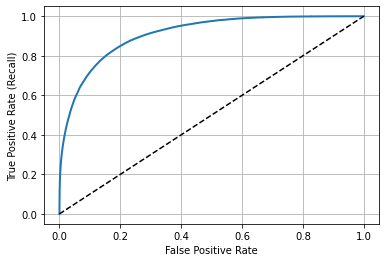

In [19]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid()


plot_roc_curve(fpr, tpr)
plt.show()


In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(real_estate_train_exp, sgd_scores)

0.9093334438983549

### Use Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_probs = cross_val_predict(forest_clf, real_estate_prep, real_estate_train_exp, cv=3, method="predict_proba")

forest_scores = forest_probs[:,1]

In [22]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(real_estate_train_exp,forest_scores)

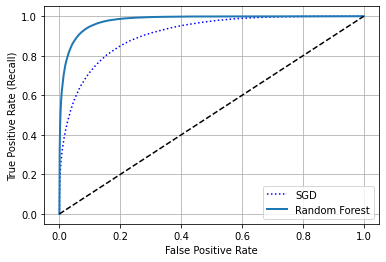

In [23]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [24]:
roc_auc_score(real_estate_train_exp, forest_scores)

0.9788256163228771

### Creating Multiple Class Labels

In [60]:
#creating 4 brackets for the house prices
mult_labels = real_estate_labels.copy()
for idx in real_estate_labels.index.to_list():
    if real_estate_labels[idx] <= 1.500000e+05:
        mult_labels[idx] = "low"
    elif real_estate_labels[idx] <= 2.350000e+05:
        mult_labels[idx] = "mid-low"
    elif real_estate_labels[idx] <= 3.500000e+05:
        mult_labels[idx] = "mid-high"
    elif real_estate_labels[idx] <= 6.100200e+06:
        mult_labels[idx] = "high"

print(real_estate_labels)
print(mult_labels[:10])

6054      1365000
286956    1450000
46456       75000
62726      106000
196513     122500
           ...   
120252     215000
260963     265000
132371     355000
147398     171000
122342     315000
Name: Total_Sale_Price, Length: 244928, dtype: int64
6054         high
286956       high
46456         low
62726         low
196513        low
105195    mid-low
169307        low
17934     mid-low
196249    mid-low
32206        high
Name: Total_Sale_Price, dtype: object


### Use OvR Classifier

In [28]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SGDClassifier())
ovr_clf.fit(real_estate_prep, mult_labels)

OneVsRestClassifier(estimator=SGDClassifier())

In [40]:
print(len(ovr_clf.estimators_))

print(ovr_clf.predict([real_estate_prep[1]]))
ovr_clf.decision_function([real_estate_prep[1]])


4
['high']


array([[ 144.26630938, -375.51115345,   -1.4997718 ,   -7.28540261]])

### Use KNeighbors Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

real_estate_train_cheap = (real_estate_labels <= 1.500000e+05)
exp_or_cheap = np.c_[real_estate_train_exp,real_estate_train_cheap]

knn_clf = KNeighborsClassifier()
knn_clf.fit(real_estate_prep, exp_or_cheap)
knn_clf.predict([real_estate_prep[5]])

array([[False, False]])